# Response characterization
**9th april 2024 (edited the 6th May 2024)**

*Célien Vandromme*

---

In [1]:
import numpy as np
import pandas as pd
import percephone.core.recording as pc
import os
import matplotlib
import percephone.plts.stats as ppt
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count, pool
import warnings

plt.switch_backend("Qt5Agg")
matplotlib.use("Qt5Agg")
%matplotlib inline
warnings.filterwarnings('ignore')

save_figure = True

In [2]:
user = "Célien"

if user == "Célien":
    directory = "C:/Users/cvandromme/Desktop/Data/"
    roi_path = "C:/Users/cvandromme/Desktop/FmKO_ROIs&inhibitory.xlsx"
    server_address = "Z:/Current_members/Ourania_Semelidou/2p/Figures_paper/"
elif user == "Théo":
    directory = "/datas/Théo/Projects/Percephone/data/Amplitude_Detection/loop_format_tau_02/"
    roi_path = directory + "/FmKO_ROIs&inhibitory.xlsx"
    server_address = "/run/user/1004/gvfs/smb-share:server=engram.local,share=data/Current_members/Ourania_Semelidou/2p/Figures_paper/"
    
roi_info = pd.read_excel(roi_path)
files = os.listdir(directory)
files_ = [file for file in files if file.endswith("synchro")]

def opening_rec(fil, i):
    rec = pc.RecordingAmplDet(directory + fil + "/", 0, roi_path)
    return rec

workers = cpu_count()
if user == "Célien":
    pool = pool.ThreadPool(processes=workers)
elif user == "Théo":
    pool = Pool(processes=workers)
async_results = [pool.apply_async(opening_rec, args=(file, i)) for i, file in enumerate(files_)]
recs = {ar.get().filename: ar.get() for ar in async_results}

Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorpor

In [3]:
for rec in recs.values():
    rec.peak_delay_amp()
    rec.auc()

# Comparison of a parameter between groups according to stimulation detection

---

In [4]:
def group_comp_param(recs, parameter, ko_hypo_only=False, stim_ampl="all", ylim=[]):
    fig, axs = plt.subplots(2, 4, figsize=(24, 16))
    for i, neuron_type in enumerate(["EXC", "INH"]):
        for j, response_type in enumerate([-1, 1]):
            auto_ylim = ylim
            if ylim != [] and response_type == -1 and parameter != "Peak_delay":
                auto_ylim = [-i for i in ylim][::-1]
            wt_det, wt_undet, ko_det, ko_undet = [], [], [], []
            if ko_hypo_only:
                ko_type = "KO-Hypo"
                color_ko = ppt.hypo_color
                light_color_ko = ppt.hypo_light_color
            else:
                ko_type = "(KO + KO-Hypo)"
                color_ko = ppt.all_ko_color
                light_color_ko = ppt.all_ko_light_color

            for rec in recs.values():
                if ko_hypo_only and rec.genotype == "KO":
                    continue
                else:
                    # Filtering stimulation amplitudes
                    stim_filter = rec.stim_ampl_filter(stim_ampl)

                    # Responsivity and parameter matrices building or retrieving according to neuron type
                    resp_mat = rec.matrices[neuron_type]["Responsivity"]
                    para_mat = rec.matrices[neuron_type][parameter]


                    # For detected stimuli
                    stim_thre_det = np.logical_and(stim_filter, rec.detected_stim)
                    resp_detected = resp_mat[:,stim_thre_det]
                    detected = para_mat[:,stim_thre_det]
                    det = np.where(resp_detected == response_type, detected, np.nan)

                    # For undetected stimuli
                    stim_thre_undet = np.logical_and(stim_filter, np.invert(rec.detected_stim))
                    resp_undetected = resp_mat[:,stim_thre_undet]
                    undetected = para_mat[:,stim_thre_undet]
                    undet = np.where(resp_undetected == response_type, undetected, np.nan)

                    if rec.genotype == "WT":
                        wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                        wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
                    else:
                        ko_det.append(np.nanmean(np.nanmean(det, axis=1)))
                        ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))

            ppt.boxplot(axs[i, 2*j], wt_det, ko_det, paired=False, ylabel=f"{parameter}", ylim=auto_ylim, colors=[ppt.wt_color, color_ko], det_marker=True)
            ppt.boxplot(axs[i, 2*j+1], wt_undet, ko_undet, paired=False, ylabel=f"{parameter}", ylim=auto_ylim, colors=[ppt.wt_light_color, light_color_ko], det_marker=False)
            axs[i, 2*j].set_title(f"Det {neuron_type}({response_type})")
            axs[i, 2*j+1].set_title(f"Undet {neuron_type}({response_type})")
    plt.tight_layout()
    fig.suptitle(f"Mean {parameter} between WT and {ko_type}. Amplitude(s): {stim_ampl}", fontsize=10)
    if save_figure:
        title = f"Figure2/response_characterization/gp_{parameter}_{stim_ampl}.pdf"
        fig.savefig(server_address + title)

## AUC

### All amplitudes

Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.8600367778061571, pvalue=0.09597252771769174)
ShapiroResult(statistic=0.911936037472683, pvalue=0.40944228030680085)
LeveneResult(statistic=0.22153516939751472, pvalue=0.6451218728219443)
Equal variances :TtestResult(statistic=-0.0583798403797812, pvalue=0.9542711763637799, df=14.0)
Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.8566535856381552, pvalue=0.08815866190404369)
ShapiroResult(statistic=0.9372630287403971, pvalue=0.6142050272283368)
LeveneResult(statistic=0.2296758910877736, pvalue=0.6391638823104915)
Equal variances :TtestResult(statistic=-1.1996173436273616, pvalue=0.2501967078622998, df=14.0)
Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.9752075351364956, pvalue=0.9352329577795098)
ShapiroResult(statistic=0.8700512361487508, pvalue=0.18581951221852688)
LeveneResult(statistic=0.45218426591122224, pvalue=0.5122458885733769)
Equal variances :TtestResult(statistic=0.17887752544403684, pvalue=0.86

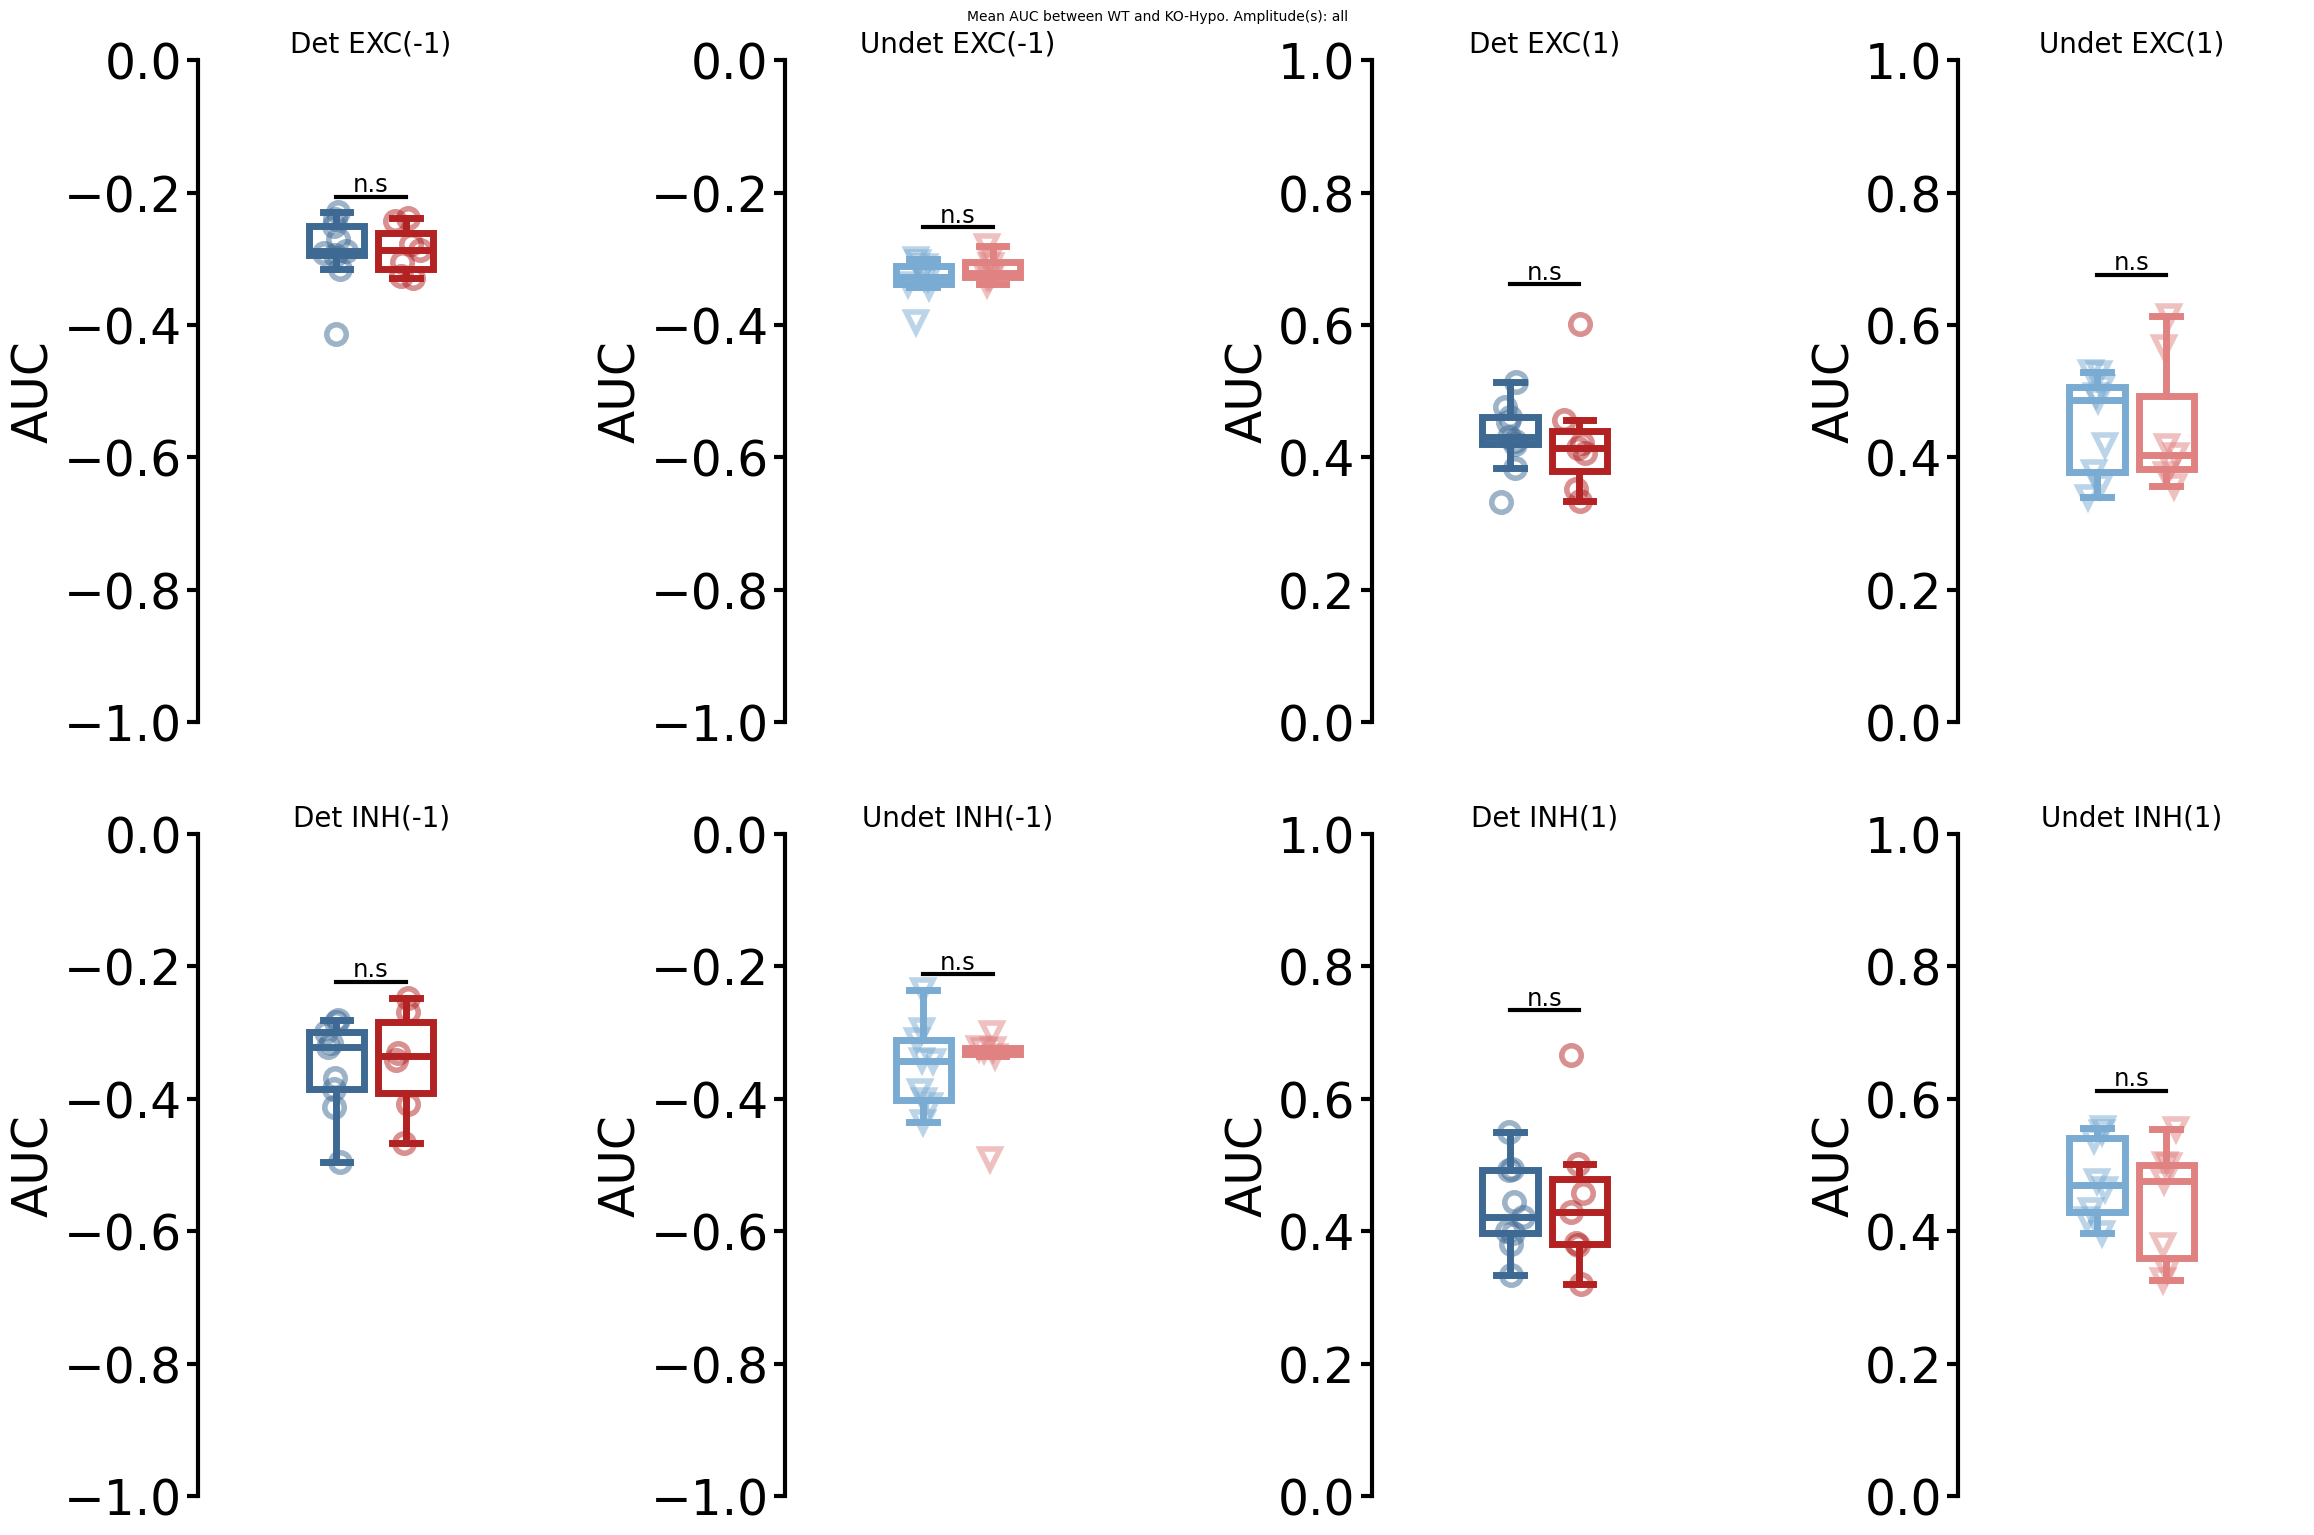

In [5]:
group_comp_param(recs, parameter="AUC", ko_hypo_only=True, stim_ampl="all", ylim=[0, 1])

### Threshold amplitude

Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.7739882415687834, pvalue=0.01498331559850142)
ShapiroResult(statistic=0.8424041175056619, pvalue=0.10460740479960745)
MannwhitneyuResult(statistic=26.0, pvalue=0.8665112665112666)
Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.8539474329089349, pvalue=0.08234734561819498)
ShapiroResult(statistic=0.963281402956873, pvalue=0.8463442103339969)
LeveneResult(statistic=0.1347997213603222, pvalue=0.7189968270668625)
Equal variances :TtestResult(statistic=-0.8015392805838553, pvalue=0.4362133481231516, df=14.0)
Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.9071237653181498, pvalue=0.29625955369678925)
ShapiroResult(statistic=0.8663714338041655, pvalue=0.1724875326262279)
LeveneResult(statistic=0.03776572653125921, pvalue=0.8487060054750747)
Equal variances :TtestResult(statistic=0.8900215325436406, pvalue=0.3884929076090229, df=14.0)
Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.8611126797669892, pvalu

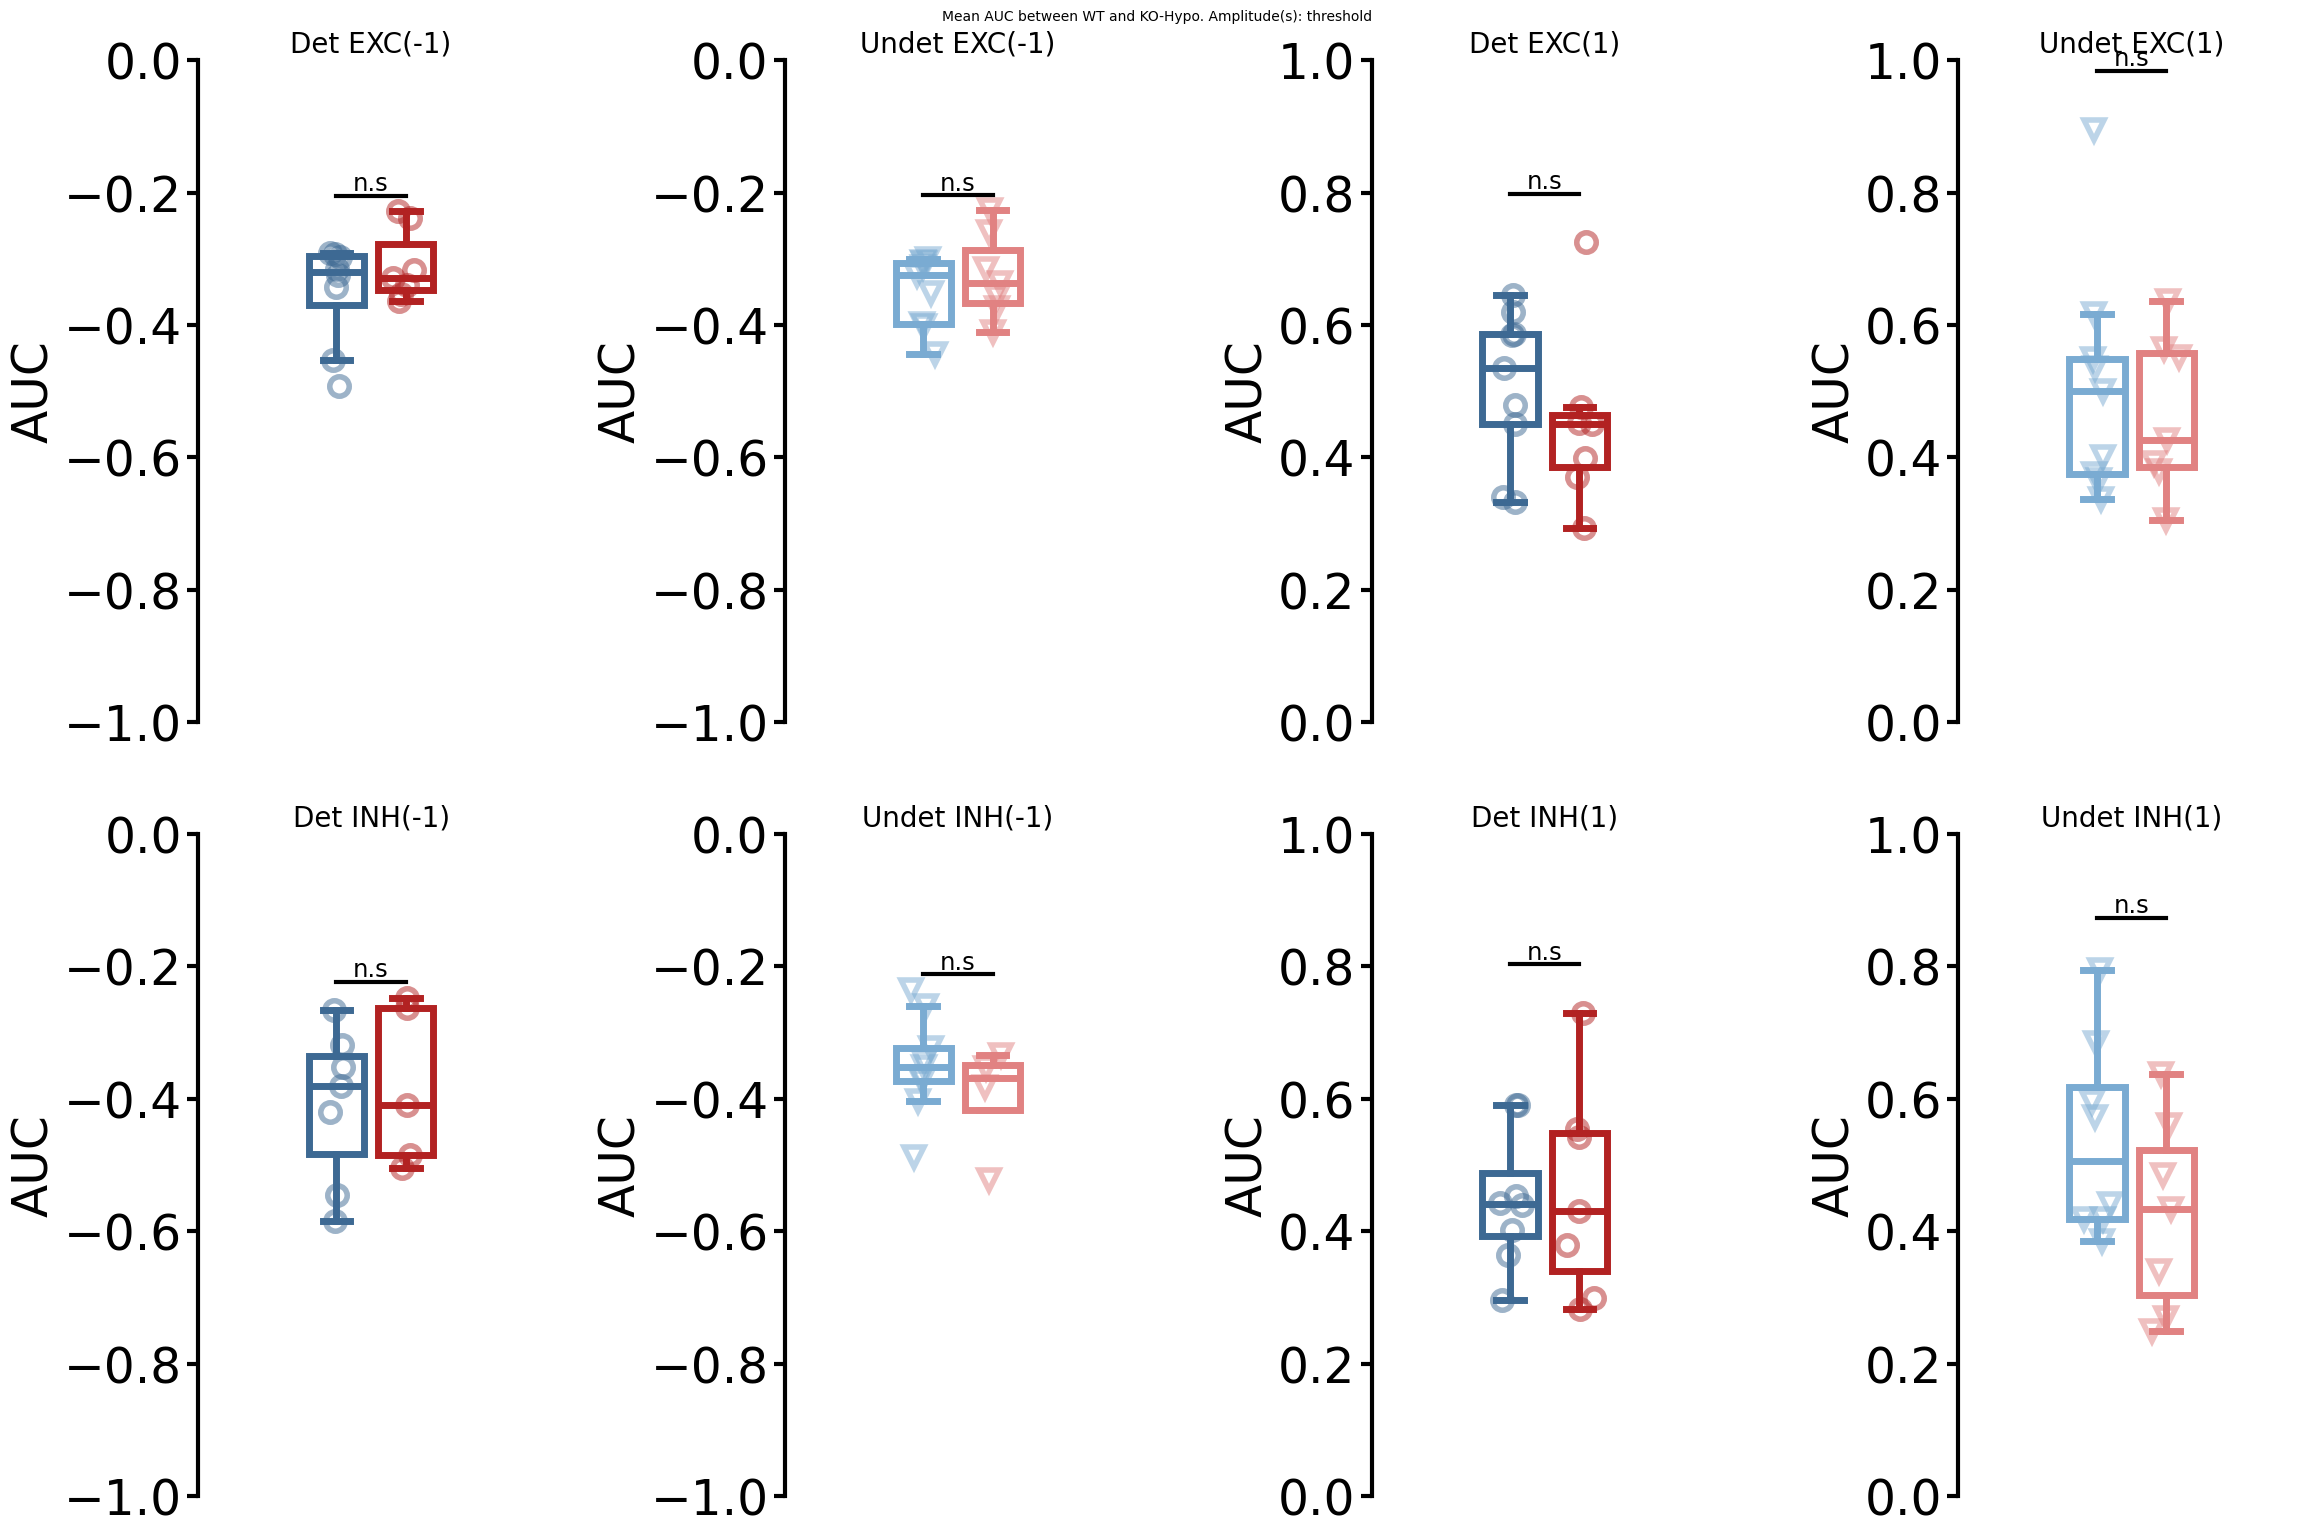

In [6]:
group_comp_param(recs, parameter="AUC", ko_hypo_only=True, stim_ampl="threshold", ylim=[0, 1])

### Amplitude 12

Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.8135759546054406, pvalue=0.029146181074953672)
ShapiroResult(statistic=0.9351709021469758, pvalue=0.595681353672094)
MannwhitneyuResult(statistic=37.0, pvalue=0.6064685314685315)
Boxplot plotting.
Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.9493282779590226, pvalue=0.682687525634802)
ShapiroResult(statistic=0.8472104527985141, pvalue=0.11586937608202924)
LeveneResult(statistic=0.05127480723323611, pvalue=0.8241324406874417)
Equal variances :TtestResult(statistic=0.2586325818053854, pvalue=0.7996824108669918, df=14.0)
Boxplot plotting.
Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.8796699879127112, pvalue=0.18696548318750145)
ShapiroResult(statistic=0.935235769847155, pvalue=0.6324817465147072)
LeveneResult(statistic=0.043947923363053774, pvalue=0.837782643366499)
Equal variances :TtestResult(statistic=0.36593387987558085, pvalue=0.721354552291116, df=11.0)
Boxplot plotting.
Boxplot plotting.
--- AUC:  -

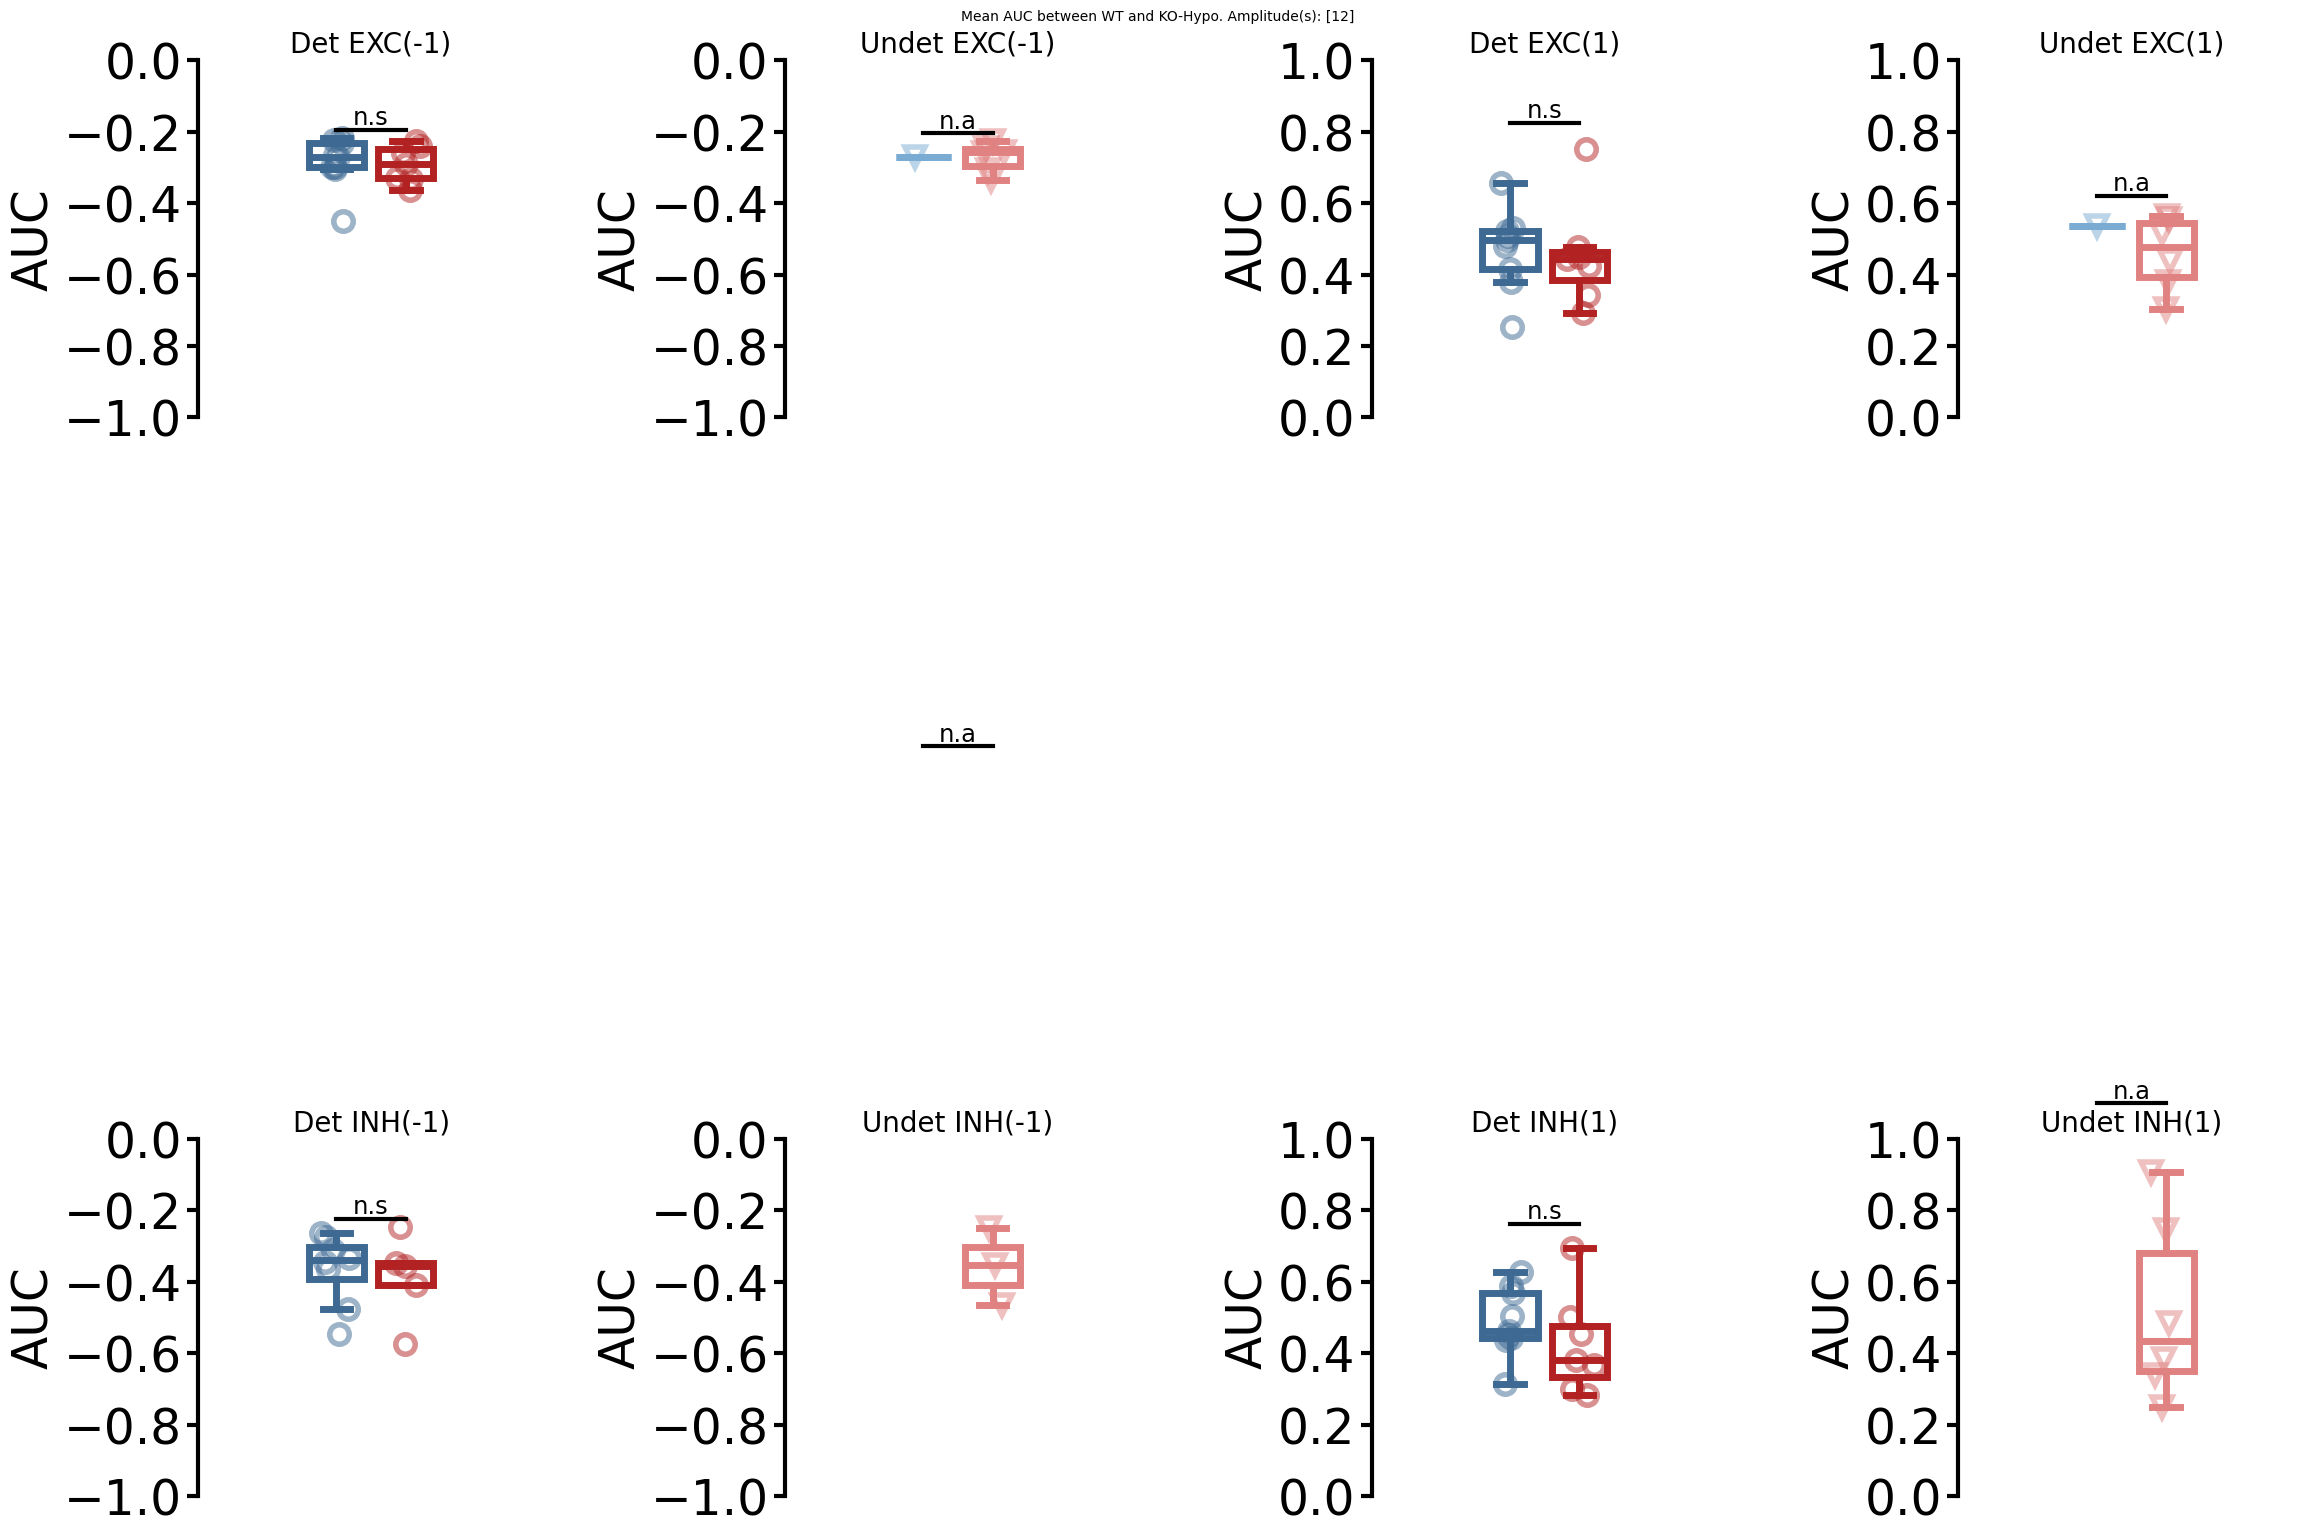

In [7]:
group_comp_param(recs, parameter="AUC", ko_hypo_only=True, stim_ampl=[12], ylim=[0, 1])

### Subthreshold amplitudes

Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.8781062223708321, pvalue=0.3008172445792437)
ShapiroResult(statistic=0.6172166111400705, pvalue=0.00043263015040386095)
MannwhitneyuResult(statistic=11.0, pvalue=0.3434343434343435)
Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.9687791895460288, pvalue=0.8841355875843133)
ShapiroResult(statistic=0.9392213715251768, pvalue=0.631717033493258)
LeveneResult(statistic=1.6305127955234762, pvalue=0.22792842704865374)
Equal variances :TtestResult(statistic=-1.7368808825561826, pvalue=0.11028973468571583, df=11.0)
Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.9524765333728946, pvalue=0.7548642831006365)
ShapiroResult(statistic=0.8642543868256393, pvalue=0.1652054013633774)
LeveneResult(statistic=0.3032758103830978, pvalue=0.5939243441478539)
Equal variances :TtestResult(statistic=1.1332064312468375, pvalue=0.28356517575017115, df=10.0)
Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.8299162382679729, pva

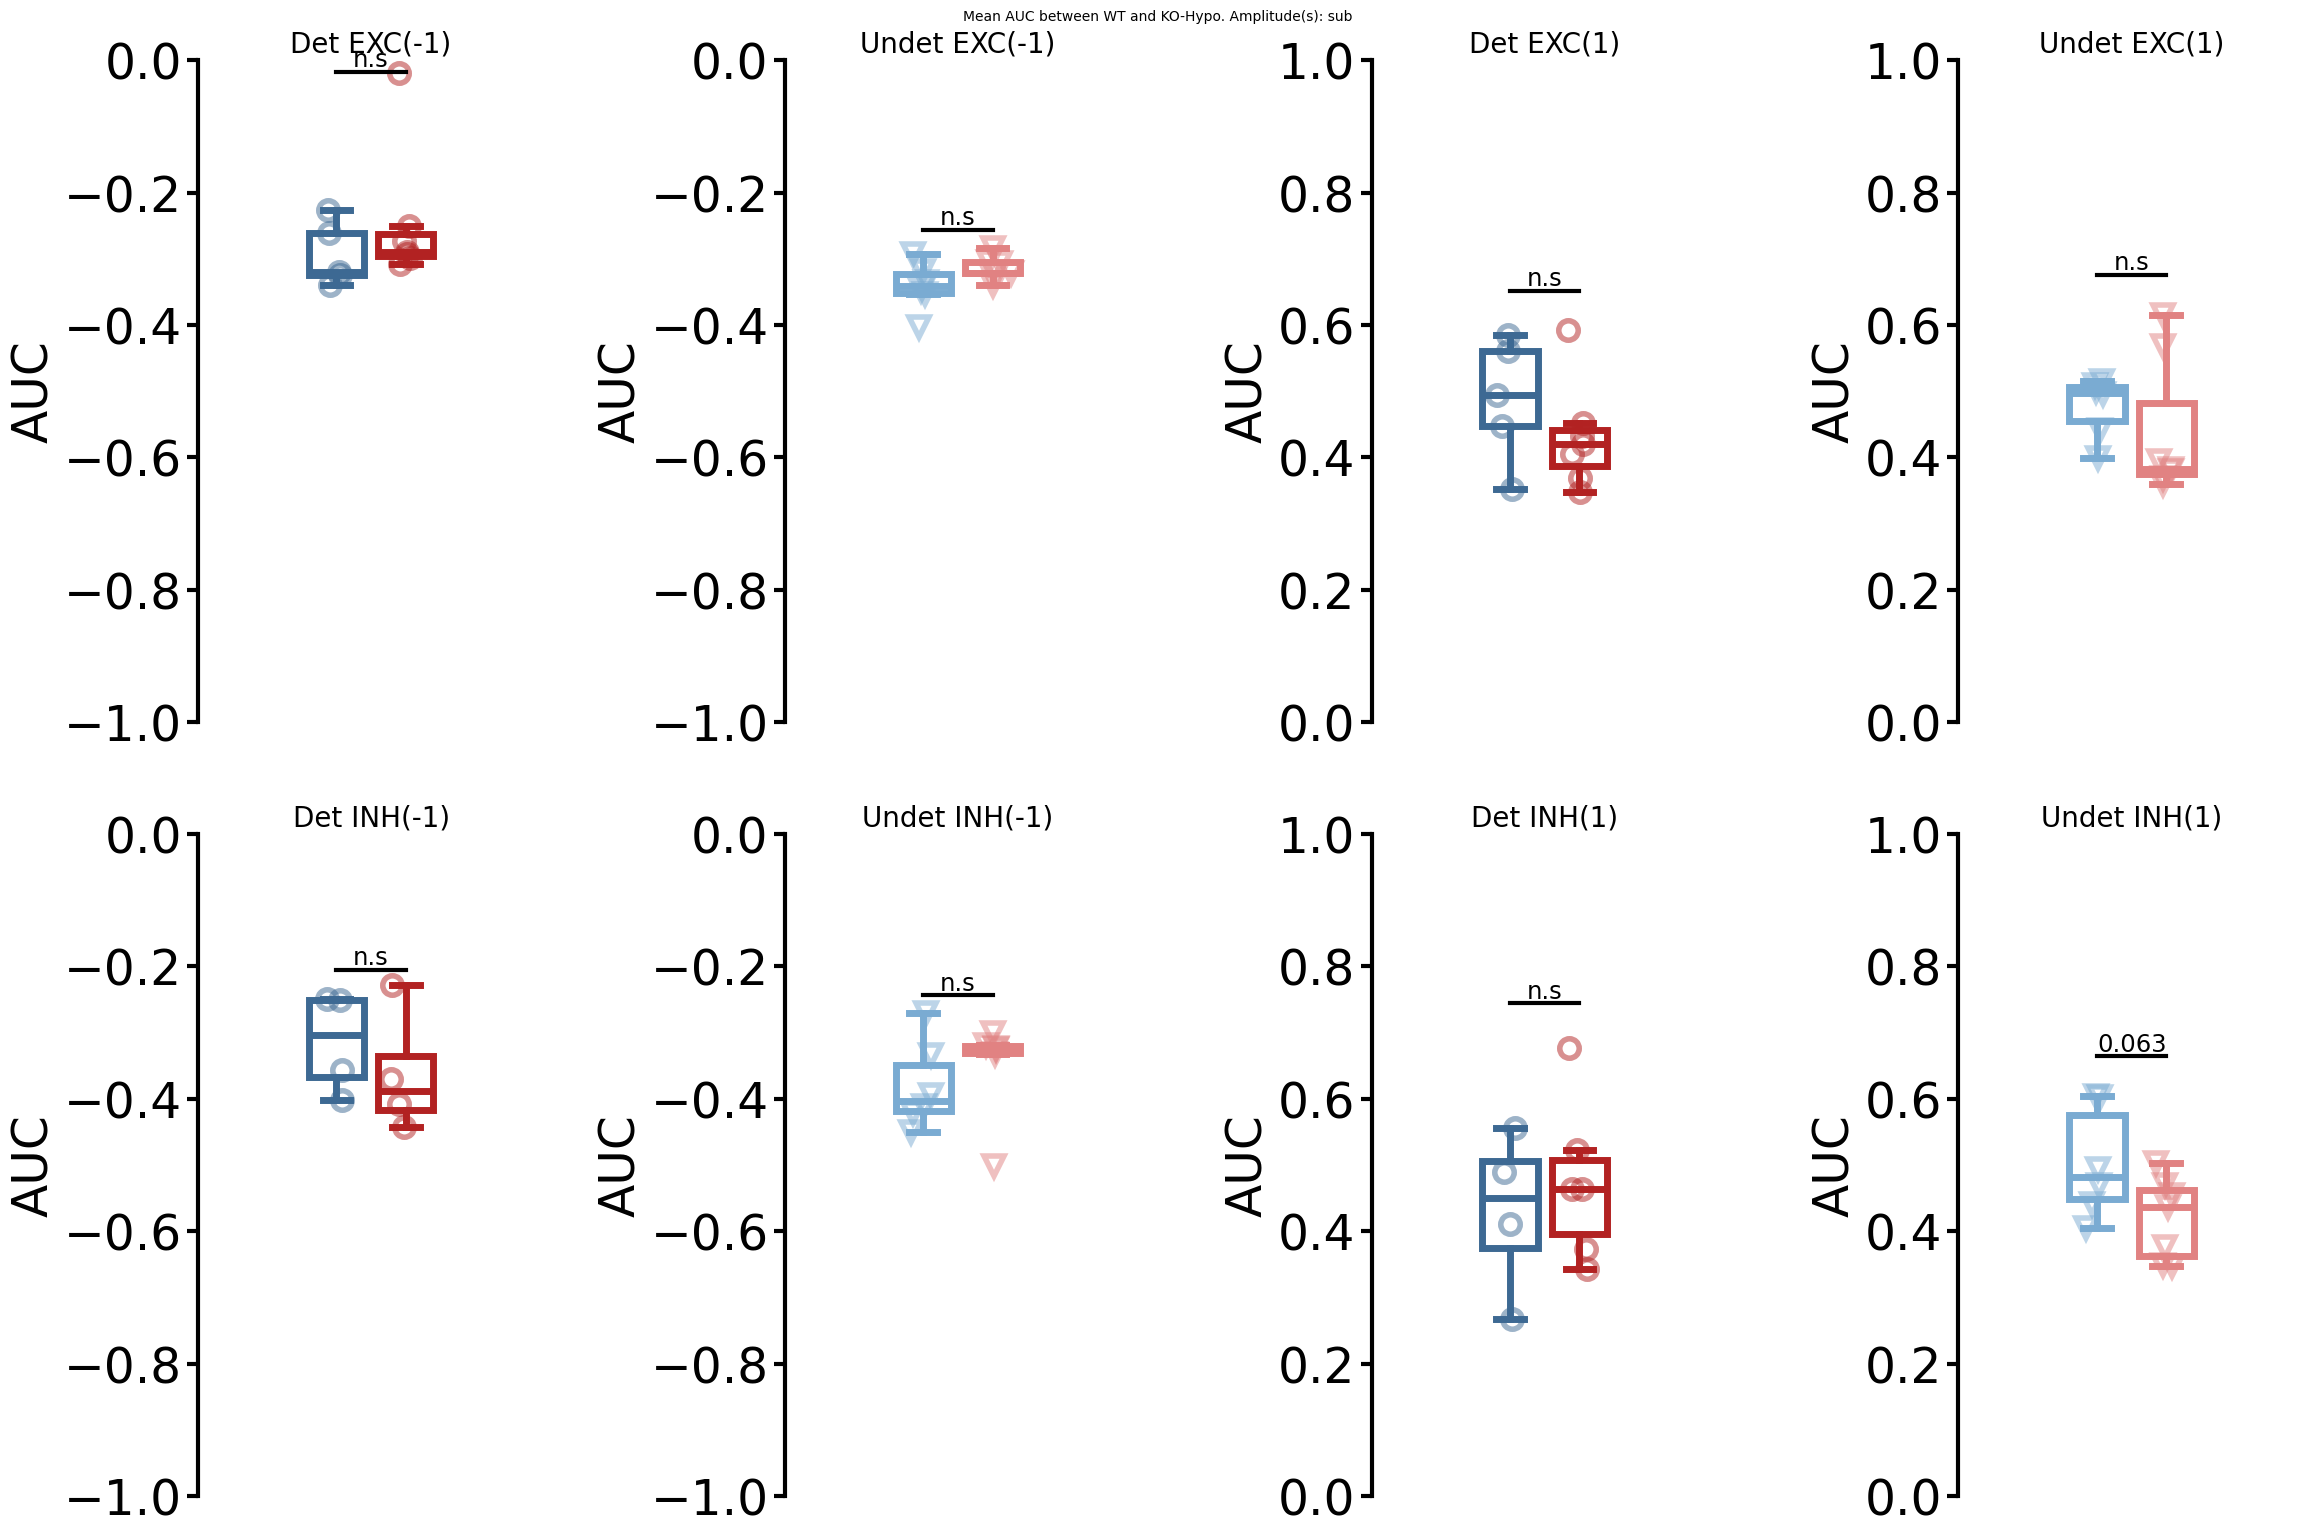

In [8]:
group_comp_param(recs, parameter="AUC", ko_hypo_only=True, stim_ampl="sub", ylim=[0, 1])

### Suprathreshold amplitudes

Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.8691059250150581, pvalue=0.12026896822032174)
ShapiroResult(statistic=0.92402919772535, pvalue=0.5013386962996291)
LeveneResult(statistic=0.009365437364164274, pvalue=0.9242766695422933)
Equal variances :TtestResult(statistic=0.10714815664181009, pvalue=0.916191773623346, df=14.0)
Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.8107548938677597, pvalue=0.02707483443226528)
ShapiroResult(statistic=0.9369180436837405, pvalue=0.6111365940643241)
MannwhitneyuResult(statistic=27.0, pvalue=0.6805944055944056)
Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.9766728402990162, pvalue=0.945017269935447)
ShapiroResult(statistic=0.9033863190169309, pvalue=0.35198223724848027)
LeveneResult(statistic=1.6674443242080041, pvalue=0.21751545988850304)
Equal variances :TtestResult(statistic=-0.24291868072445771, pvalue=0.8115913275050972, df=14.0)
Boxplot plotting.
--- AUC:  ---
ShapiroResult(statistic=0.8350147034435664, pvalu

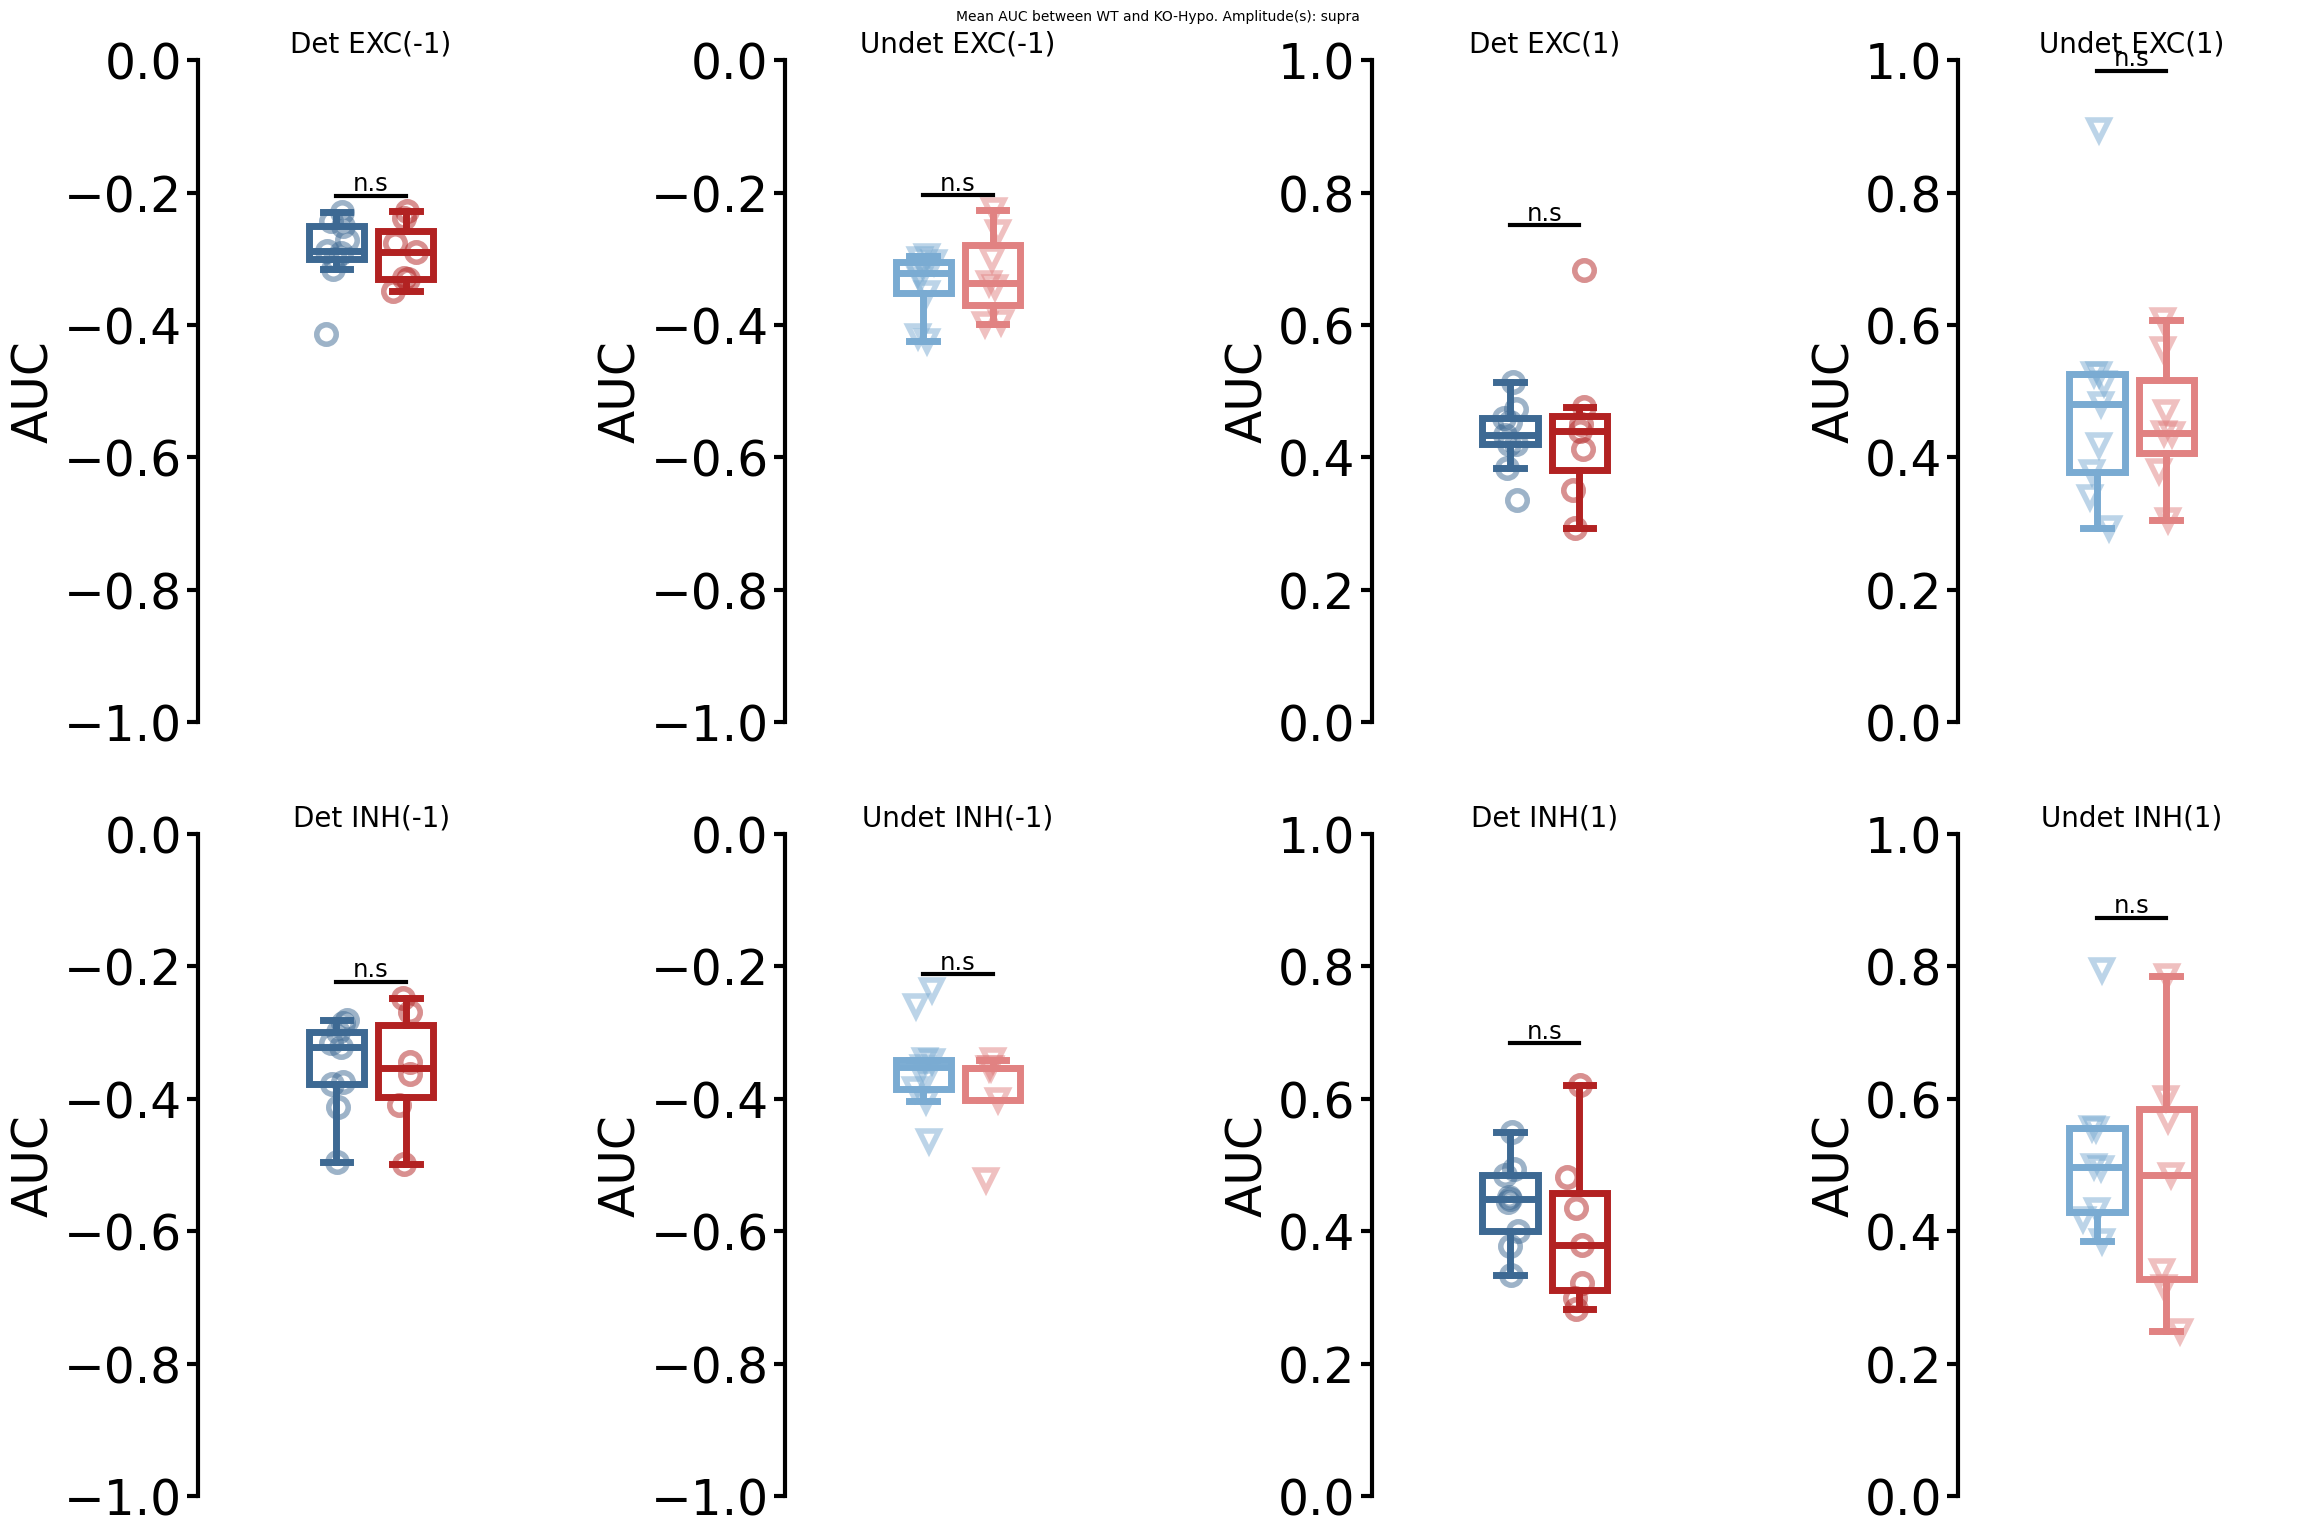

In [9]:
group_comp_param(recs, parameter="AUC", ko_hypo_only=True, stim_ampl="supra", ylim=[0, 1])

## Peak delay

### All amplitudes

Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.960771189682959, pvalue=0.8063577719077049)
ShapiroResult(statistic=0.9238262675360254, pvalue=0.4996995987127862)
LeveneResult(statistic=0.46862725304970076, pvalue=0.504795092220128)
Equal variances :TtestResult(statistic=-1.3044088702780965, pvalue=0.21313165151216734, df=14.0)
Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.9409340889686972, pvalue=0.5917652047045923)
ShapiroResult(statistic=0.939011232918269, pvalue=0.6298307537052139)
LeveneResult(statistic=1.336428226168585, pvalue=0.2670125004420016)
Equal variances :TtestResult(statistic=-0.7049493946793942, pvalue=0.49240403138960065, df=14.0)
Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.8339806739668502, pvalue=0.04948236132544298)
ShapiroResult(statistic=0.8550975729586456, pvalue=0.1367562839449431)
MannwhitneyuResult(statistic=18.0, pvalue=0.1737762237762238)
Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=

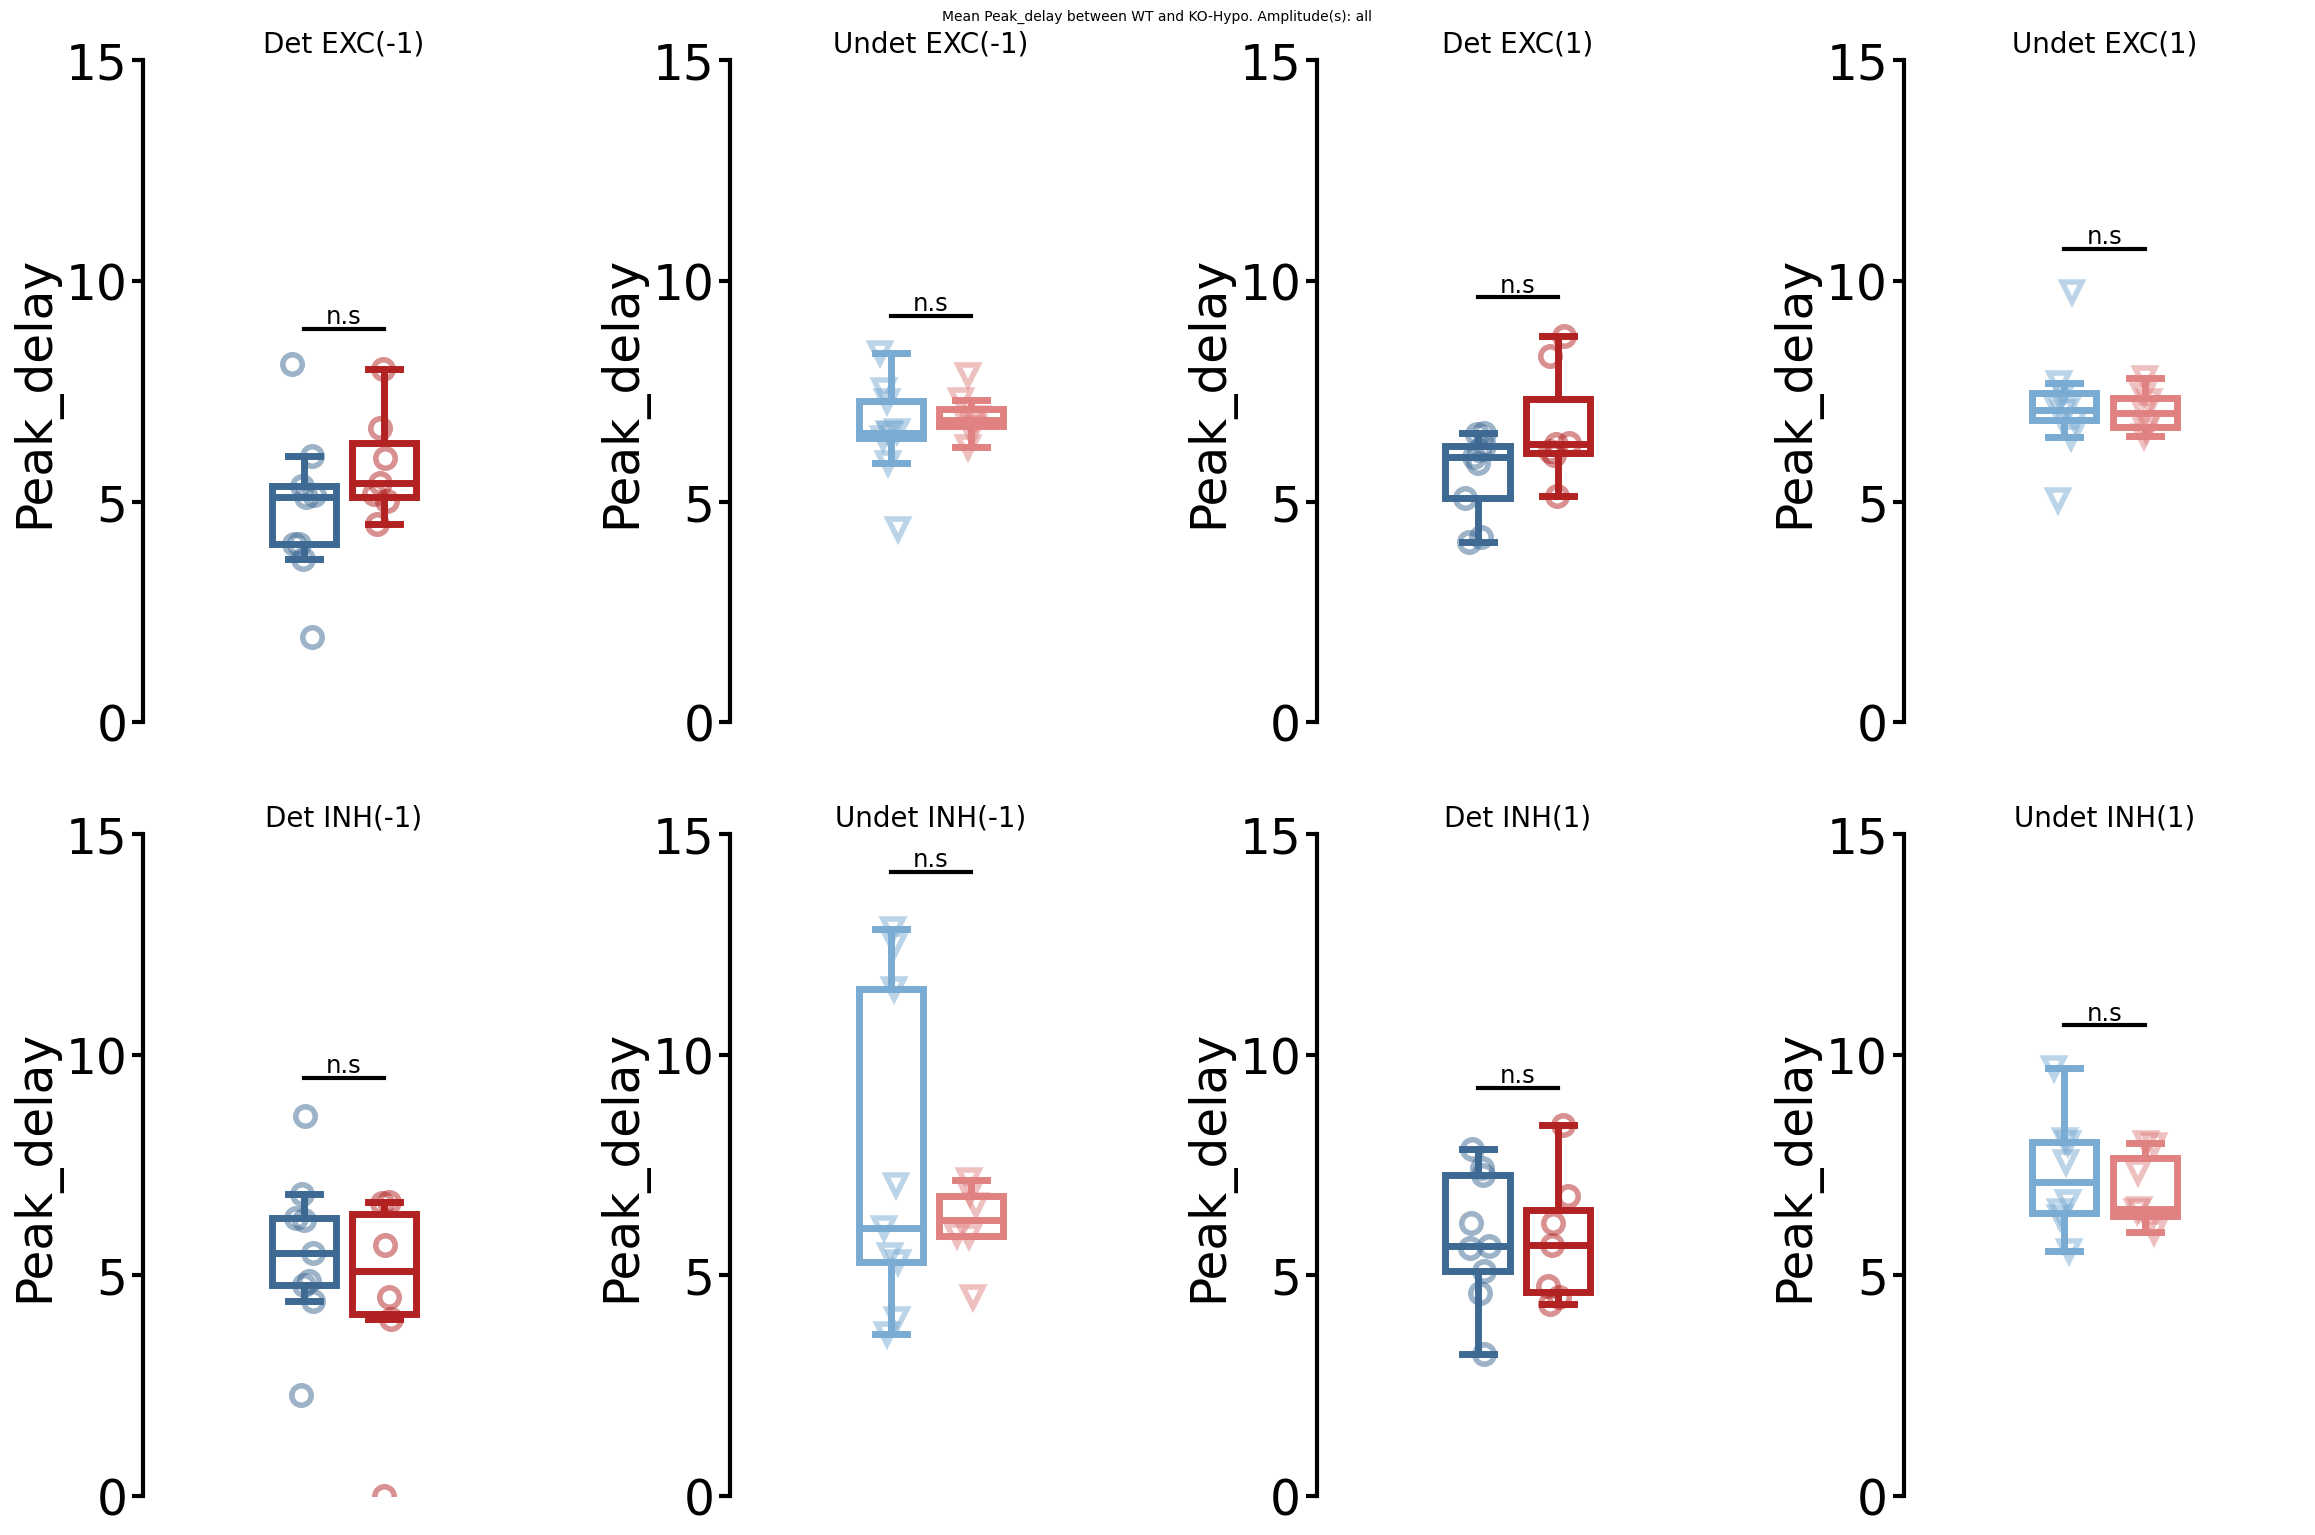

In [10]:
group_comp_param(recs, parameter="Peak_delay", ko_hypo_only=True, stim_ampl="all", ylim=[0, 15])

### Threshold amplitude

Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.9589191616634983, pvalue=0.7997428884603399)
ShapiroResult(statistic=0.939214990770382, pvalue=0.6316597337689394)
LeveneResult(statistic=0.06491139963104697, pvalue=0.8028812042689417)
Equal variances :TtestResult(statistic=-0.06468036337483221, pvalue=0.9494125375343845, df=13.0)
Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.9071174681215803, pvalue=0.2962177328040261)
ShapiroResult(statistic=0.8870316147052415, pvalue=0.25953455396382974)
LeveneResult(statistic=0.37198567979271835, pvalue=0.5516955041075569)
Equal variances :TtestResult(statistic=-0.027207776364389438, pvalue=0.9786780460237687, df=14.0)
Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.9432324711717902, pvalue=0.6163075644455649)
ShapiroResult(statistic=0.9432052614780968, pvalue=0.6677384042950928)
LeveneResult(statistic=1.6899411160117237, pvalue=0.21460514371568717)
Equal variances :TtestResult(statistic=0.15357522

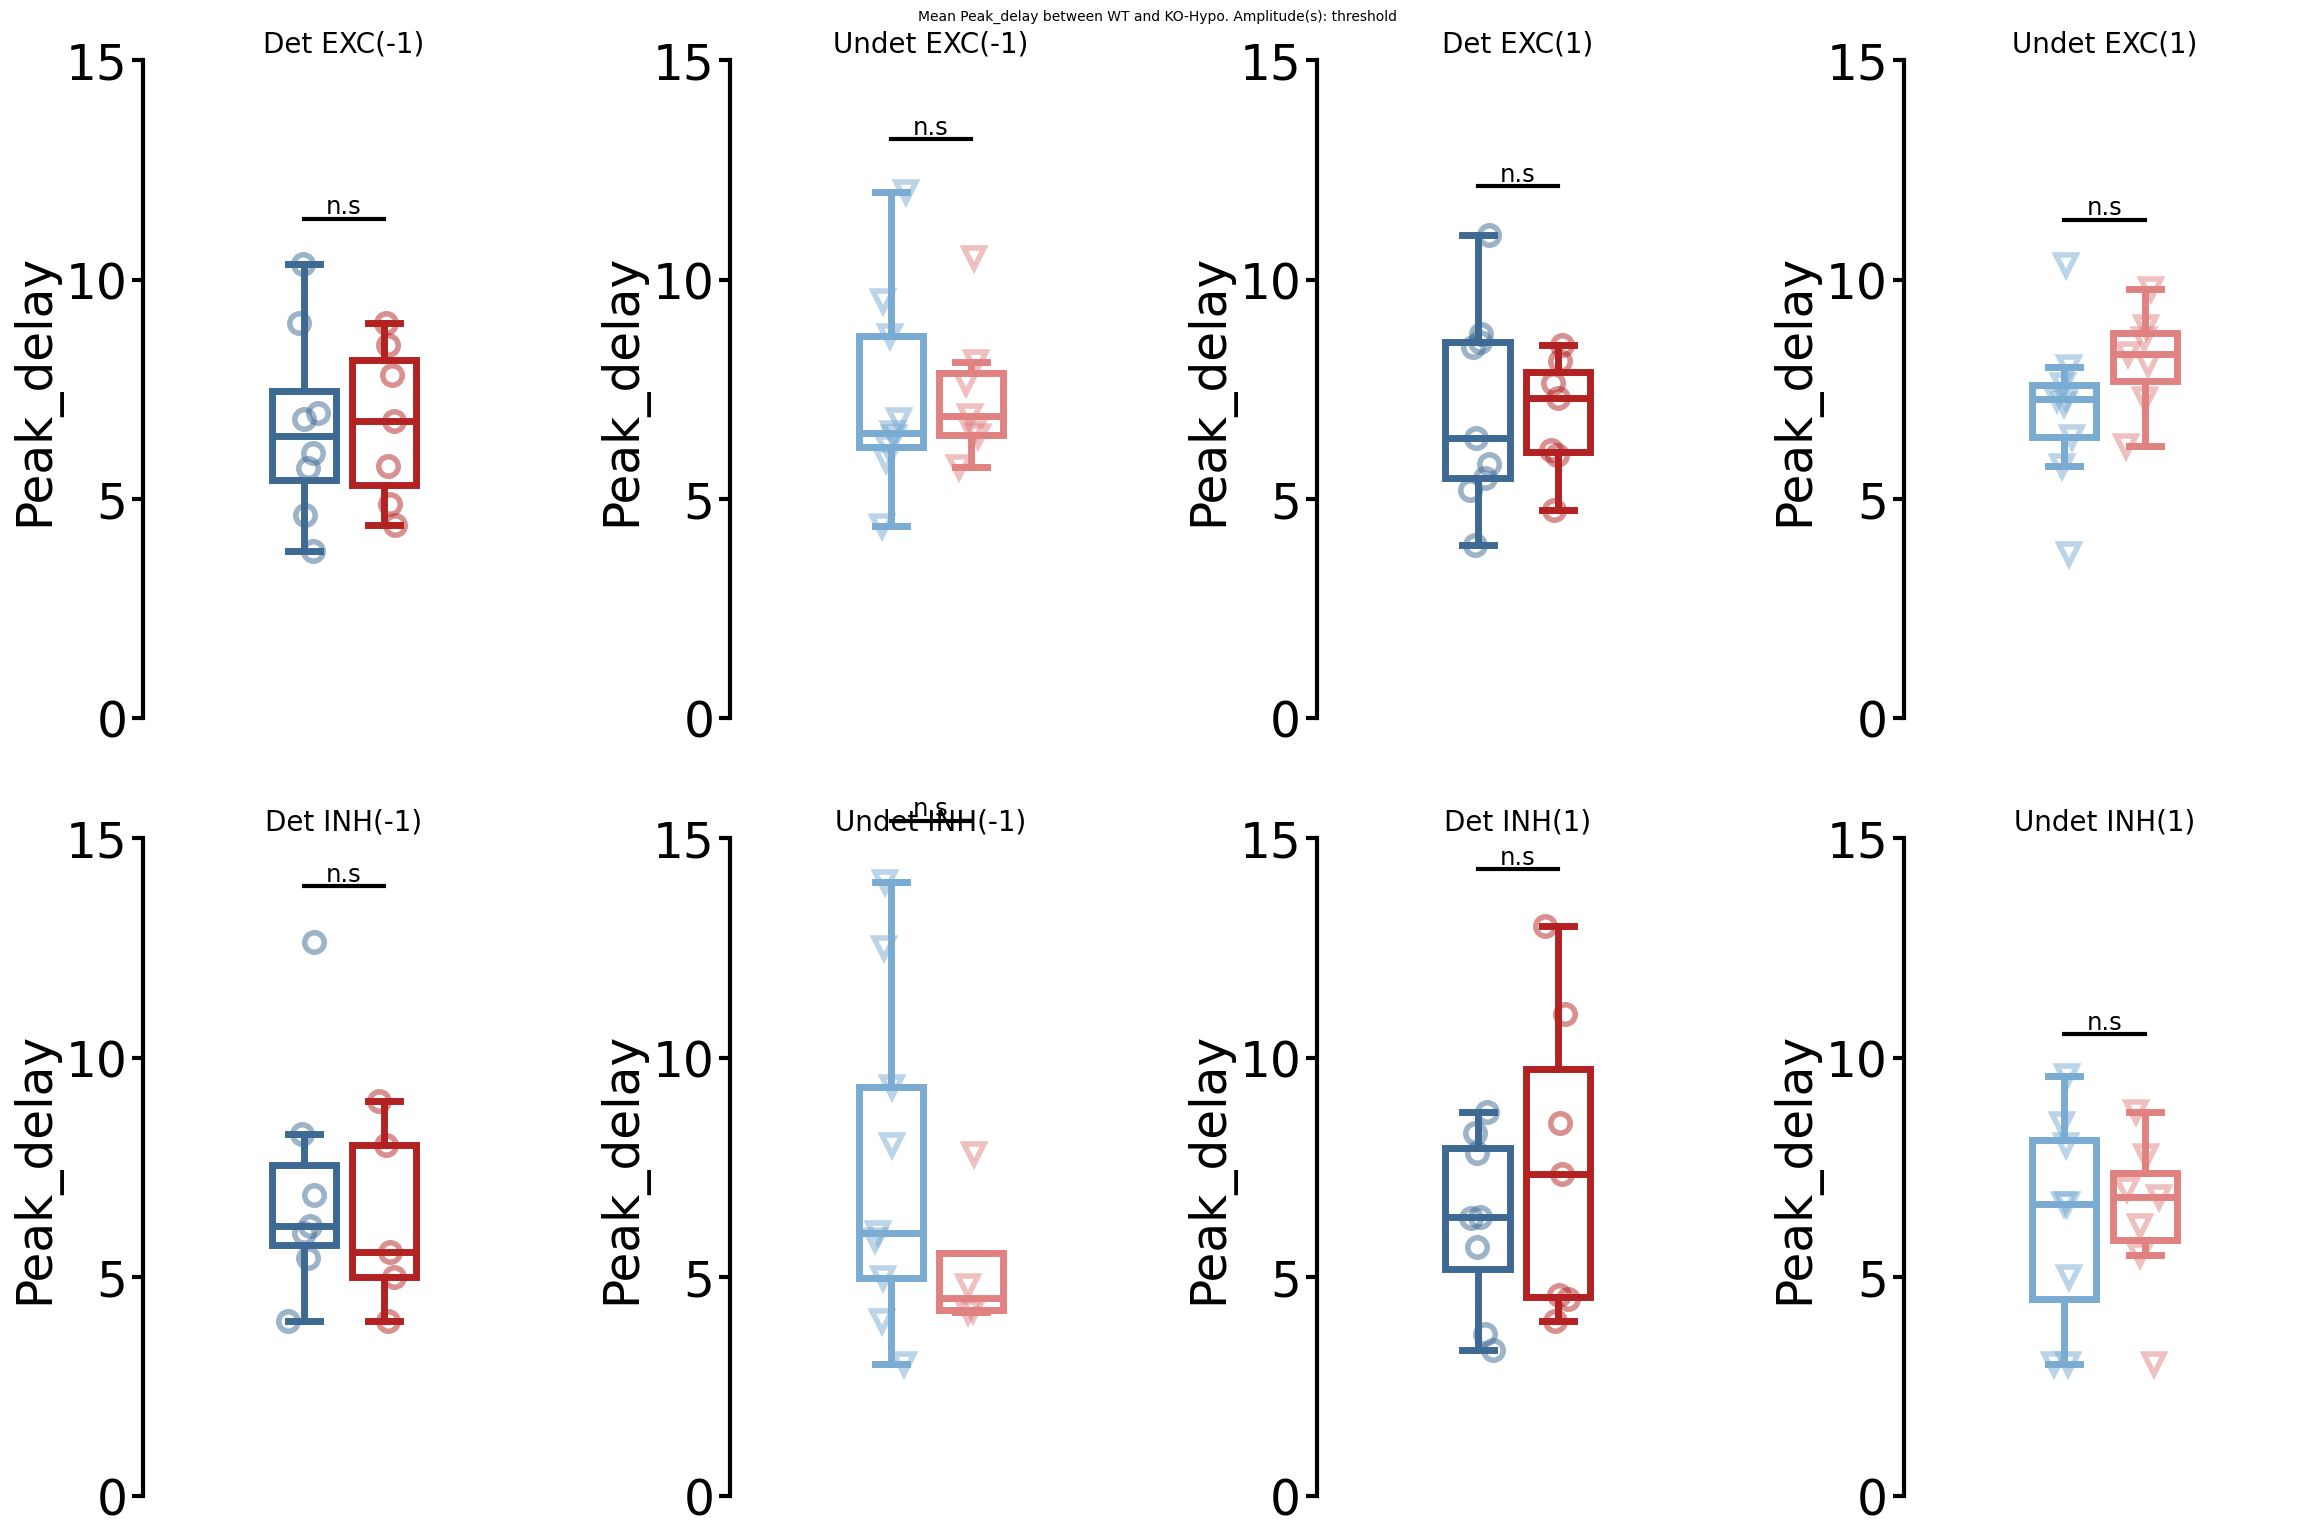

In [11]:
group_comp_param(recs, parameter="Peak_delay", ko_hypo_only=True, stim_ampl="threshold", ylim=[0, 15])

### Amplitude 12

Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.8905129408610055, pvalue=0.20196363456088318)
ShapiroResult(statistic=0.8734779751904072, pvalue=0.1990359554691351)
LeveneResult(statistic=0.1788257527011121, pvalue=0.6788078124967272)
Equal variances :TtestResult(statistic=-1.4603211778370673, pvalue=0.16627774747994756, df=14.0)
Boxplot plotting.
Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.9340063358968355, pvalue=0.5204021432547921)
ShapiroResult(statistic=0.9342473240109535, pvalue=0.5875724353944938)
LeveneResult(statistic=0.026970233375057433, pvalue=0.871900532226614)
Equal variances :TtestResult(statistic=-1.2678214874575757, pvalue=0.22554223739015228, df=14.0)
Boxplot plotting.
Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.9481093623508541, pvalue=0.6921565469083673)
ShapiroResult(statistic=0.8266169669014177, pvalue=0.1311899939781207)
LeveneResult(statistic=1.3847785170312723, pvalue=0.26412563598343197)
Equal variance

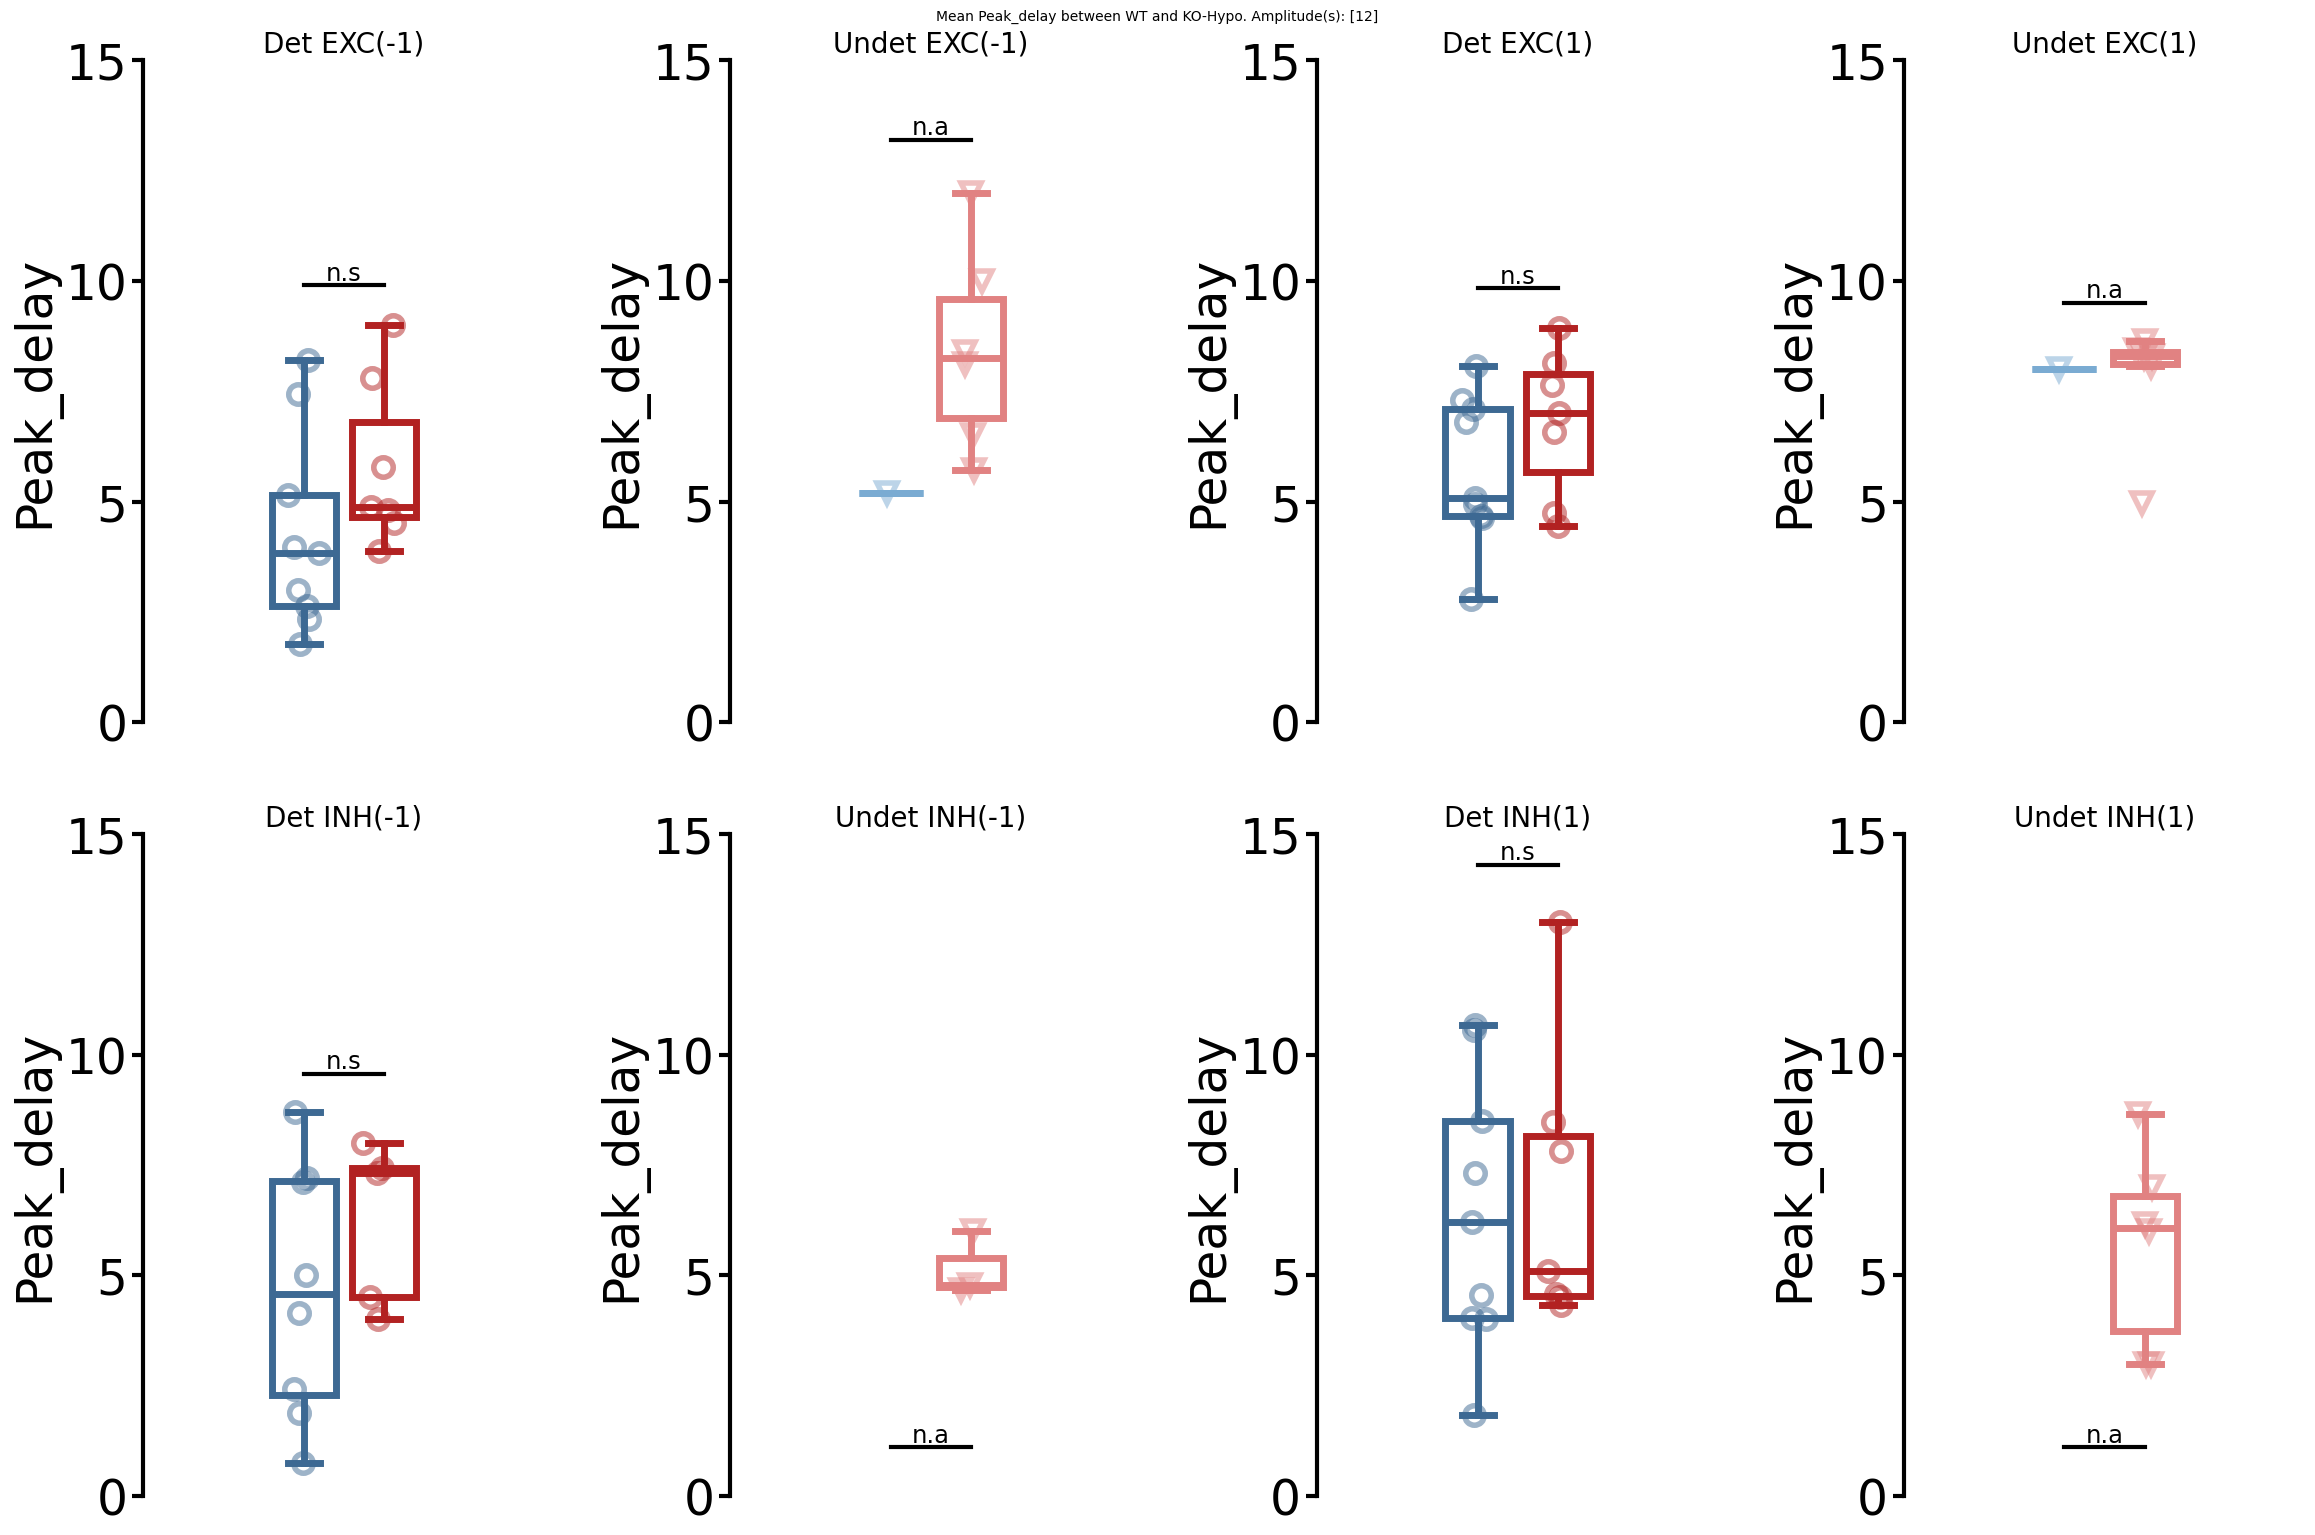

In [12]:
group_comp_param(recs, parameter="Peak_delay", ko_hypo_only=True, stim_ampl=[12], ylim=[0, 15])

### Subthreshold amplitudes

Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.7726887135903785, pvalue=0.047636616552563855)
ShapiroResult(statistic=0.9217844757633102, pvalue=0.4833837073484458)
MannwhitneyuResult(statistic=11.0, pvalue=0.3434343434343435)
Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.9785380492471552, pvalue=0.944064129536422)
ShapiroResult(statistic=0.926790698548392, pvalue=0.5239477153131418)
LeveneResult(statistic=0.2794645906344614, pvalue=0.6075536973906149)
Equal variances :TtestResult(statistic=0.6120442328701713, pvalue=0.5529490351654888, df=11.0)
Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.959809008844577, pvalue=0.8066526292960793)
ShapiroResult(statistic=0.7993563510765077, pvalue=0.04036780139379512)
MannwhitneyuResult(statistic=12.0, pvalue=0.4318181818181819)
Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.9323695757081867, pvalue=0.598521390456013)
ShapiroResult(statistic=0.9064155664062097, pvalue=0.371612

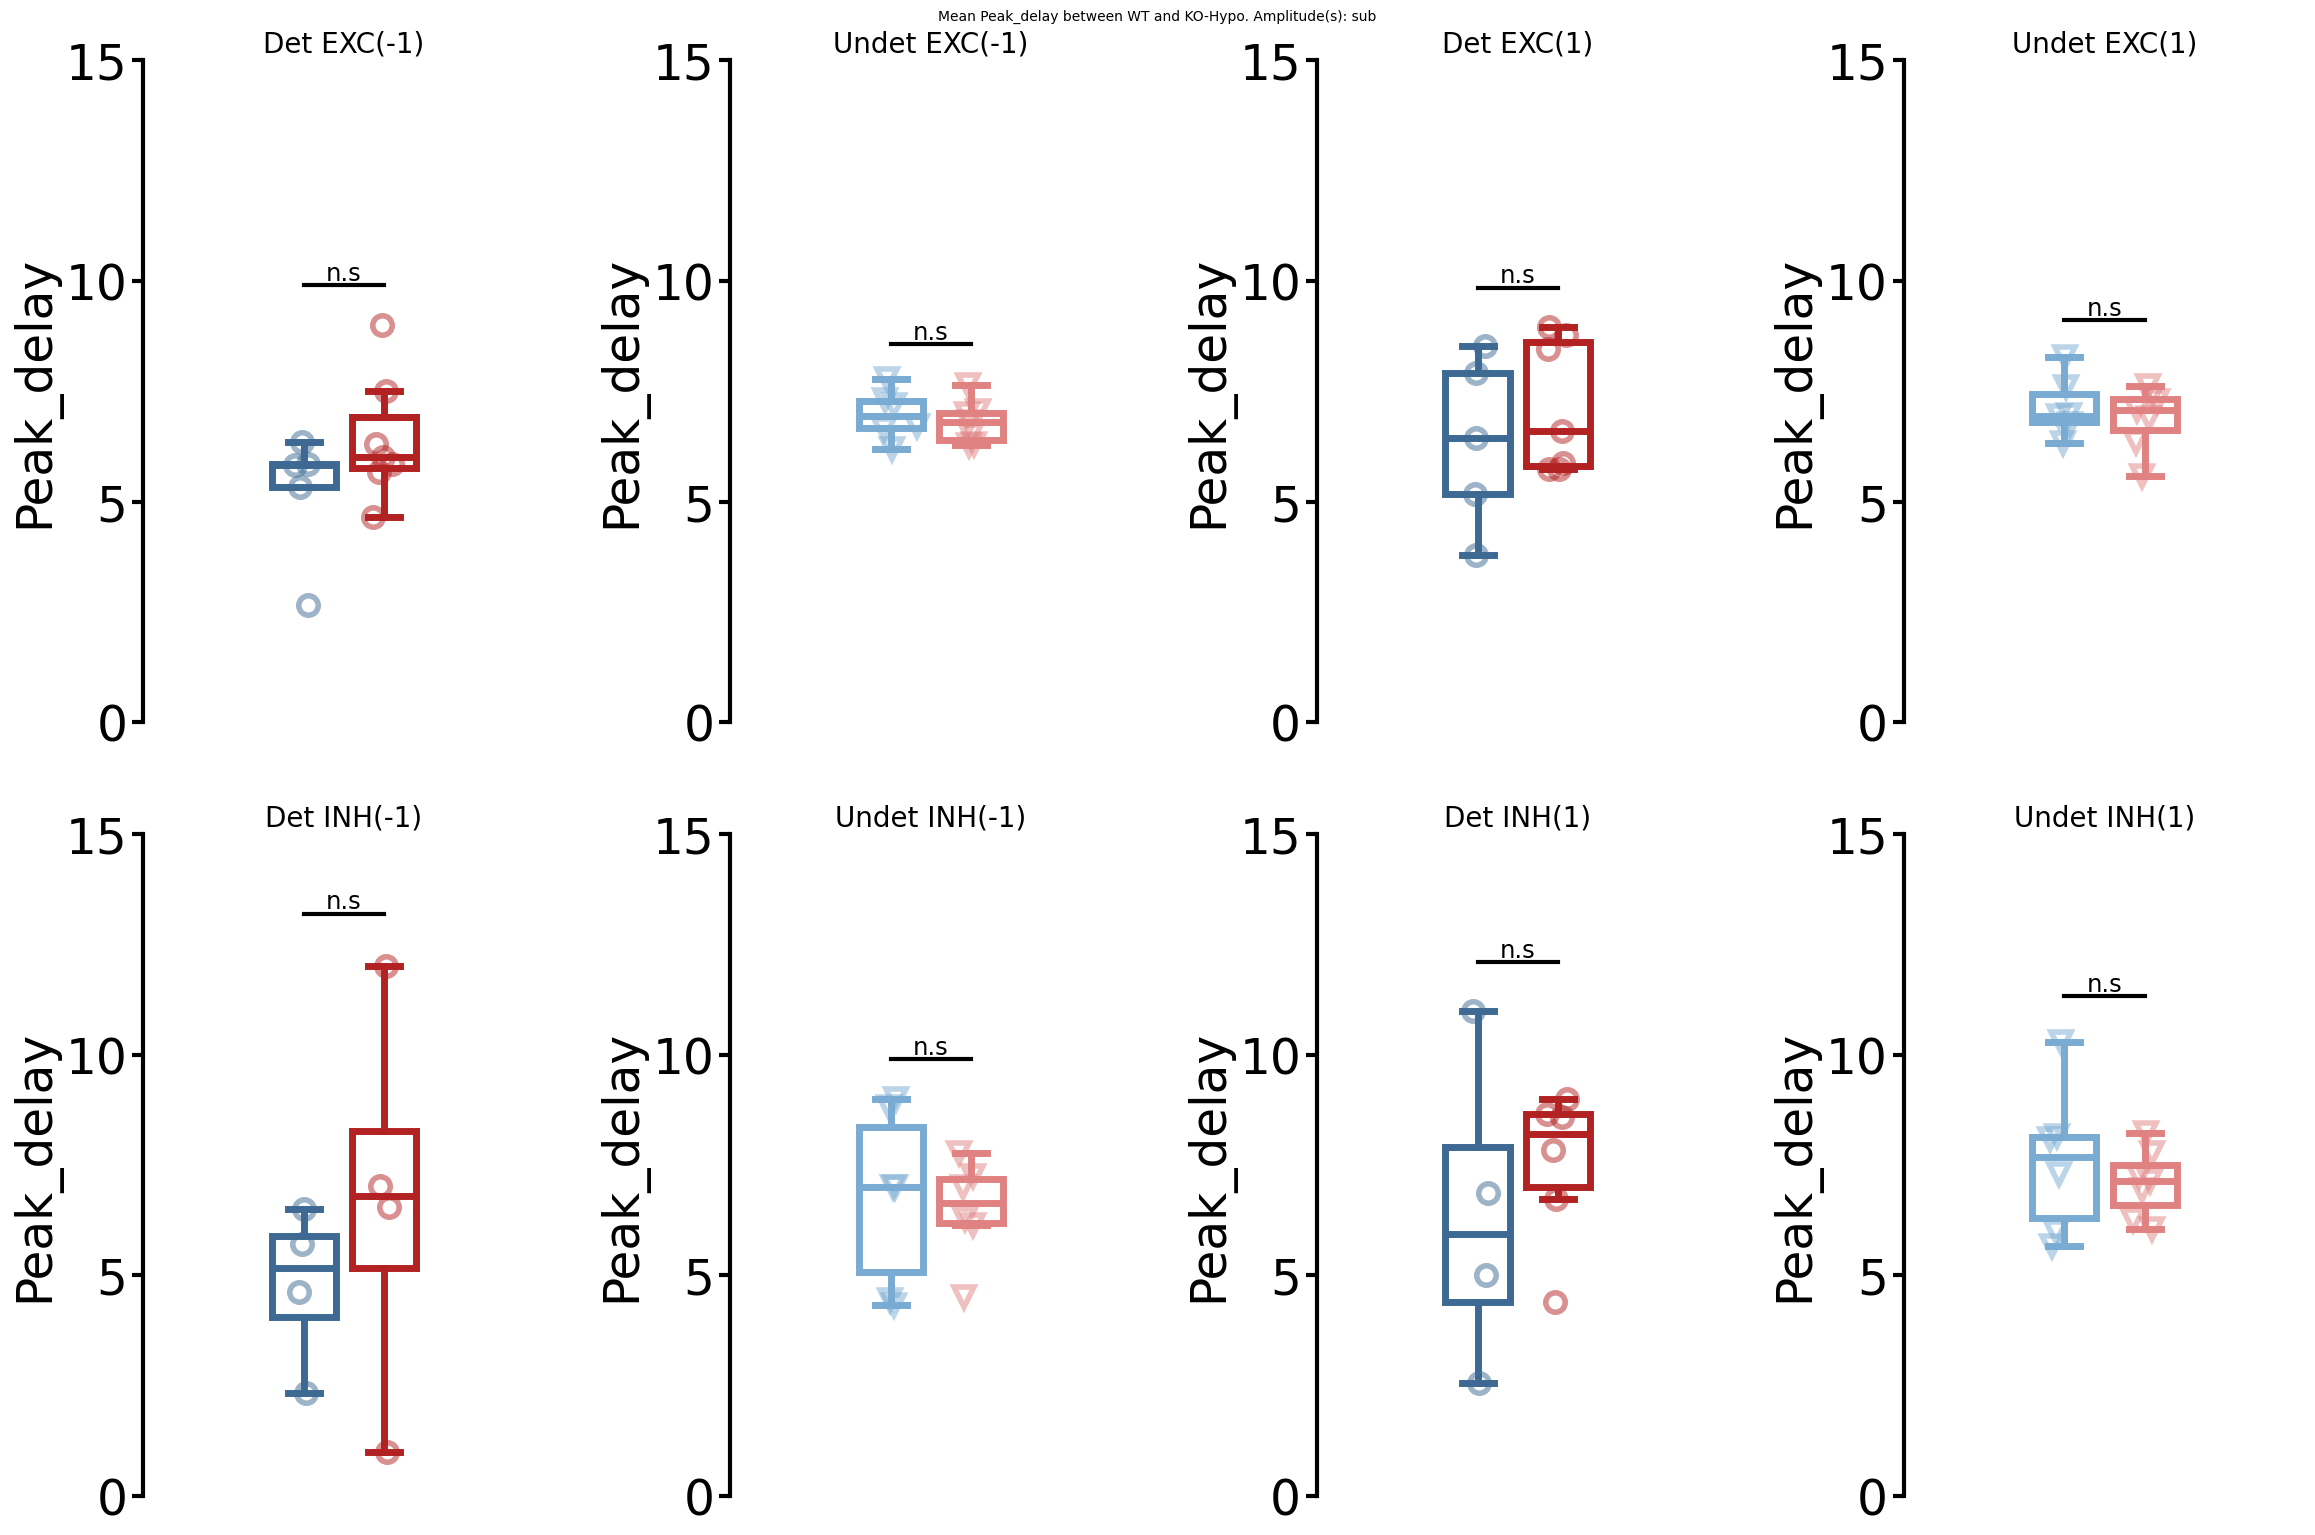

In [13]:
group_comp_param(recs, parameter="Peak_delay", ko_hypo_only=True, stim_ampl="sub", ylim=[0, 15])

### Suprathreshold amplitudes

Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.9640915016821708, pvalue=0.8400198548282187)
ShapiroResult(statistic=0.837708367029597, pvalue=0.09458029859868068)
LeveneResult(statistic=0.010984226123901717, pvalue=0.918016755221097)
Equal variances :TtestResult(statistic=-1.3542343019491196, pvalue=0.19711751367920197, df=14.0)
Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.9128218319766679, pvalue=0.336127304645793)
ShapiroResult(statistic=0.9441566697552329, pvalue=0.6763967305758303)
LeveneResult(statistic=1.177064189435301, pvalue=0.29628421223404944)
Equal variances :TtestResult(statistic=-0.813525368416343, pvalue=0.4295364077420928, df=14.0)
Boxplot plotting.
--- Peak_delay:  ---
ShapiroResult(statistic=0.9124579289365361, pvalue=0.3334587869697222)
ShapiroResult(statistic=0.9508076372908647, pvalue=0.7370459794005925)
LeveneResult(statistic=1.209611439793966, pvalue=0.28996186133137536)
Equal variances :TtestResult(statistic=-1.8432410025590

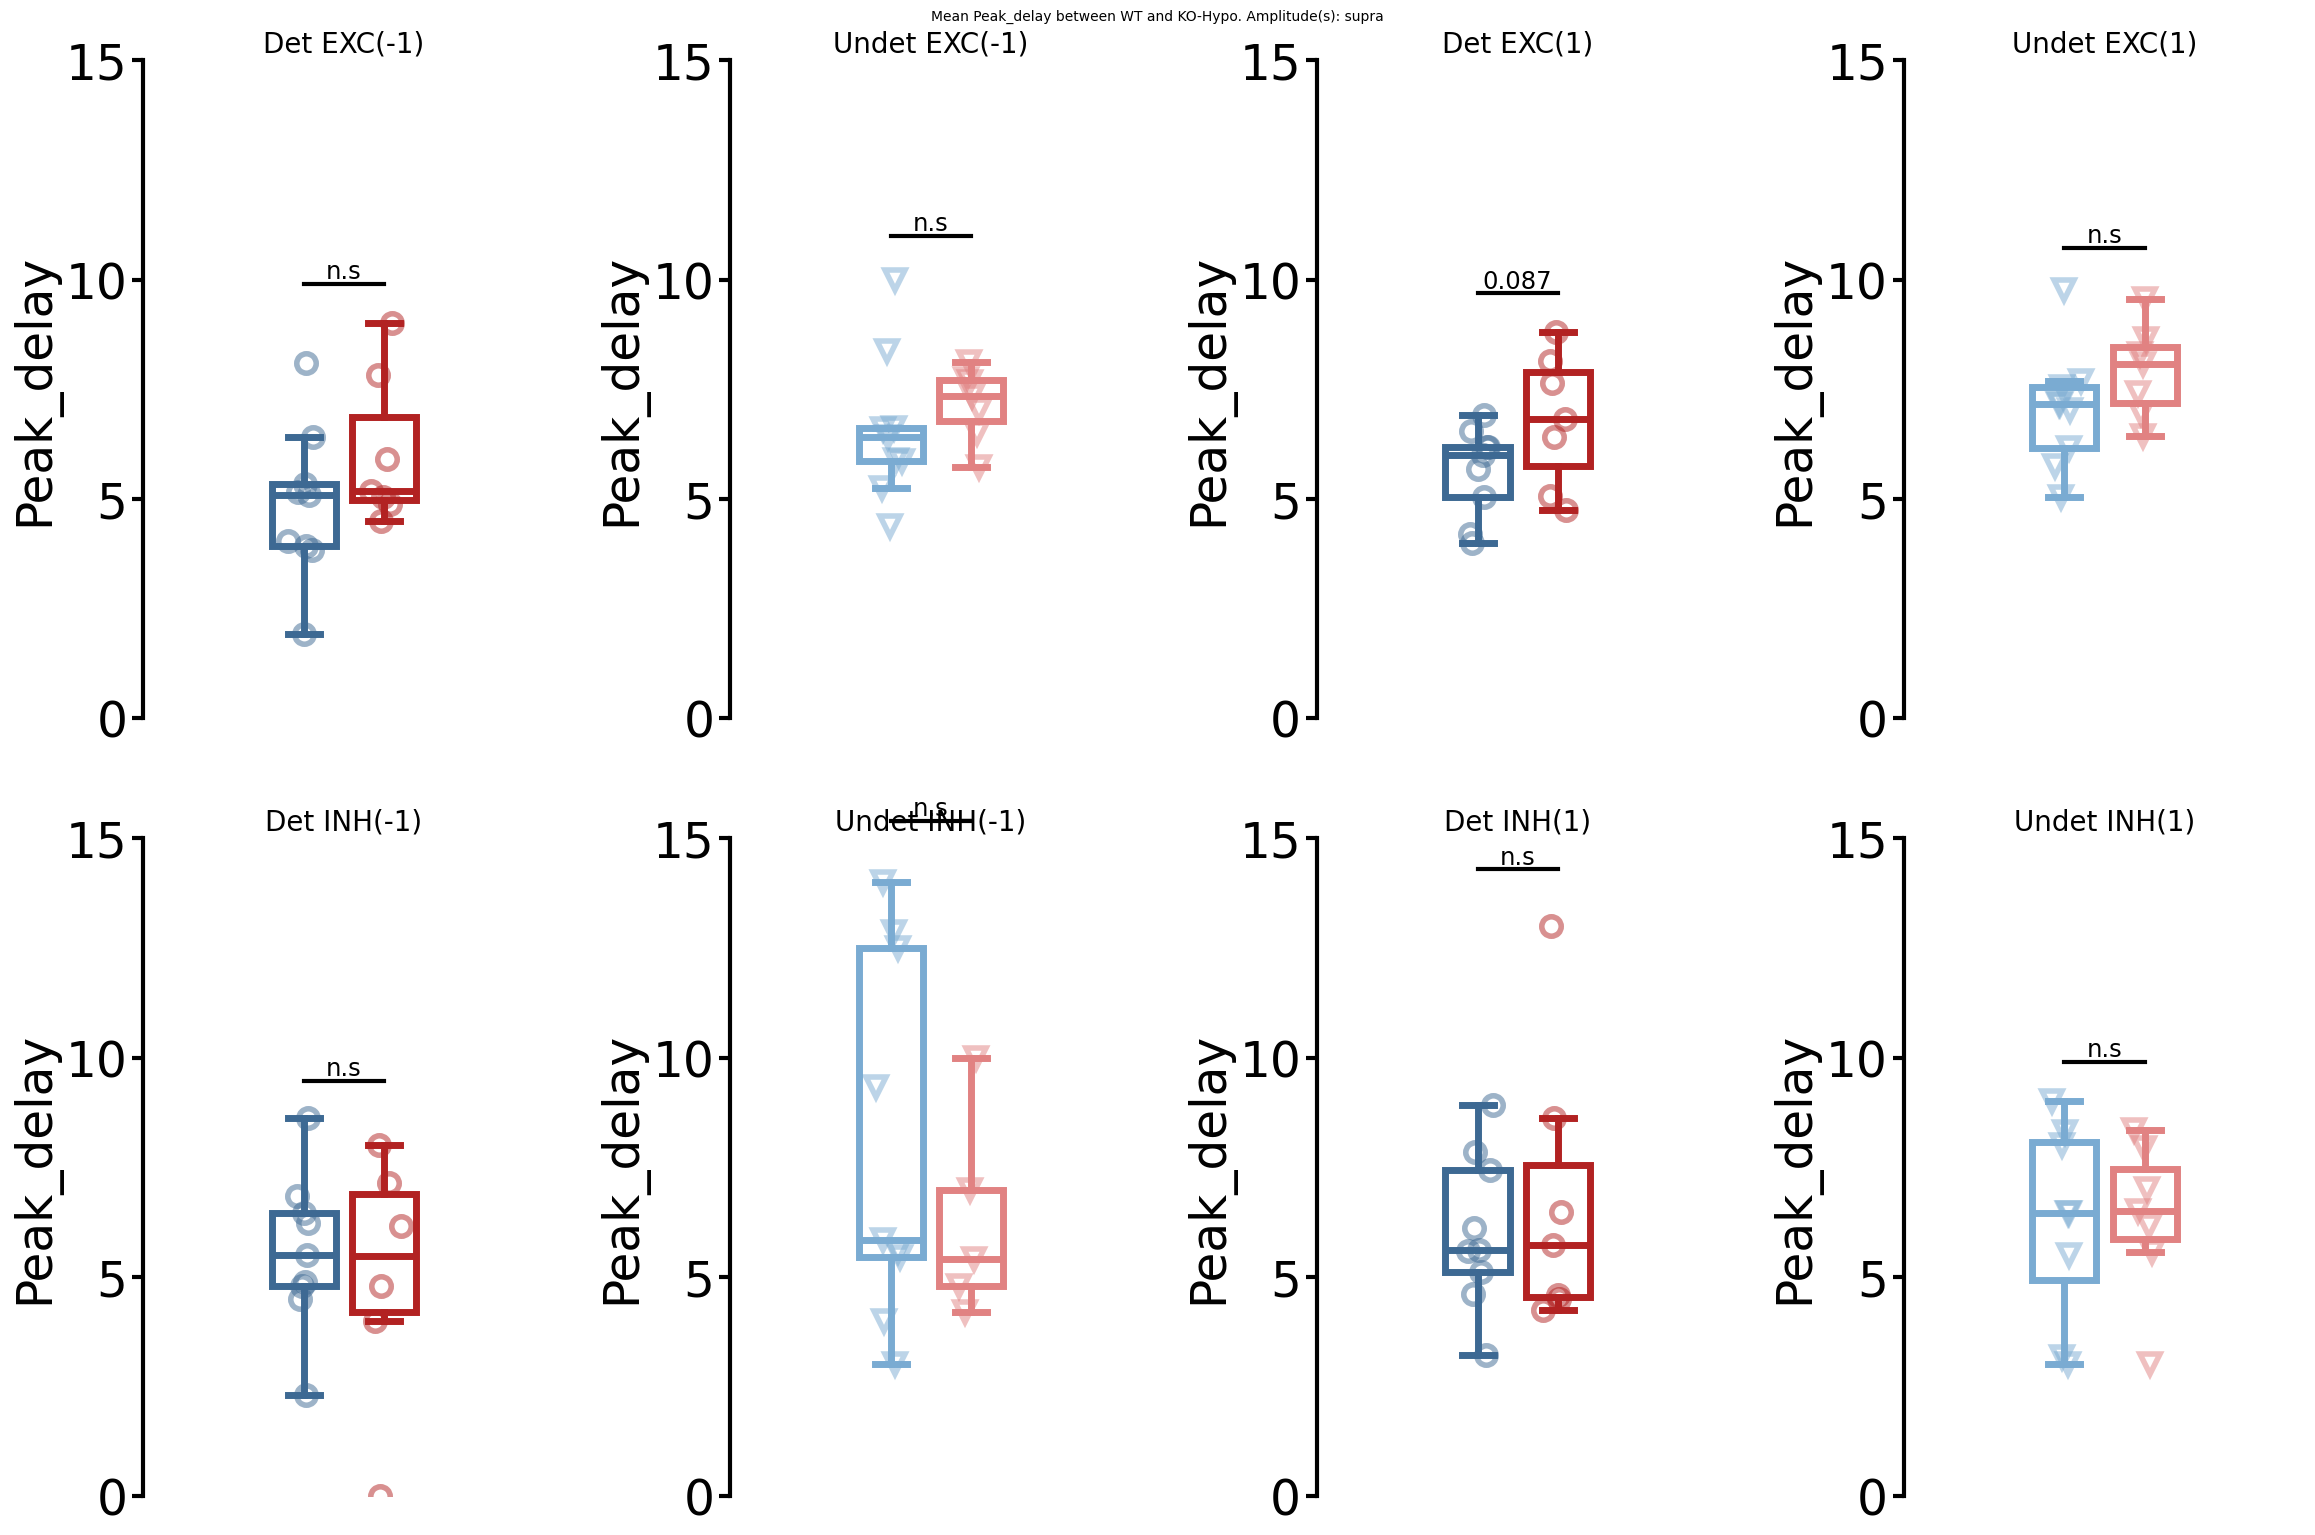

In [14]:
group_comp_param(recs, parameter="Peak_delay", ko_hypo_only=True, stim_ampl="supra", ylim=[0, 15])

## Peak amplitude

### All amplitude

Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.856809380130713, pvalue=0.08850482197838046)
ShapiroResult(statistic=0.7550563703240402, pvalue=0.014324636668001368)
MannwhitneyuResult(statistic=11.0, pvalue=0.03111888111888112)
Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.9109046633209499, pvalue=0.3222577726047219)
ShapiroResult(statistic=0.9034750954251596, pvalue=0.35254617689900153)
LeveneResult(statistic=0.6688040755860611, pvalue=0.4271687699124851)
Equal variances :TtestResult(statistic=-2.54169990308345, pvalue=0.02349240740489872, df=14.0)
Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.8011973142005943, pvalue=0.021073939980454325)
ShapiroResult(statistic=0.9352155666123457, pvalue=0.596074612395607)
MannwhitneyuResult(statistic=36.0, pvalue=0.6805944055944056)
Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.9117362728821424, pvalue=0.32821668136182386)
ShapiroResult(statistic=0.9005147136

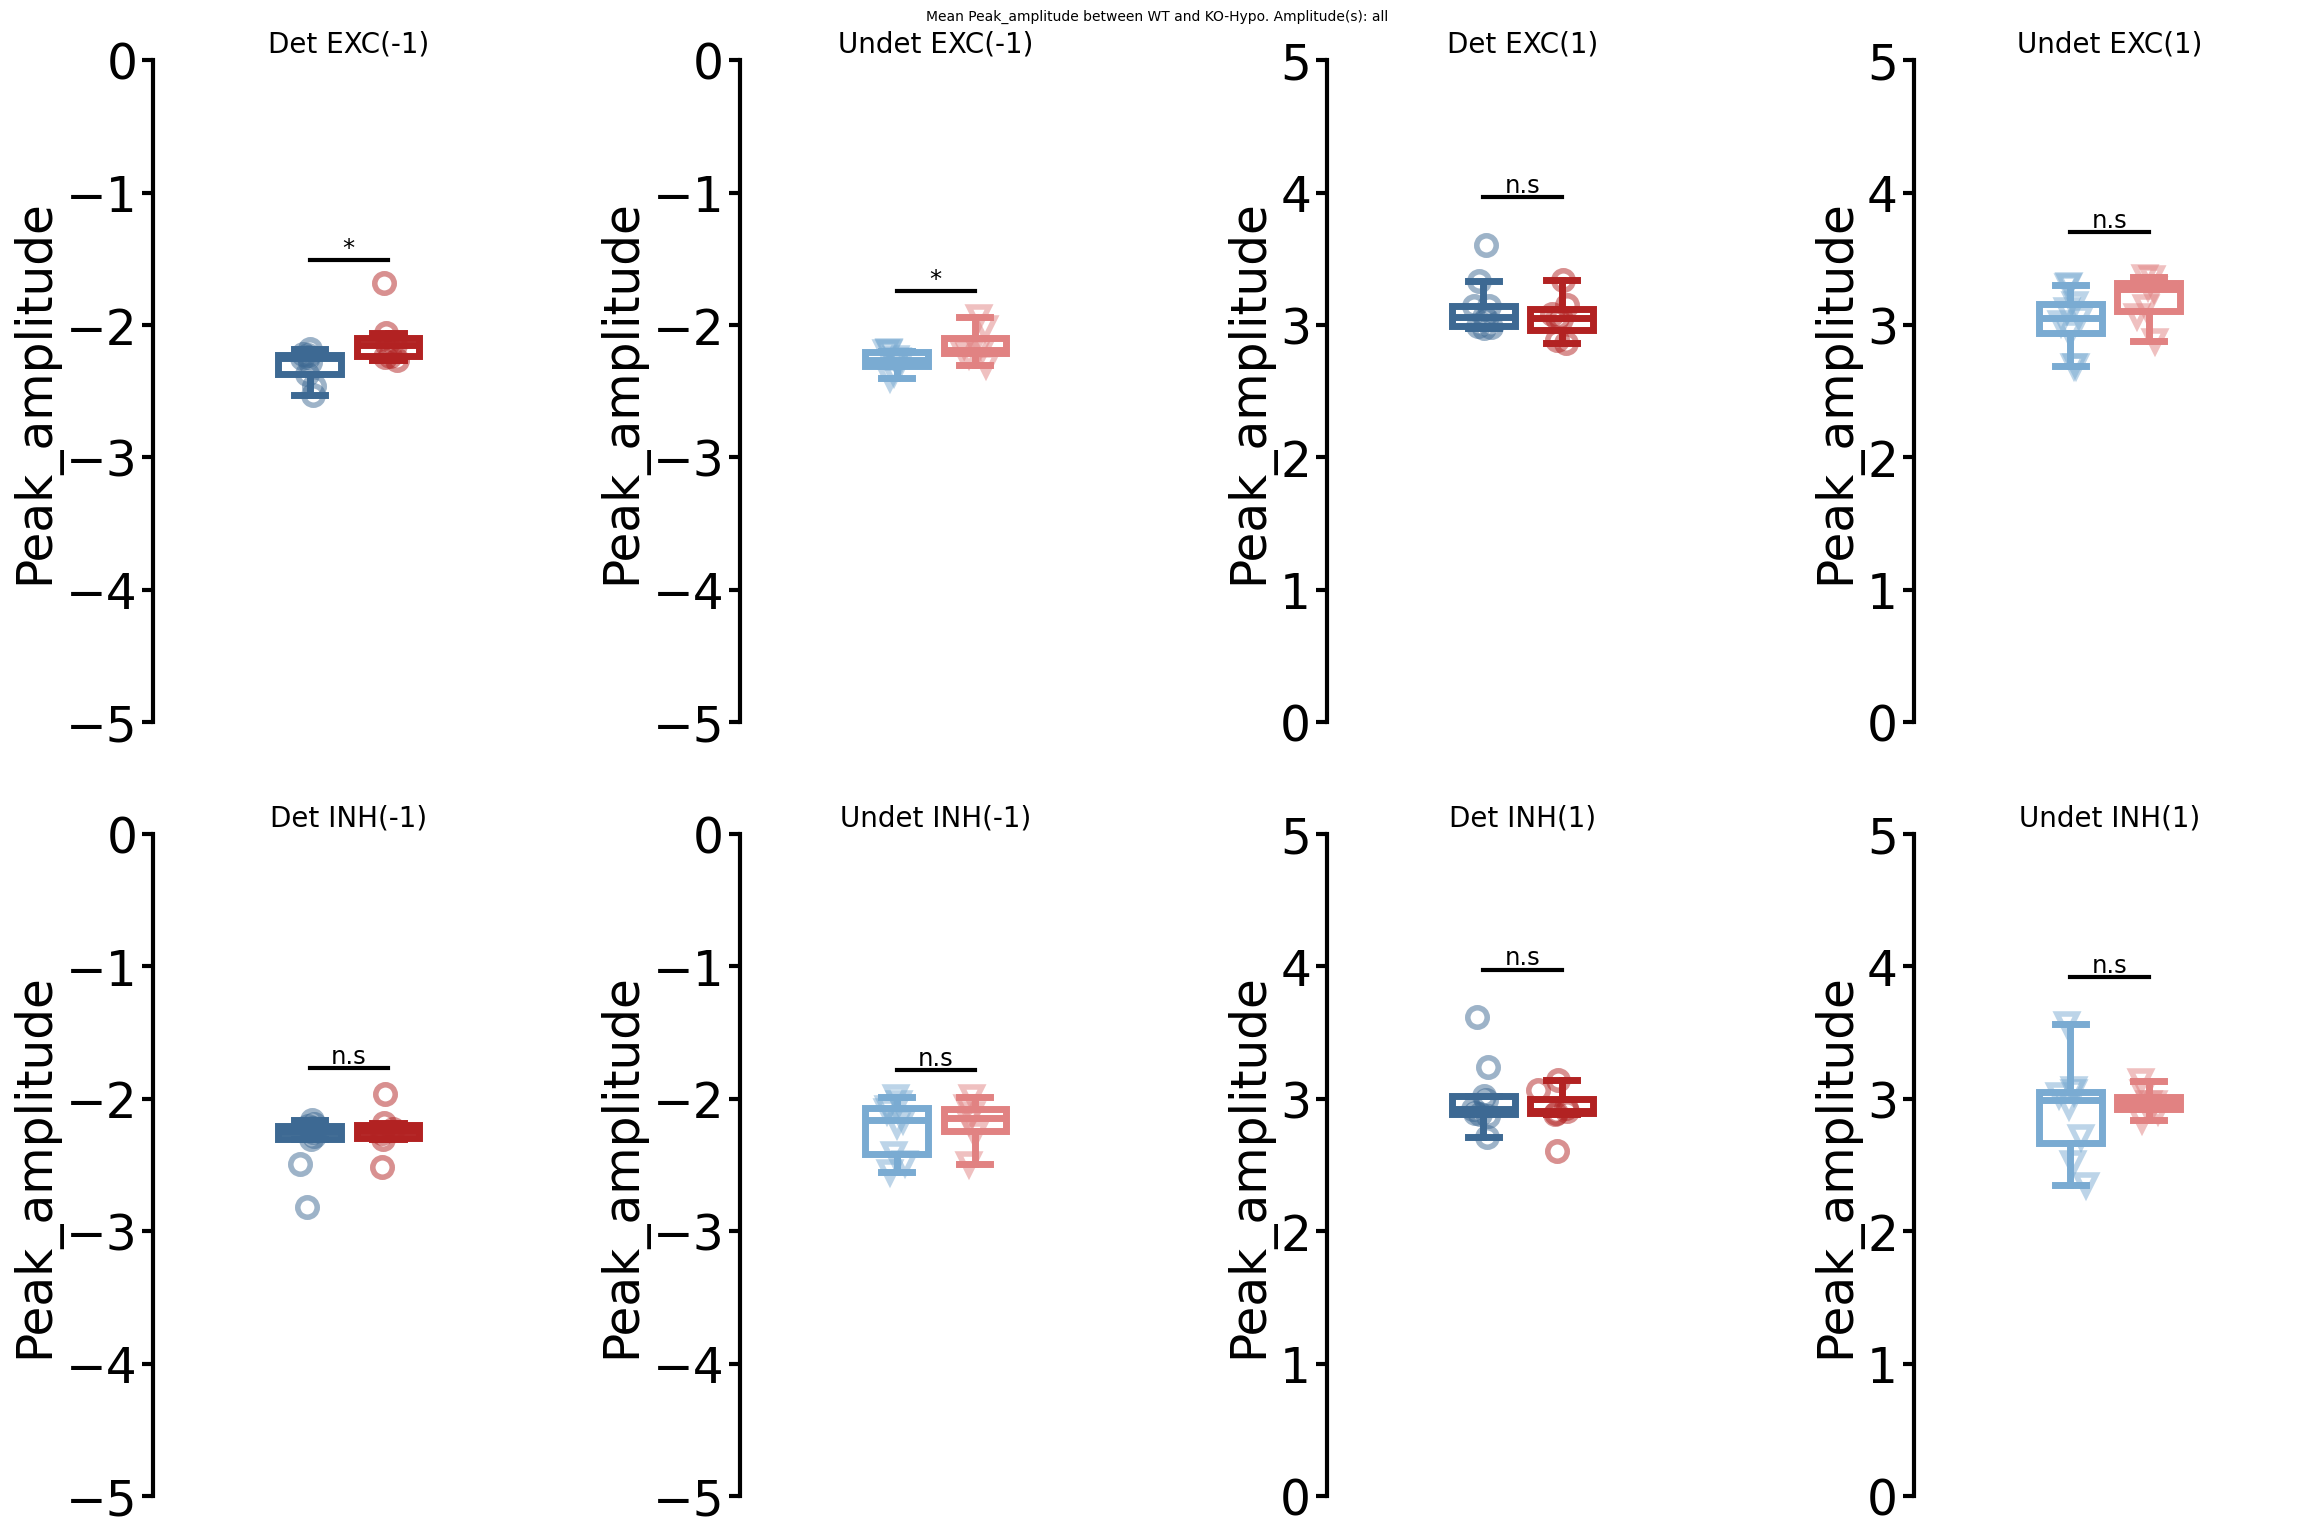

In [15]:
group_comp_param(recs, parameter="Peak_amplitude", ko_hypo_only=True, stim_ampl="all", ylim=[0, 5])

### Threshold amplitude

Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.8977061642664251, pvalue=0.2754890073133357)
ShapiroResult(statistic=0.9459312755026934, pvalue=0.692579032955808)
LeveneResult(statistic=0.001973237938578275, pvalue=0.965243793704725)
Equal variances :TtestResult(statistic=-2.5251723984984866, pvalue=0.025355117395791403, df=13.0)
Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.7246400503117358, pvalue=0.002750455397497358)
ShapiroResult(statistic=0.8149779817875378, pvalue=0.057429048794170004)
MannwhitneyuResult(statistic=22.0, pvalue=0.35104895104895106)
Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.867320884560234, pvalue=0.11507190192339667)
ShapiroResult(statistic=0.8879282099817509, pvalue=0.2640298334107827)
LeveneResult(statistic=0.00829301593617523, pvalue=0.9287302955542571)
Equal variances :TtestResult(statistic=1.8823154033819325, pvalue=0.08074461803771142, df=14.0)
Boxplot plotting.
--- Peak_amplitude:  ---


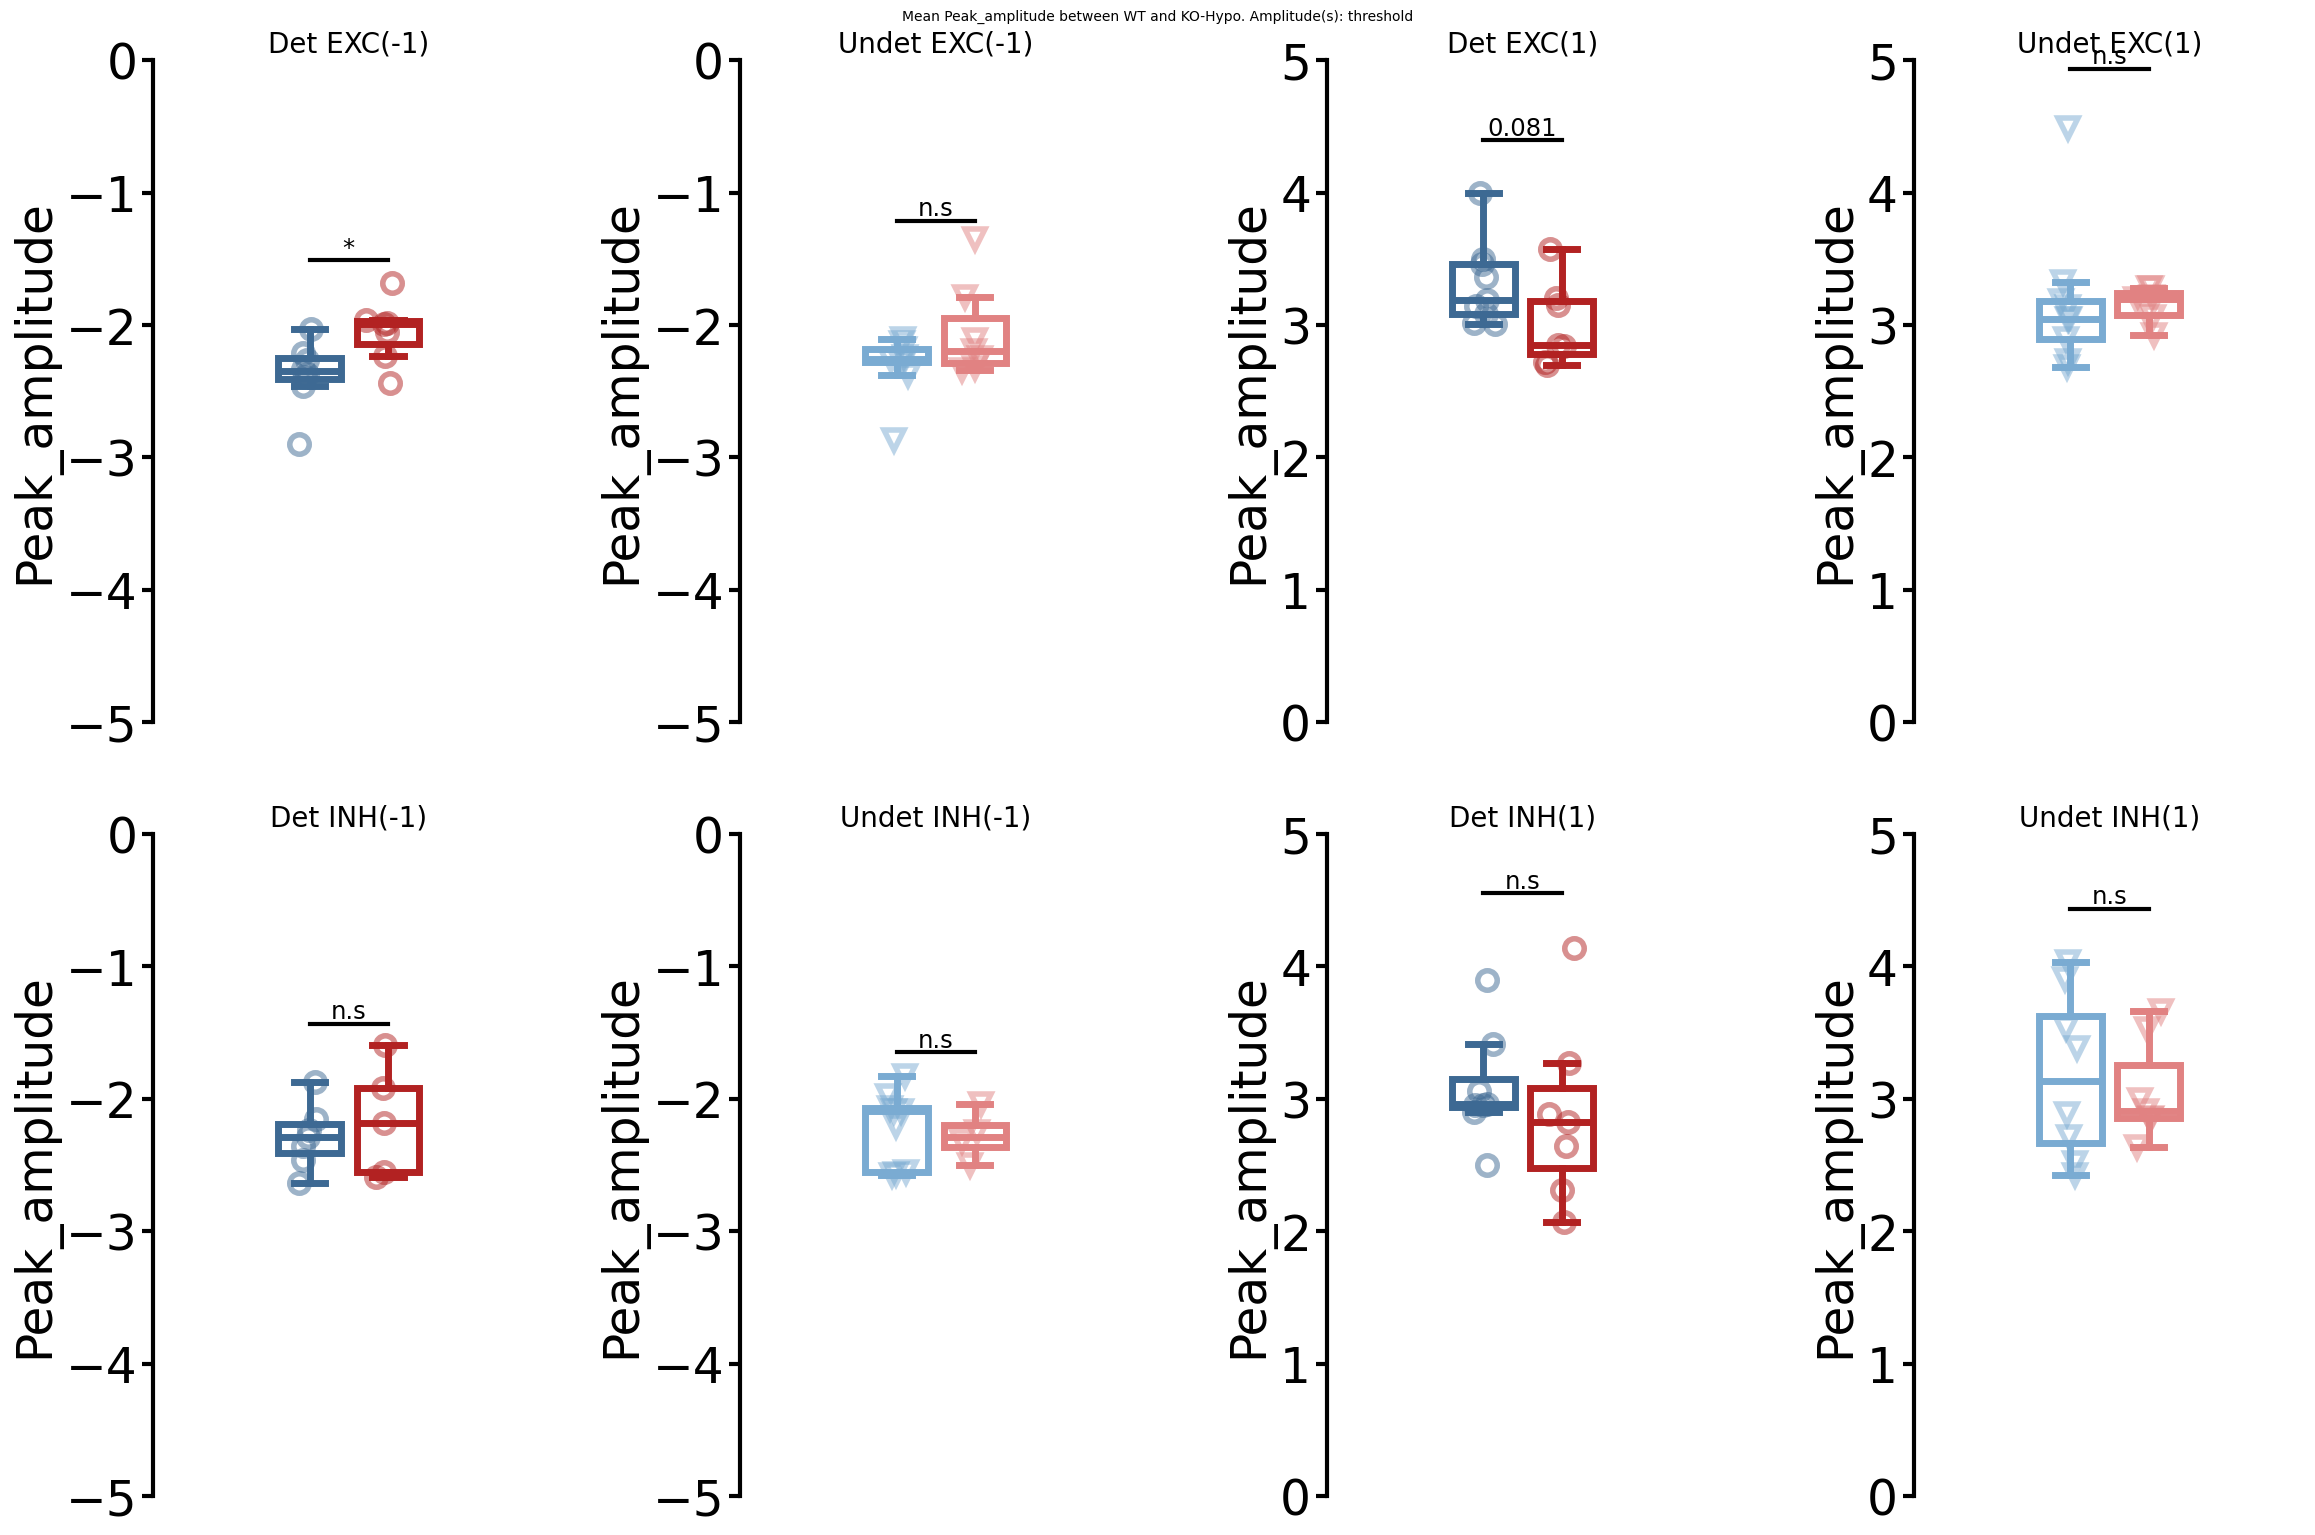

In [16]:
group_comp_param(recs, parameter="Peak_amplitude", ko_hypo_only=True, stim_ampl="threshold", ylim=[0, 5])

### Amplitude 12

Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.8685847532261954, pvalue=0.11872934653826561)
ShapiroResult(statistic=0.876821998307904, pvalue=0.21271132739999893)
LeveneResult(statistic=0.021585794918775072, pvalue=0.8852890975690618)
Equal variances :TtestResult(statistic=-2.678177298156749, pvalue=0.018009625537778014, df=14.0)
Boxplot plotting.
Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.9047025199436914, pvalue=0.2805364434843206)
ShapiroResult(statistic=0.9279974785406506, pvalue=0.534000028306014)
LeveneResult(statistic=0.179936118177989, pvalue=0.6778739767289013)
Equal variances :TtestResult(statistic=0.6073447496317407, pvalue=0.5533460601483422, df=14.0)
Boxplot plotting.
Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.9185295478610838, pvalue=0.41804582971843907)
ShapiroResult(statistic=0.9558928329339762, pvalue=0.7791338719563832)
LeveneResult(statistic=0.8539849299450301, pvalue=0.3752546254724651)
Equal

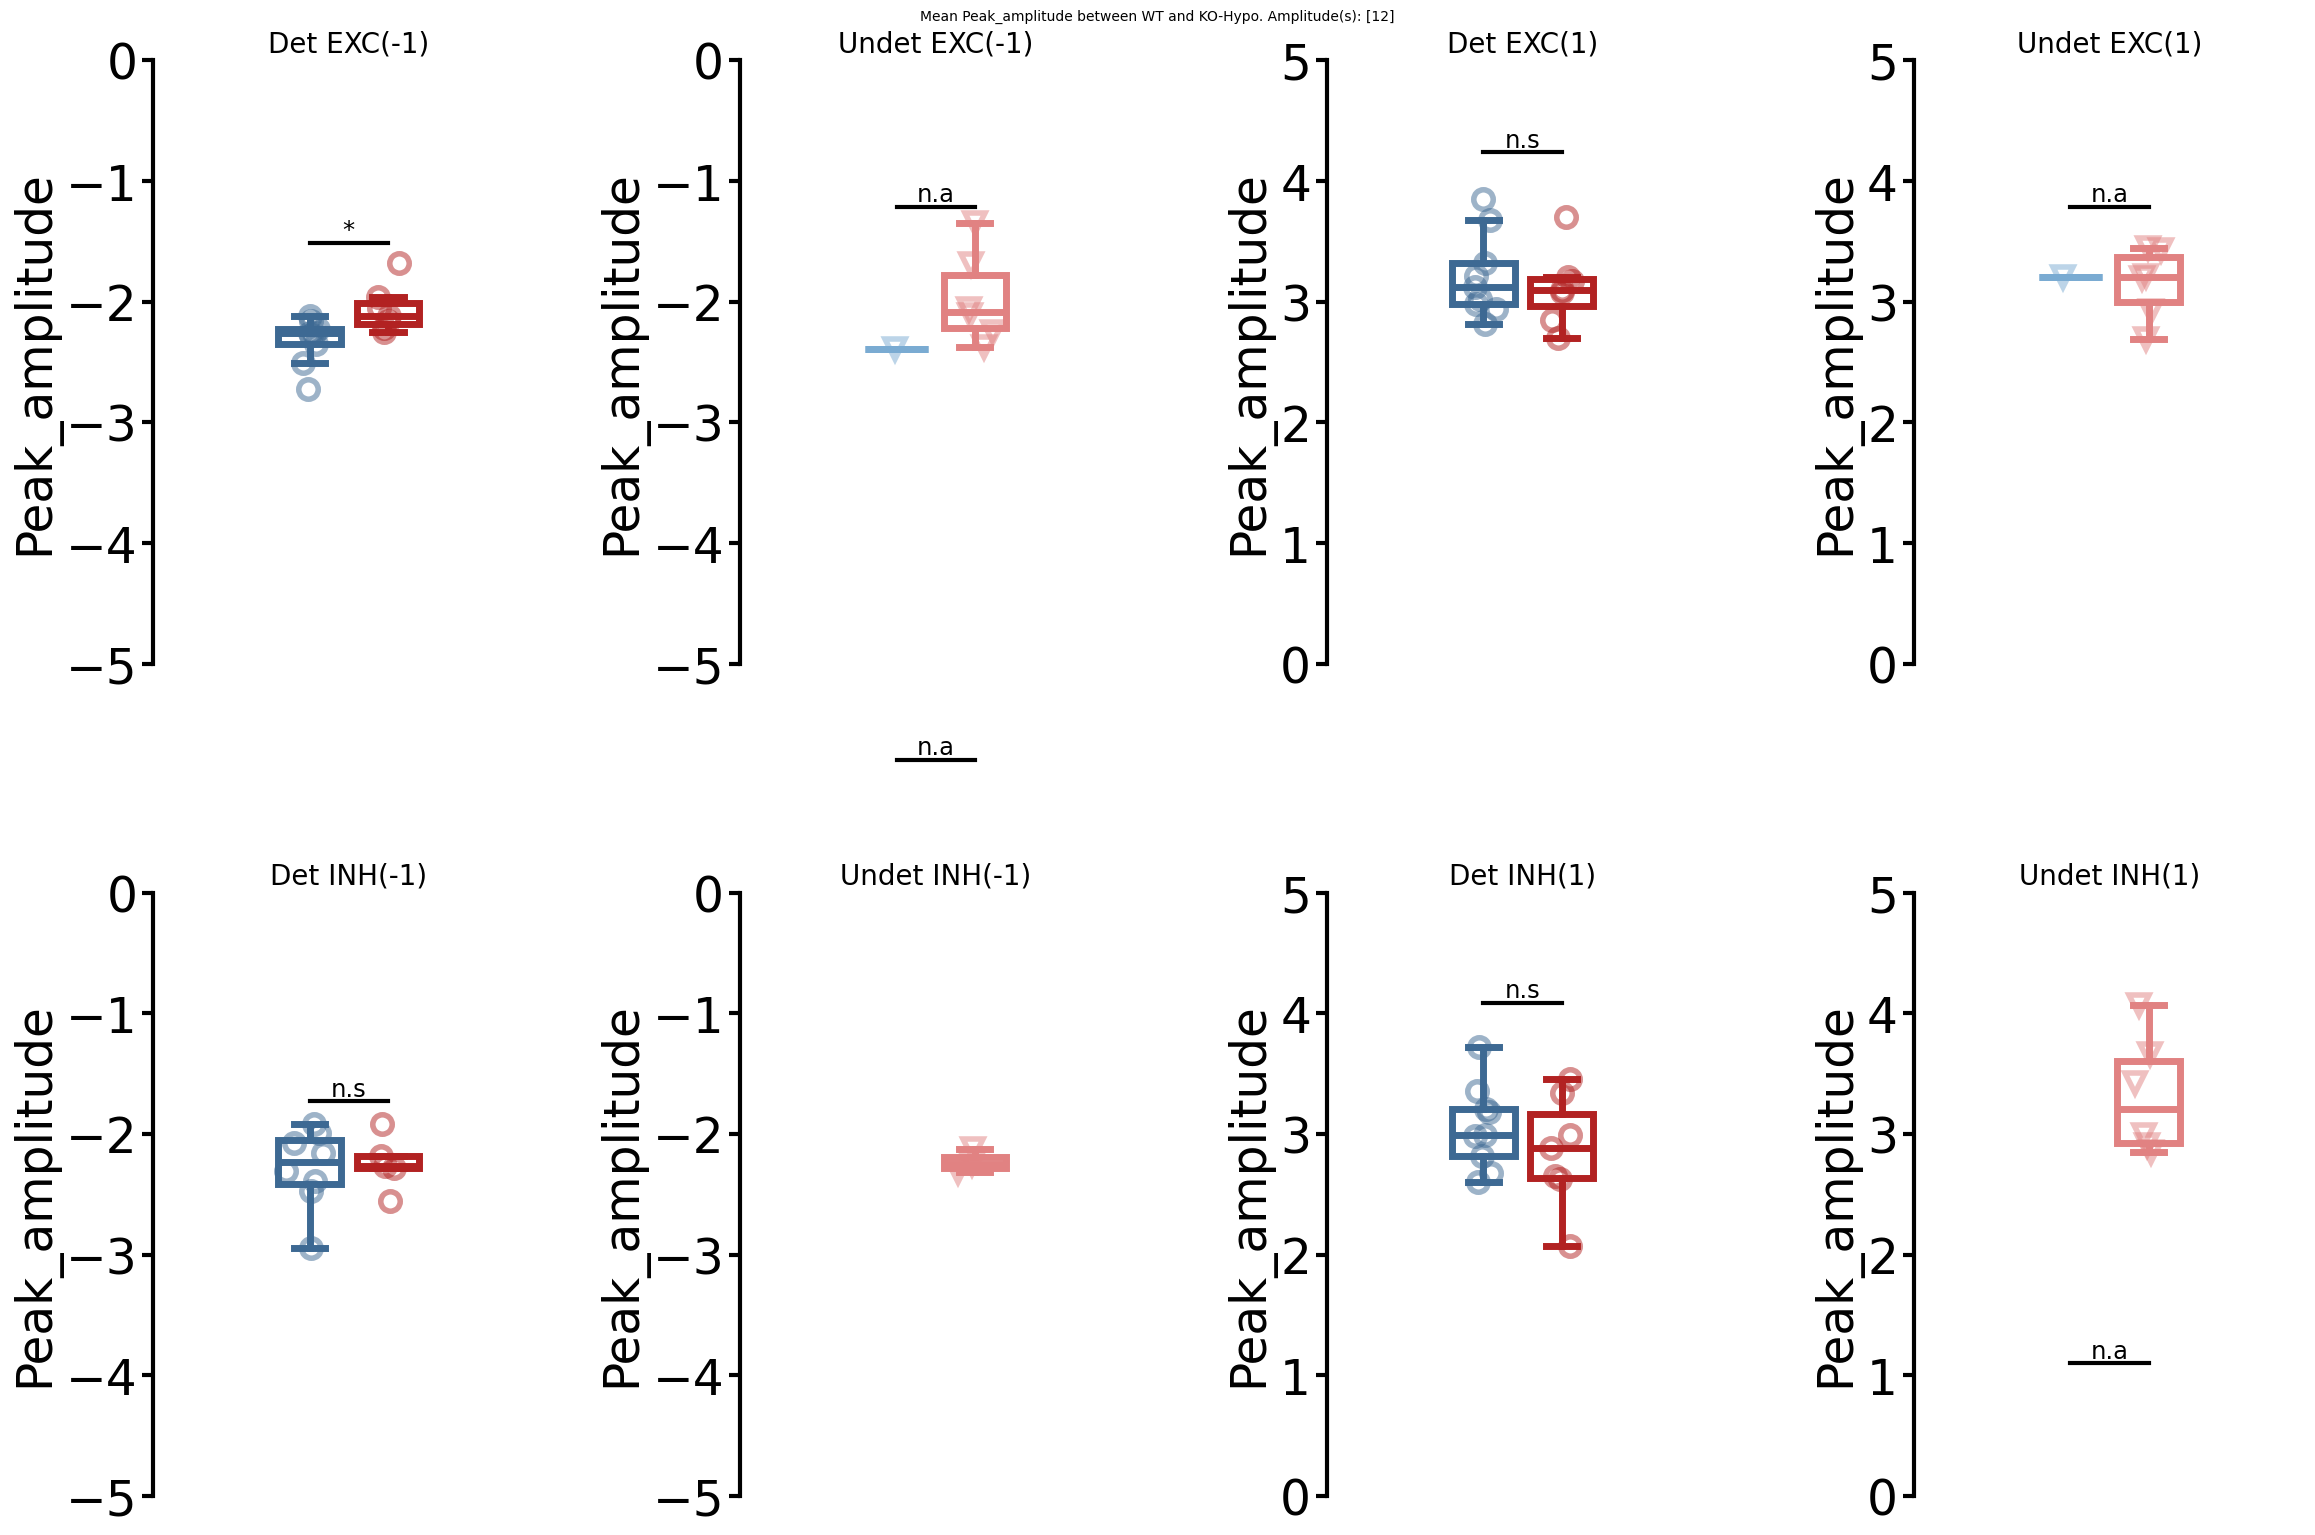

In [17]:
group_comp_param(recs, parameter="Peak_amplitude", ko_hypo_only=True, stim_ampl=[12], ylim=[0, 5])

### Subthreshold amplitudes

Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.9926938648535271, pvalue=0.9882253202520264)
ShapiroResult(statistic=0.5950256910489489, pvalue=0.00023787107878597133)
MannwhitneyuResult(statistic=11.0, pvalue=0.3434343434343435)
Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.9749786327266302, pvalue=0.9240505162325421)
ShapiroResult(statistic=0.9115245348714597, pvalue=0.4065312109466379)
LeveneResult(statistic=0.4878138730432716, pvalue=0.49940375572641404)
Equal variances :TtestResult(statistic=-2.315403200168362, pvalue=0.04090767199413626, df=11.0)
Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.978258584865298, pvalue=0.925095114992711)
ShapiroResult(statistic=0.9106469178468, pvalue=0.4003716400213144)
LeveneResult(statistic=1.9013237162068866, pvalue=0.1979893321927625)
Equal variances :TtestResult(statistic=1.3184126714350595, pvalue=0.2167632152198251, df=10.0)
Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroRe

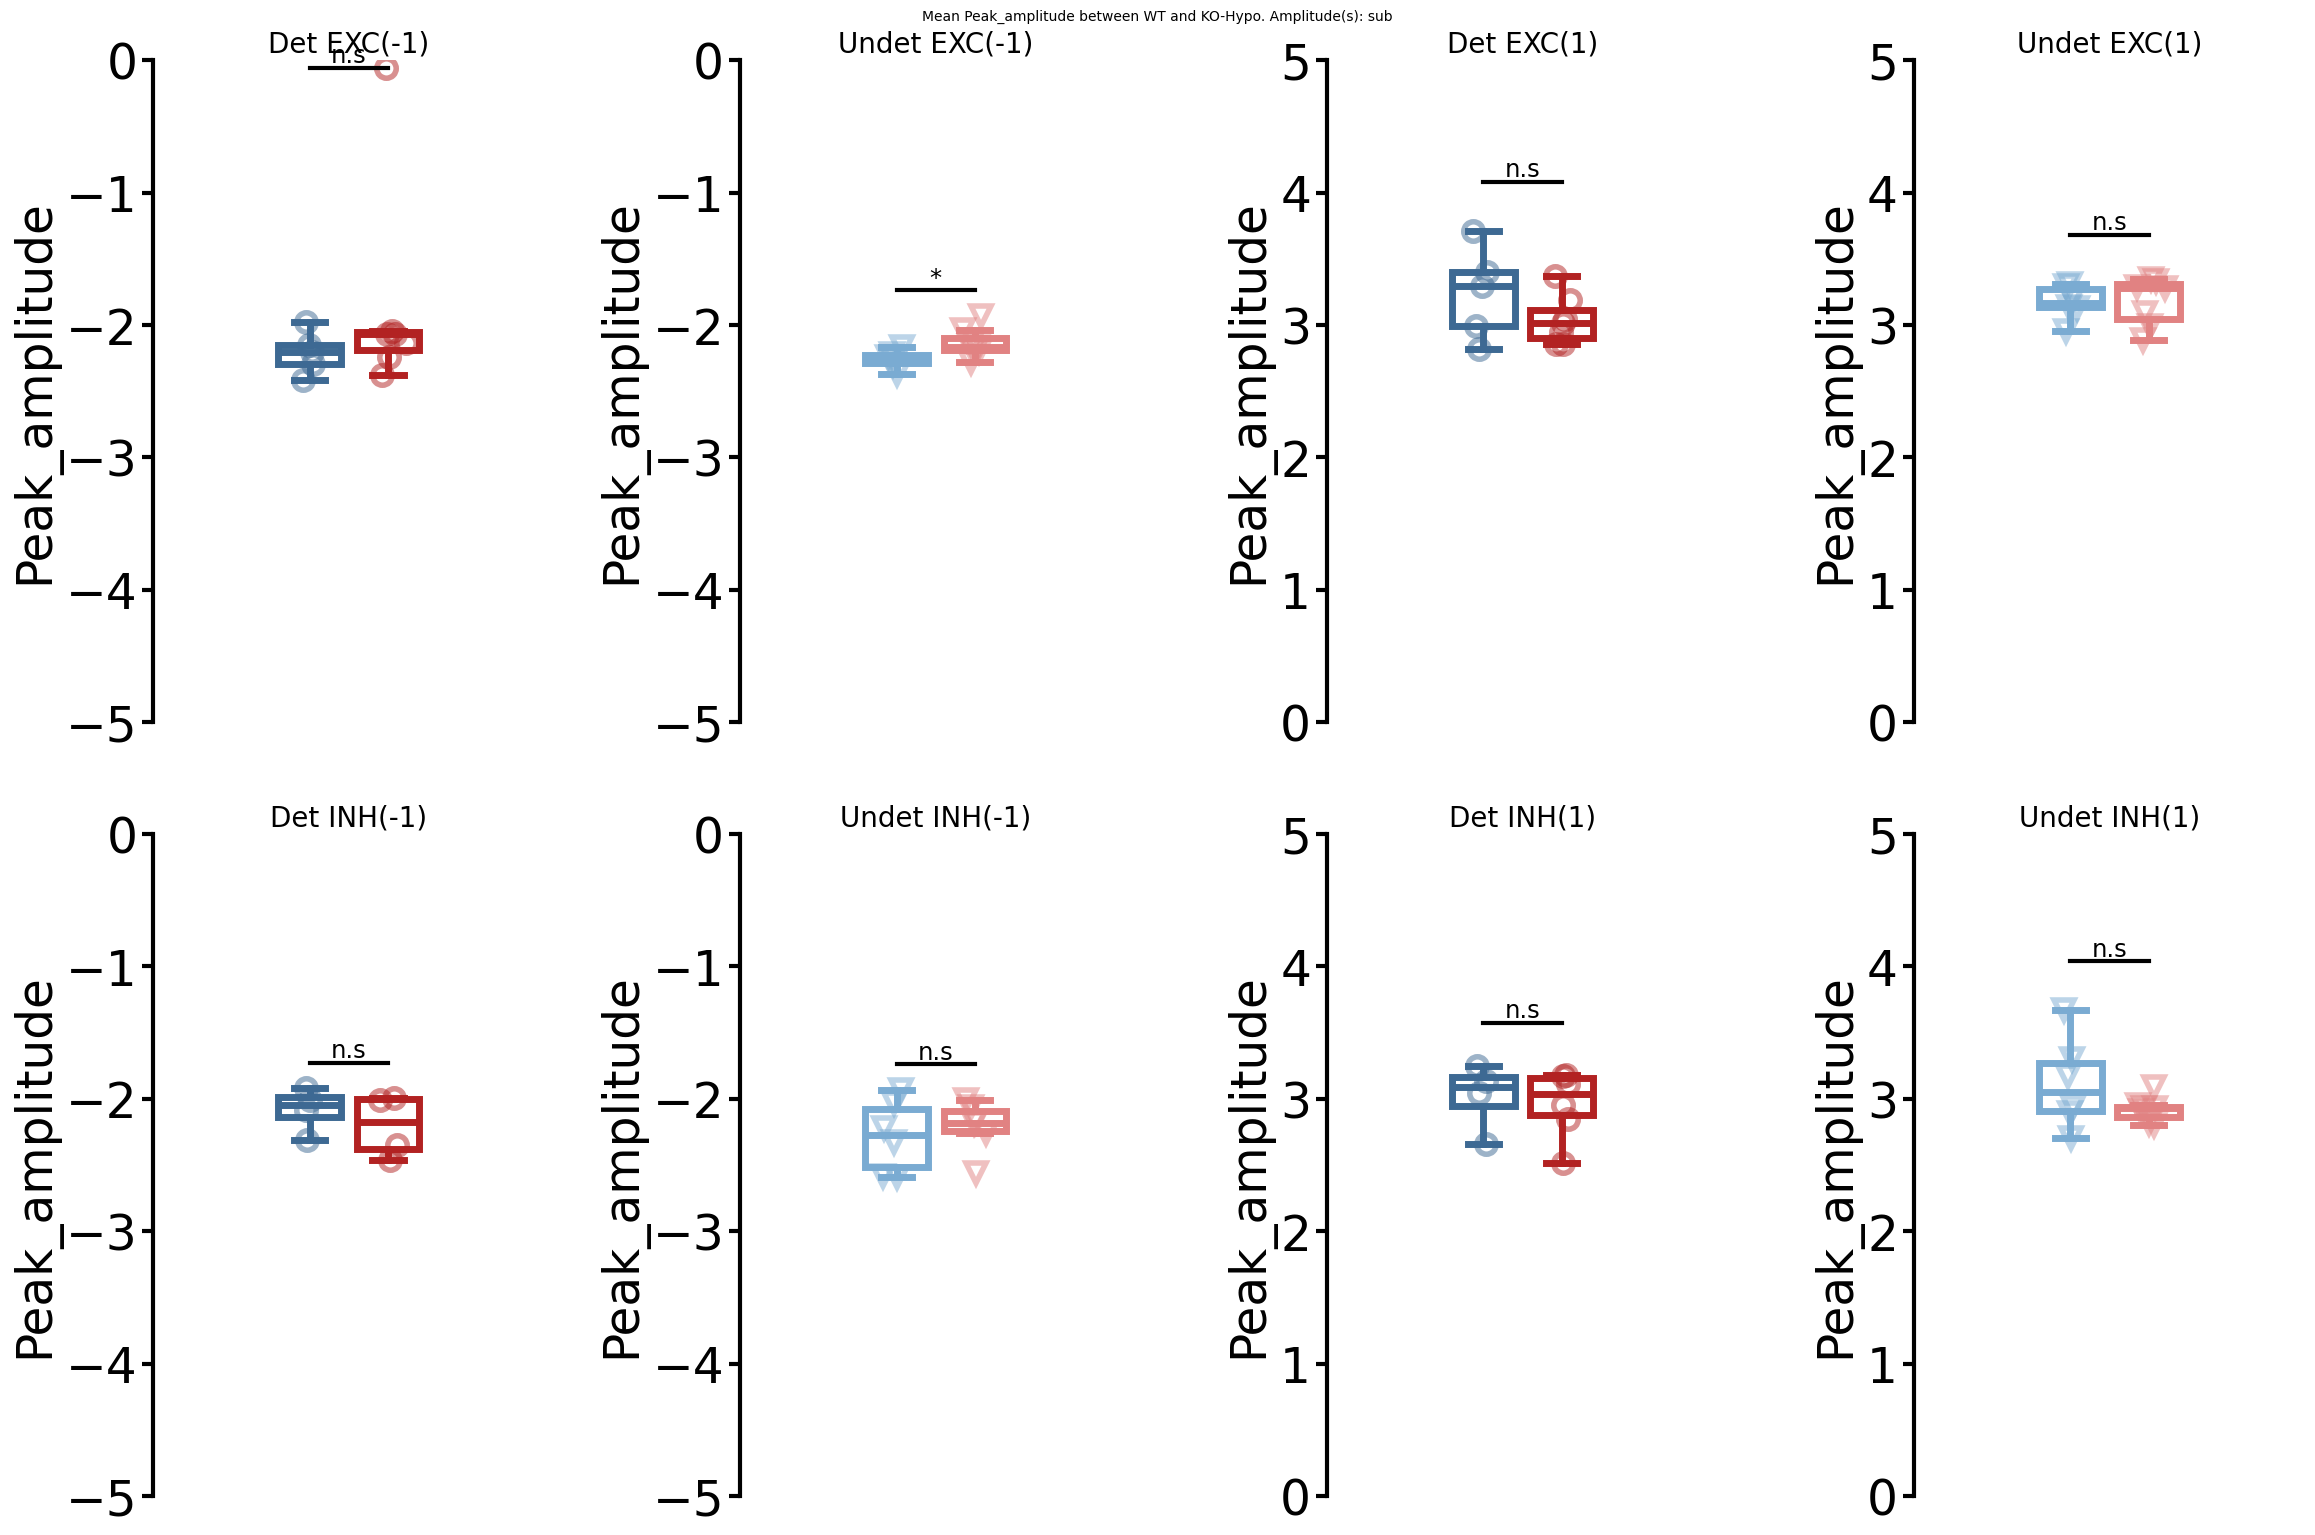

In [18]:
group_comp_param(recs, parameter="Peak_amplitude", ko_hypo_only=True, stim_ampl="sub", ylim=[0, 5])

### Suprathreshold amplitudes

Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.8331999879421383, pvalue=0.04849735932144825)
ShapiroResult(statistic=0.8918139158900555, pvalue=0.28425973143145855)
MannwhitneyuResult(statistic=10.0, pvalue=0.022902097902097907)
Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.8226339217416303, pvalue=0.03689930040289056)
ShapiroResult(statistic=0.8105807867336803, pvalue=0.0520429878282471)
MannwhitneyuResult(statistic=21.0, pvalue=0.29912587412587416)
Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.7891147702167453, pvalue=0.015328353750112649)
ShapiroResult(statistic=0.9797821209323628, pvalue=0.9584734310077547)
MannwhitneyuResult(statistic=34.0, pvalue=0.8370629370629371)
Boxplot plotting.
--- Peak_amplitude:  ---
ShapiroResult(statistic=0.7656808032890935, pvalue=0.008234827162740446)
ShapiroResult(statistic=0.8883052221601402, pvalue=0.265939213053338)
MannwhitneyuResult(statistic=19.0, pvalue=0.2104895104895105)
Box

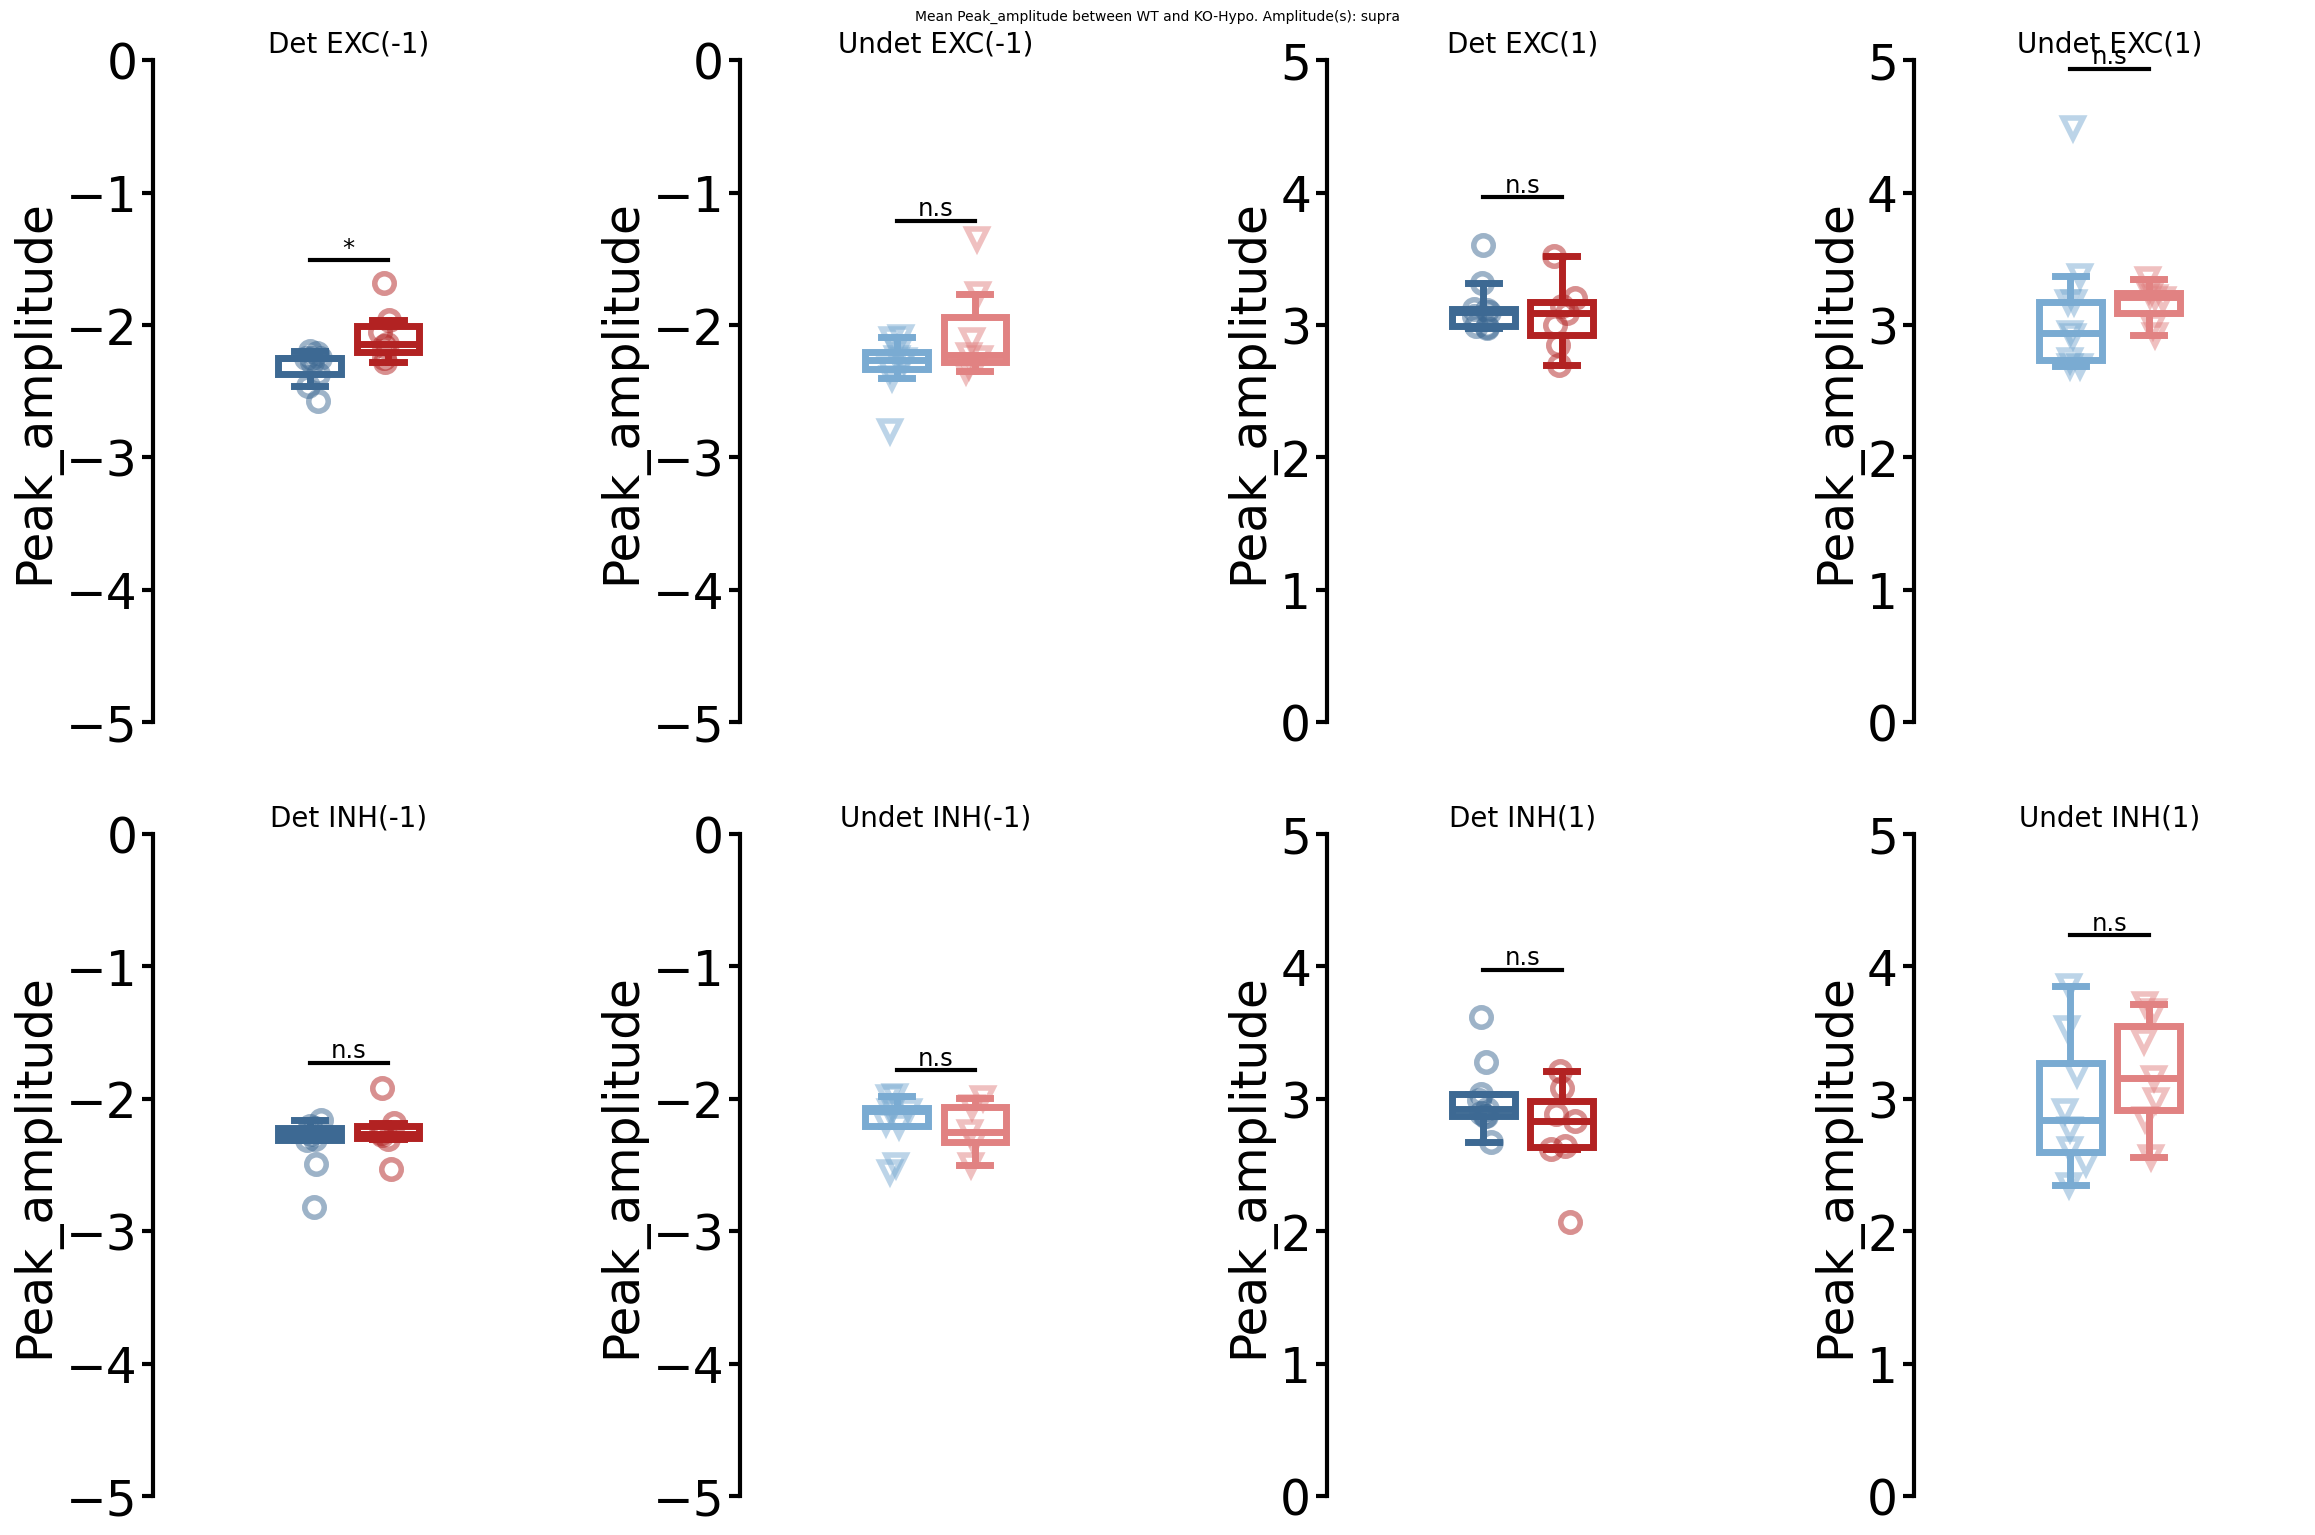

In [19]:
group_comp_param(recs, parameter="Peak_amplitude", ko_hypo_only=True, stim_ampl="supra", ylim=[0, 5])

# Comparison of a parameter between detected and undetected stimulation according to group

---

In [20]:
def det_comp_param(recs, parameter, stim_ampl="all", ylim=[]):
    fig, axs = plt.subplots(2, 6, figsize=(36, 16))
    for i, neuron_type in enumerate(["EXC", "INH"]):
        for j, response_type in enumerate([-1, 1]):
            auto_ylim = ylim
            if ylim != [] and response_type == -1 and parameter != "Peak_delay":
                auto_ylim = [-i for i in ylim][::-1]
            wt_det, wt_undet, ko_det, ko_undet, hypo_det, hypo_undet = [], [], [], [], [], []
            
            for rec in recs.values():
                # Filtering of stimulations
                stim_filter = rec.stim_ampl_filter(stim_ampl)
                
                # Responsivity and parameter matrices building or retrieving according to neuron type
                resp_mat = rec.matrices[neuron_type]["Responsivity"]
                para_mat = rec.matrices[neuron_type][parameter]

                
                # For detected stimuli
                stim_thre_det = np.logical_and(stim_filter, rec.detected_stim)
                resp_detected = resp_mat[:,stim_thre_det]
                detected = para_mat[:,stim_thre_det]
                det = np.where(resp_detected == response_type, detected, np.nan)
                
                # For undetected stimuli
                stim_thre_undet = np.logical_and(stim_filter, np.invert(rec.detected_stim))
                resp_undetected = resp_mat[:,stim_thre_undet]
                undetected = para_mat[:,stim_thre_undet]
                undet = np.where(resp_undetected == response_type, undetected, np.nan)
                
                if rec.genotype == "WT":
                    wt_det.append(np.nanmean(np.nanmean(det, axis=1)))
                    wt_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
                else:
                    ko_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                    ko_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
                if rec.genotype == "KO-Hypo":
                    hypo_det.append(np.nanmean(np.nanmean(np.nanmean(det, axis=1))))
                    hypo_undet.append(np.nanmean(np.nanmean(undet, axis=1)))
                
            ppt.boxplot(axs[i, 3*j], wt_det, wt_undet, ylabel=parameter, paired=True, title=f"WT {neuron_type}({response_type})", ylim=auto_ylim, 
                        colors=[ppt.wt_color, ppt.wt_light_color])
            ppt.boxplot(axs[i, 3*j+1], ko_det, ko_undet, ylabel=parameter, paired=True, title=f"KO + KO-Hypo {neuron_type}({response_type})", ylim=auto_ylim, 
                        colors=[ppt.all_ko_color, ppt.all_ko_light_color])
            ppt.boxplot(axs[i, 3*j+2], hypo_det, hypo_undet, ylabel=parameter, paired=True, title=f"KO-Hypo {neuron_type}({response_type})", ylim=auto_ylim, 
                        colors=[ppt.hypo_color, ppt.hypo_light_color])
    plt.tight_layout()
    fig.suptitle(f"Mean {parameter} for detected vs. undetected stimuli. Amplitude(s): {stim_ampl}", fontsize=10)
    if save_figure:
        title = f"Figure2/response_characterization/det_{parameter}_{stim_ampl}.pdf"
        fig.savefig(server_address + title)

## AUC

### All amplitudes

Boxplot plotting.
--- AUC: WT EXC(-1) ---
ShapiroResult(statistic=0.8600367778061571, pvalue=0.09597252771769174)
ShapiroResult(statistic=0.8566535856381552, pvalue=0.08815866190404369)
TtestResult(statistic=3.7087830412909337, pvalue=0.005966774064436584, df=8)
Boxplot plotting.
--- AUC: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.891448388123353, pvalue=0.20647438660839712)
ShapiroResult(statistic=0.931941259916455, pvalue=0.5000471402611328)
TtestResult(statistic=2.951311469881114, pvalue=0.018388783704490326, df=8)
Boxplot plotting.
--- AUC: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.911936037472683, pvalue=0.40944228030680085)
ShapiroResult(statistic=0.9372630287403971, pvalue=0.6142050272283368)
TtestResult(statistic=2.647468354735611, pvalue=0.0381575032123148, df=6)
Boxplot plotting.
--- AUC: WT EXC(1) ---
ShapiroResult(statistic=0.9752075351364956, pvalue=0.9352329577795098)
ShapiroResult(statistic=0.8706355657482927, pvalue=0.12489610031863879)
TtestResult(statistic

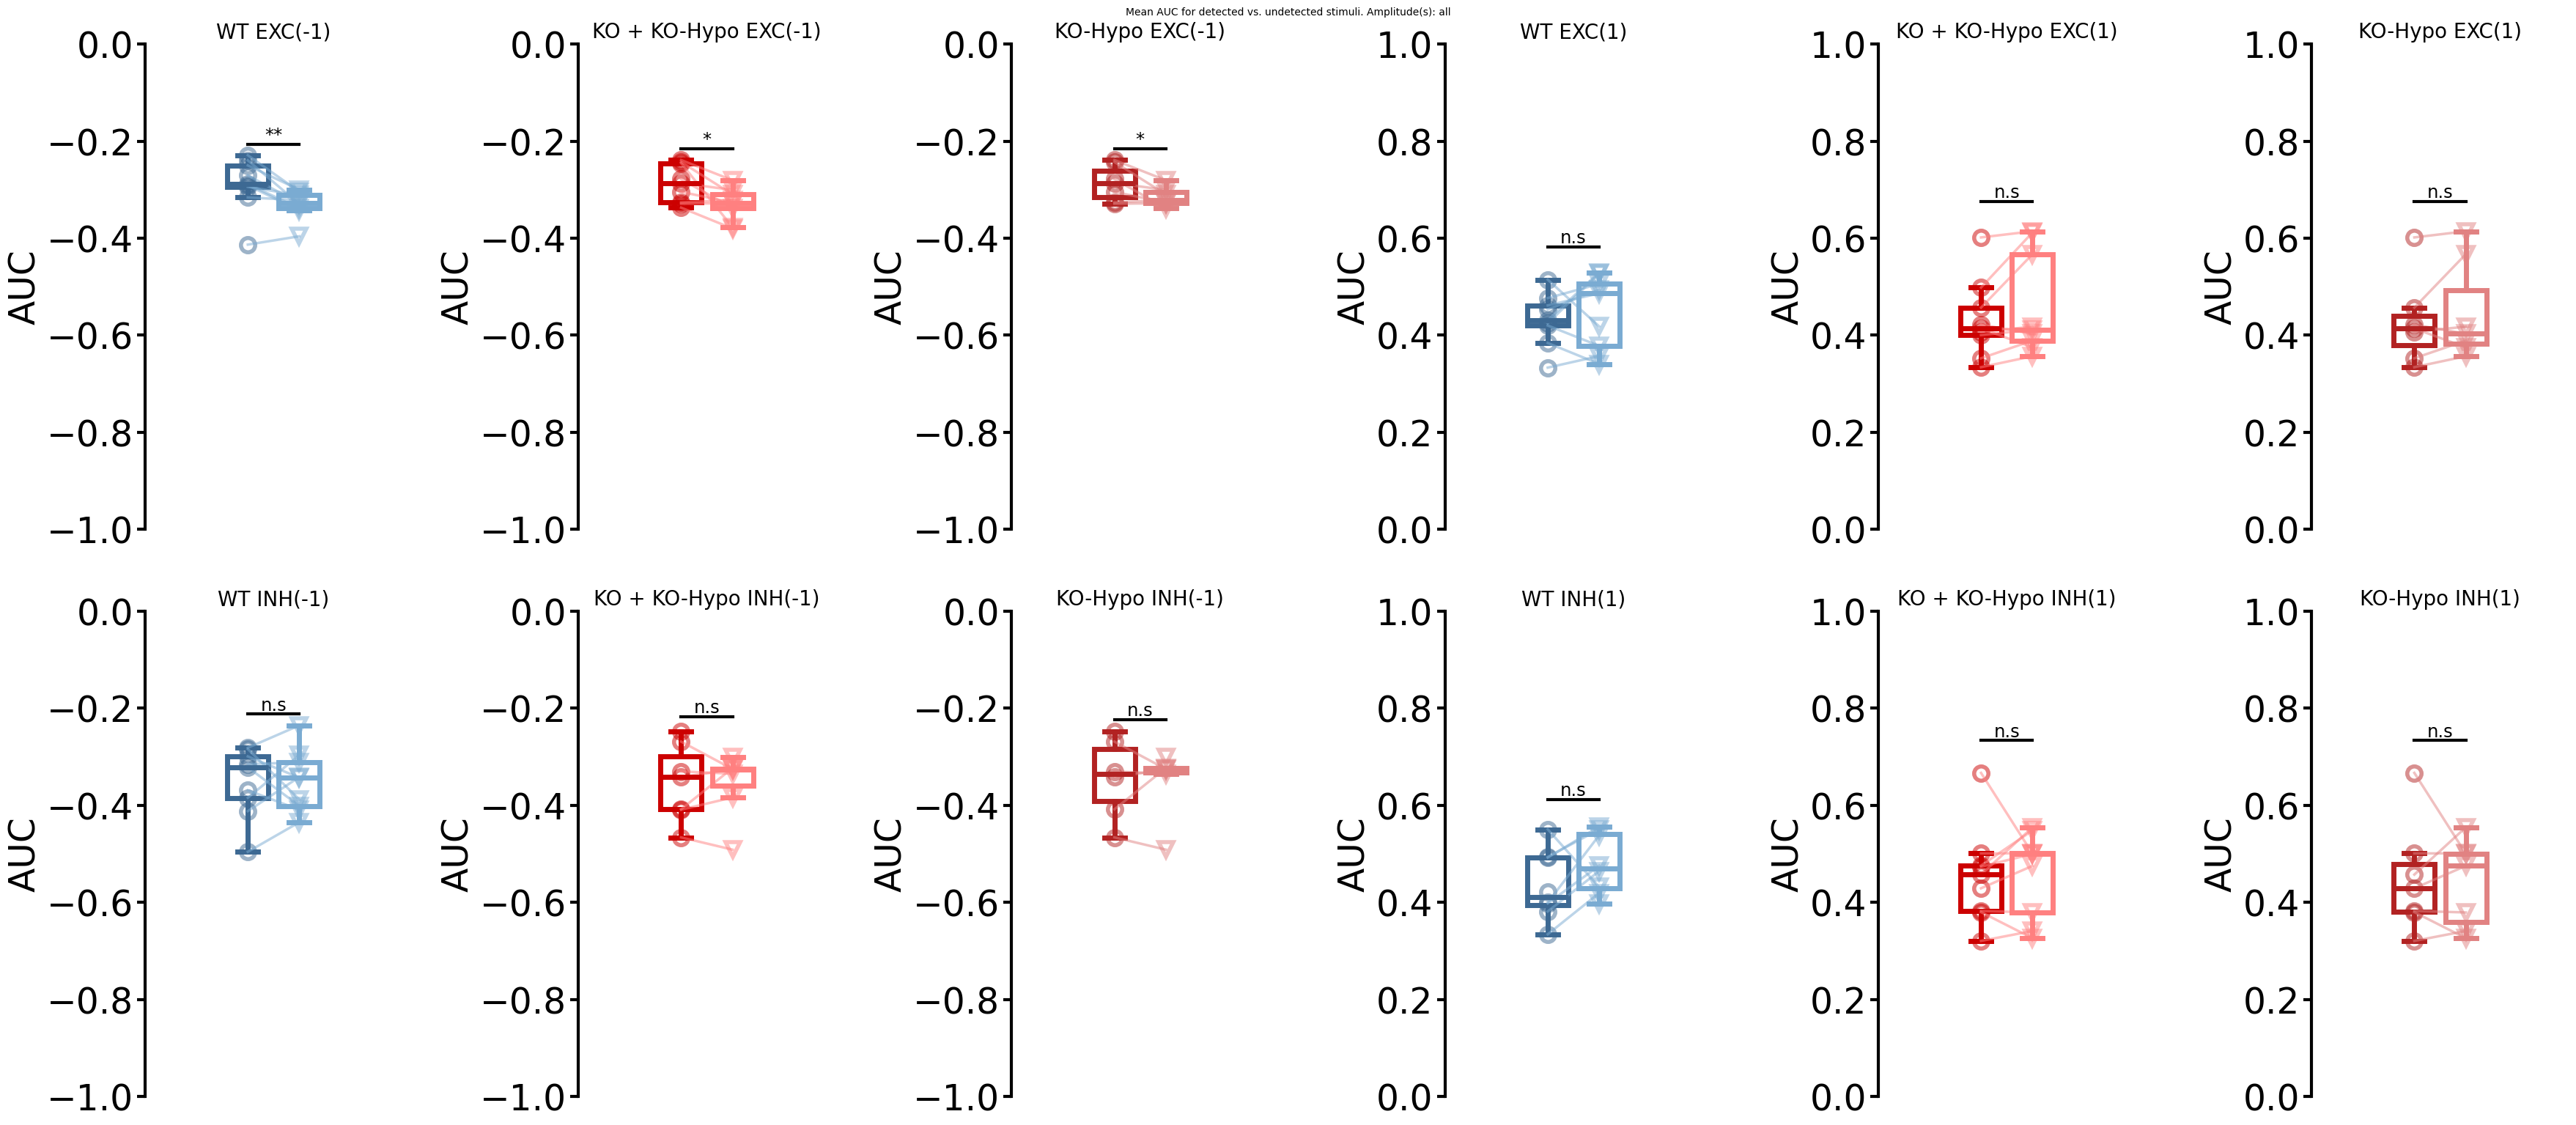

In [21]:
det_comp_param(recs, "AUC", stim_ampl="all", ylim=[0, 1])

### Threshold amplitude

Boxplot plotting.
--- AUC: WT EXC(-1) ---
ShapiroResult(statistic=0.7739882415687834, pvalue=0.01498331559850142)
ShapiroResult(statistic=0.87670101848241, pvalue=0.1750868860786562)
WilcoxonResult(statistic=15.0, pvalue=0.7421875)
Boxplot plotting.
--- AUC: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.9366508353121904, pvalue=0.5471190091479923)
ShapiroResult(statistic=0.9580477242581613, pvalue=0.7776801234643989)
TtestResult(statistic=0.721280063353034, pvalue=0.49127590526502507, df=8)
Boxplot plotting.
--- AUC: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.8424041175056619, pvalue=0.10460740479960745)
ShapiroResult(statistic=0.963281402956873, pvalue=0.8463442103339969)
TtestResult(statistic=1.8323200904623216, pvalue=0.1166126347511334, df=6)
Boxplot plotting.
--- AUC: WT EXC(1) ---
ShapiroResult(statistic=0.9071237653181498, pvalue=0.29625955369678925)
ShapiroResult(statistic=0.8611126797669892, pvalue=0.09859188079323336)
TtestResult(statistic=0.0035299007408685127, pvalu

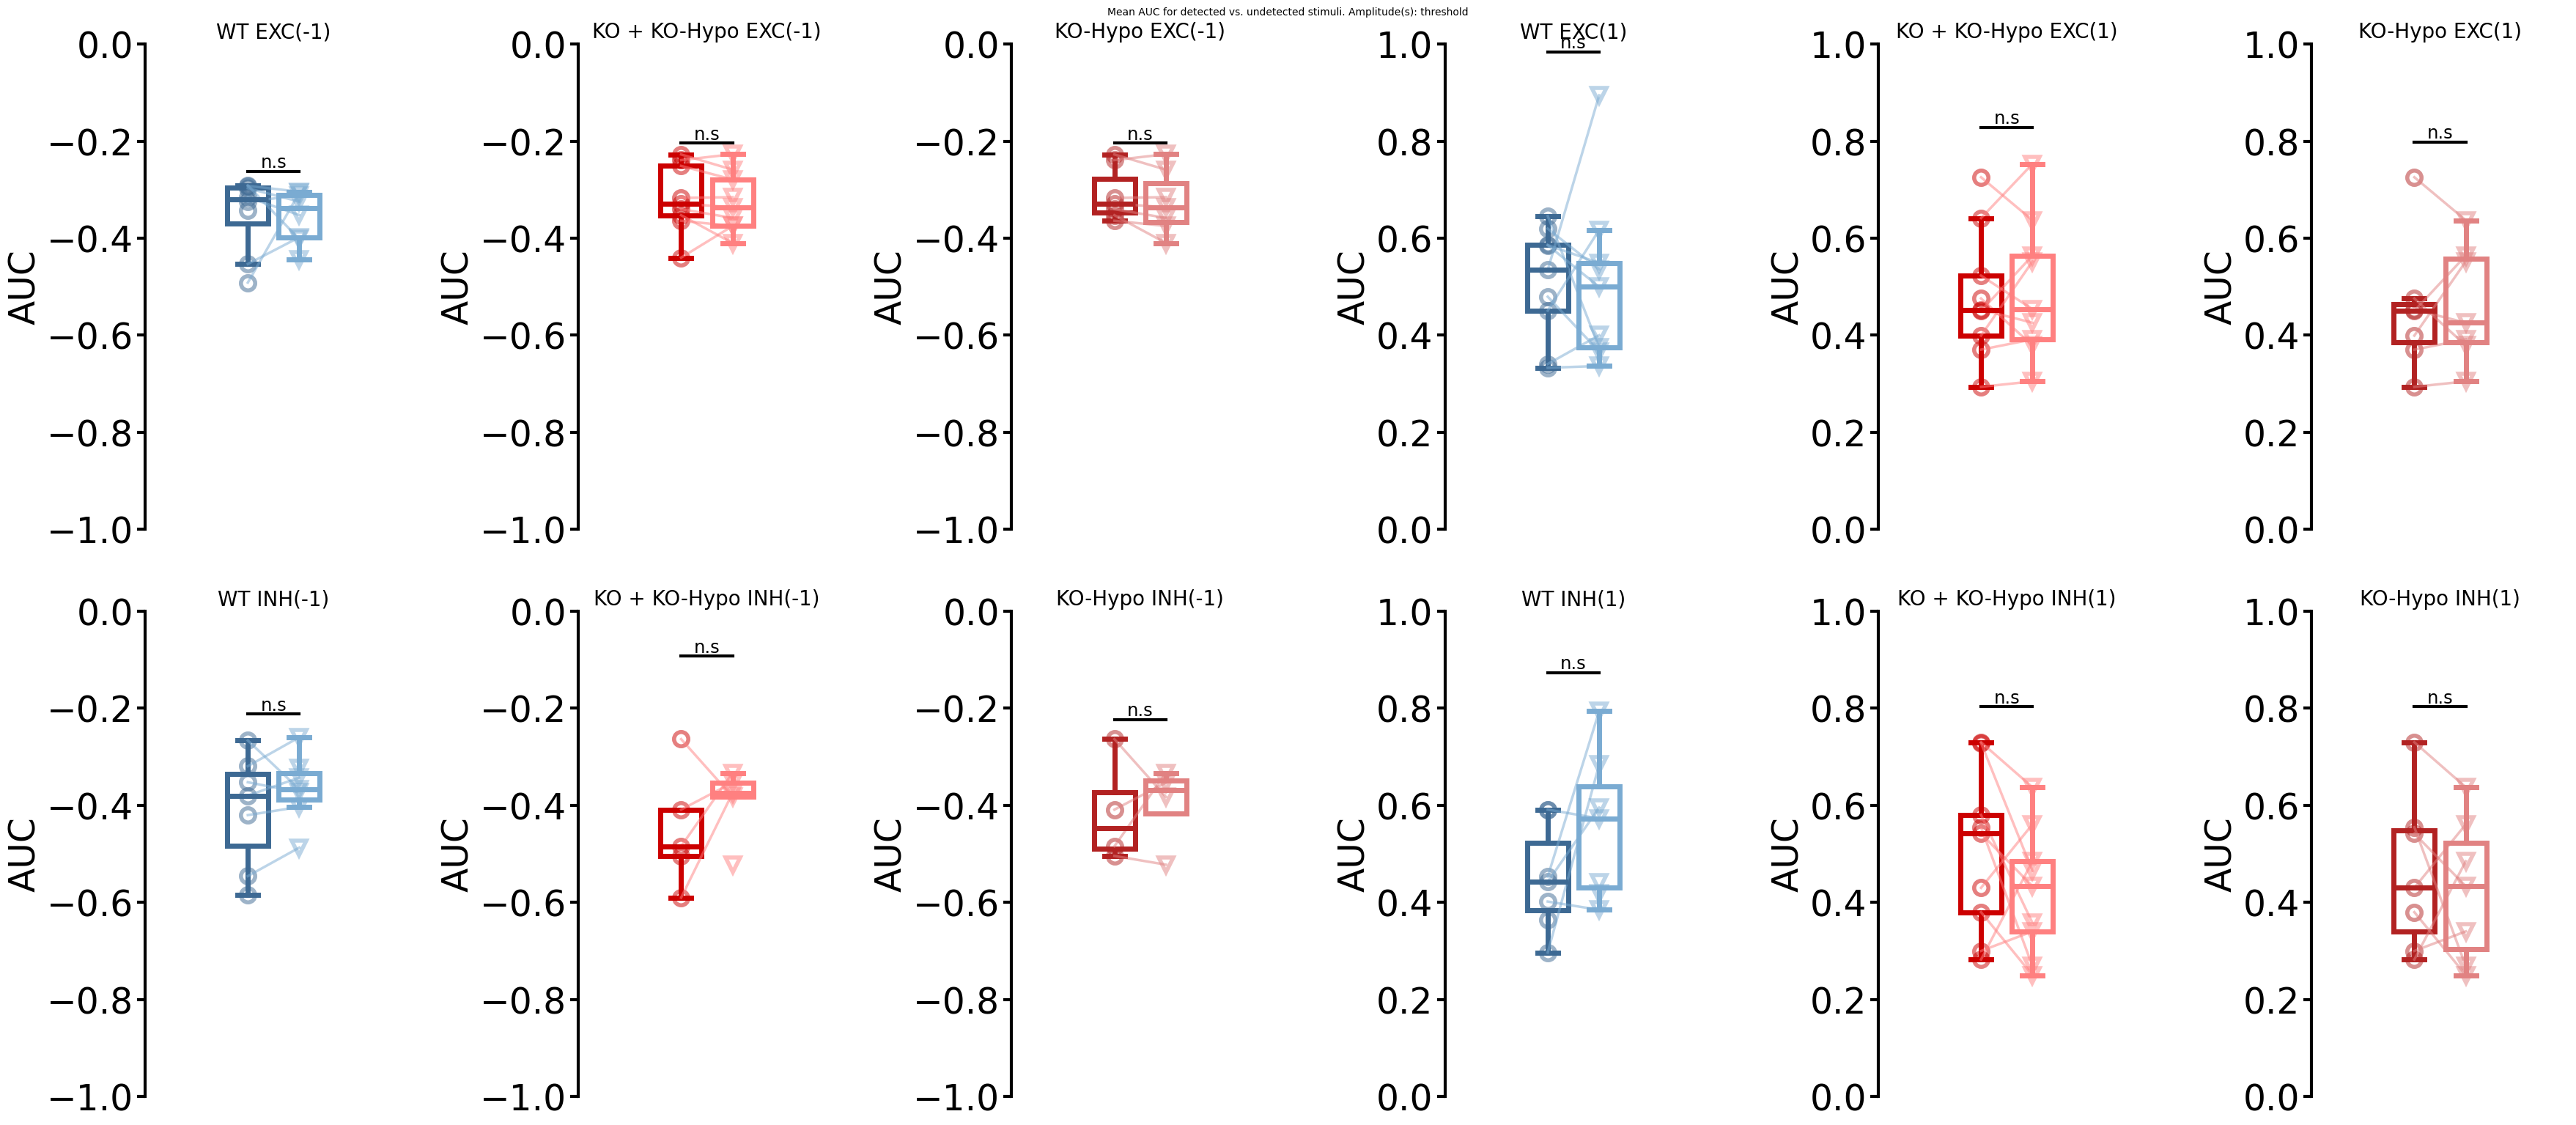

In [22]:
det_comp_param(recs, "AUC", stim_ampl="threshold", ylim=[0, 1])

### Amplitude 12

Boxplot plotting.
Boxplot plotting.
--- AUC: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.917307761061766, pvalue=0.48618503093280974)
ShapiroResult(statistic=0.9067096243362455, pvalue=0.41510573683711505)
TtestResult(statistic=-1.2630795230953704, pvalue=0.2622569901068542, df=5)
Boxplot plotting.
--- AUC: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.917307761061766, pvalue=0.48618503093280974)
ShapiroResult(statistic=0.9067096243362455, pvalue=0.41510573683711505)
TtestResult(statistic=-1.2630795230953704, pvalue=0.2622569901068542, df=5)
Boxplot plotting.
Boxplot plotting.
--- AUC: KO + KO-Hypo EXC(1) ---
ShapiroResult(statistic=0.8341866207527533, pvalue=0.08764843919287667)
ShapiroResult(statistic=0.9411822362318154, pvalue=0.6493907904797256)
TtestResult(statistic=-0.13593915363174694, pvalue=0.8963156128363727, df=6)
Boxplot plotting.
--- AUC: KO-Hypo EXC(1) ---
ShapiroResult(statistic=0.8441844916118892, pvalue=0.14114178996504573)
ShapiroResult(statistic=0.918218133394

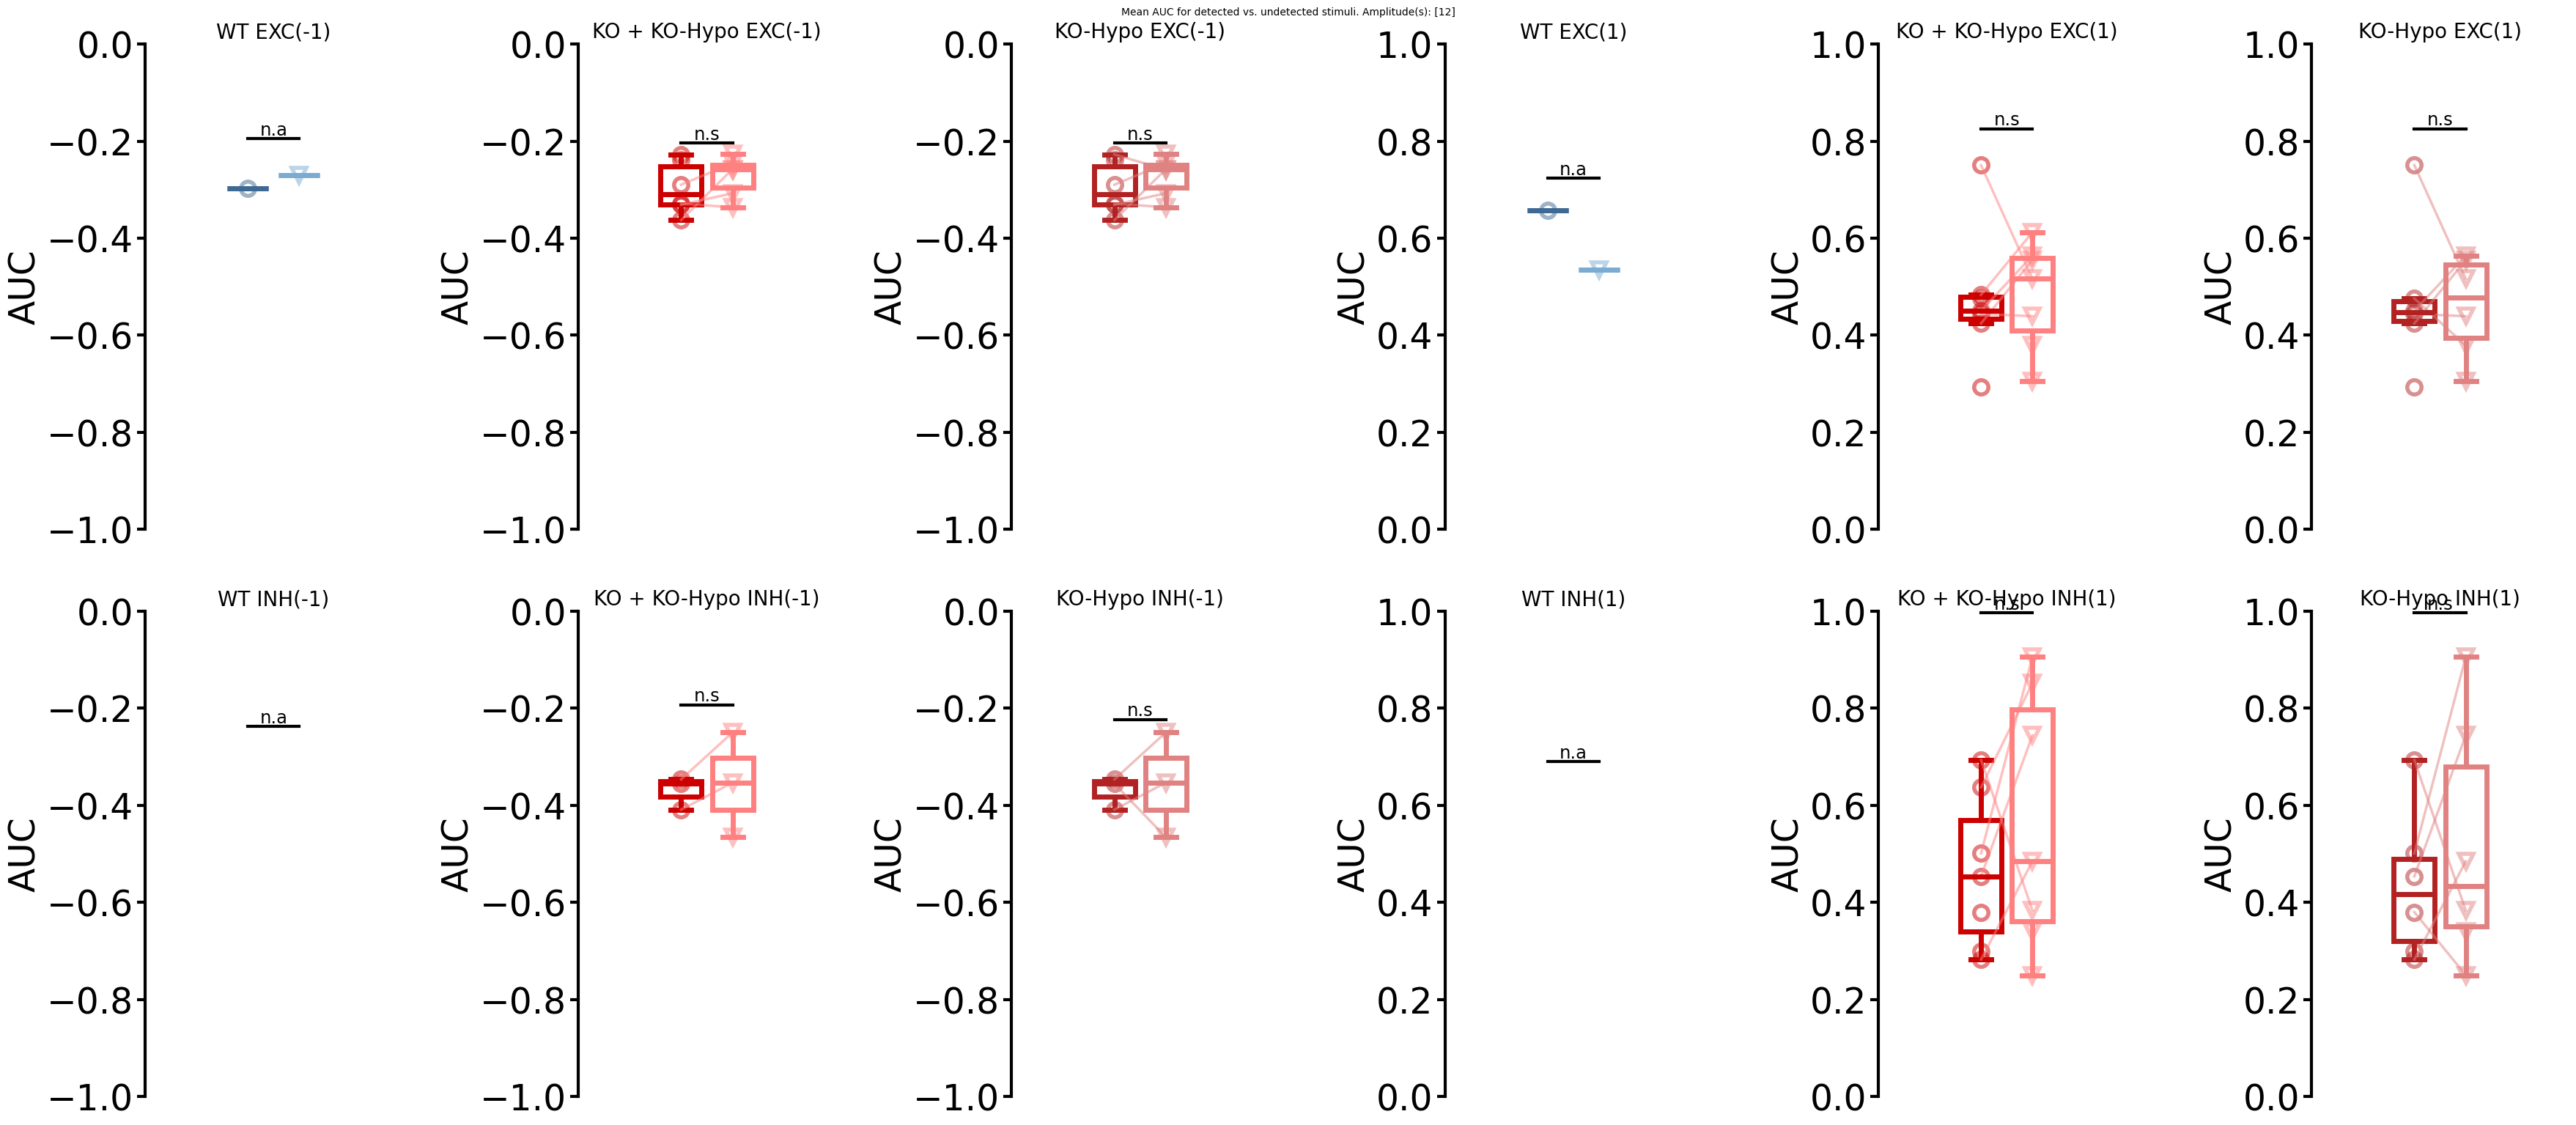

In [23]:
det_comp_param(recs, "AUC", stim_ampl=[12], ylim=[0, 1])

### Subtreshold amplitudes

Boxplot plotting.
--- AUC: WT EXC(-1) ---
ShapiroResult(statistic=0.8781062223708321, pvalue=0.3008172445792437)
ShapiroResult(statistic=0.9325951715494674, pvalue=0.6141716624890033)
TtestResult(statistic=2.0226548578744437, pvalue=0.11315501563633028, df=4)
Boxplot plotting.
--- AUC: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.6916531777972368, pvalue=0.001811754862101427)
ShapiroResult(statistic=0.9413213906482114, pvalue=0.6241270605084036)
WilcoxonResult(statistic=0.0, pvalue=0.0078125)
Boxplot plotting.
--- AUC: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.6172166111400705, pvalue=0.00043263015040386095)
ShapiroResult(statistic=0.9392213715251768, pvalue=0.631717033493258)
WilcoxonResult(statistic=0.0, pvalue=0.015625)
Boxplot plotting.
--- AUC: WT EXC(1) ---
ShapiroResult(statistic=0.9524765333728946, pvalue=0.7548642831006365)
ShapiroResult(statistic=0.8544107275341389, pvalue=0.2088670704485619)
TtestResult(statistic=0.39271754603867903, pvalue=0.7145576064936674, df=4

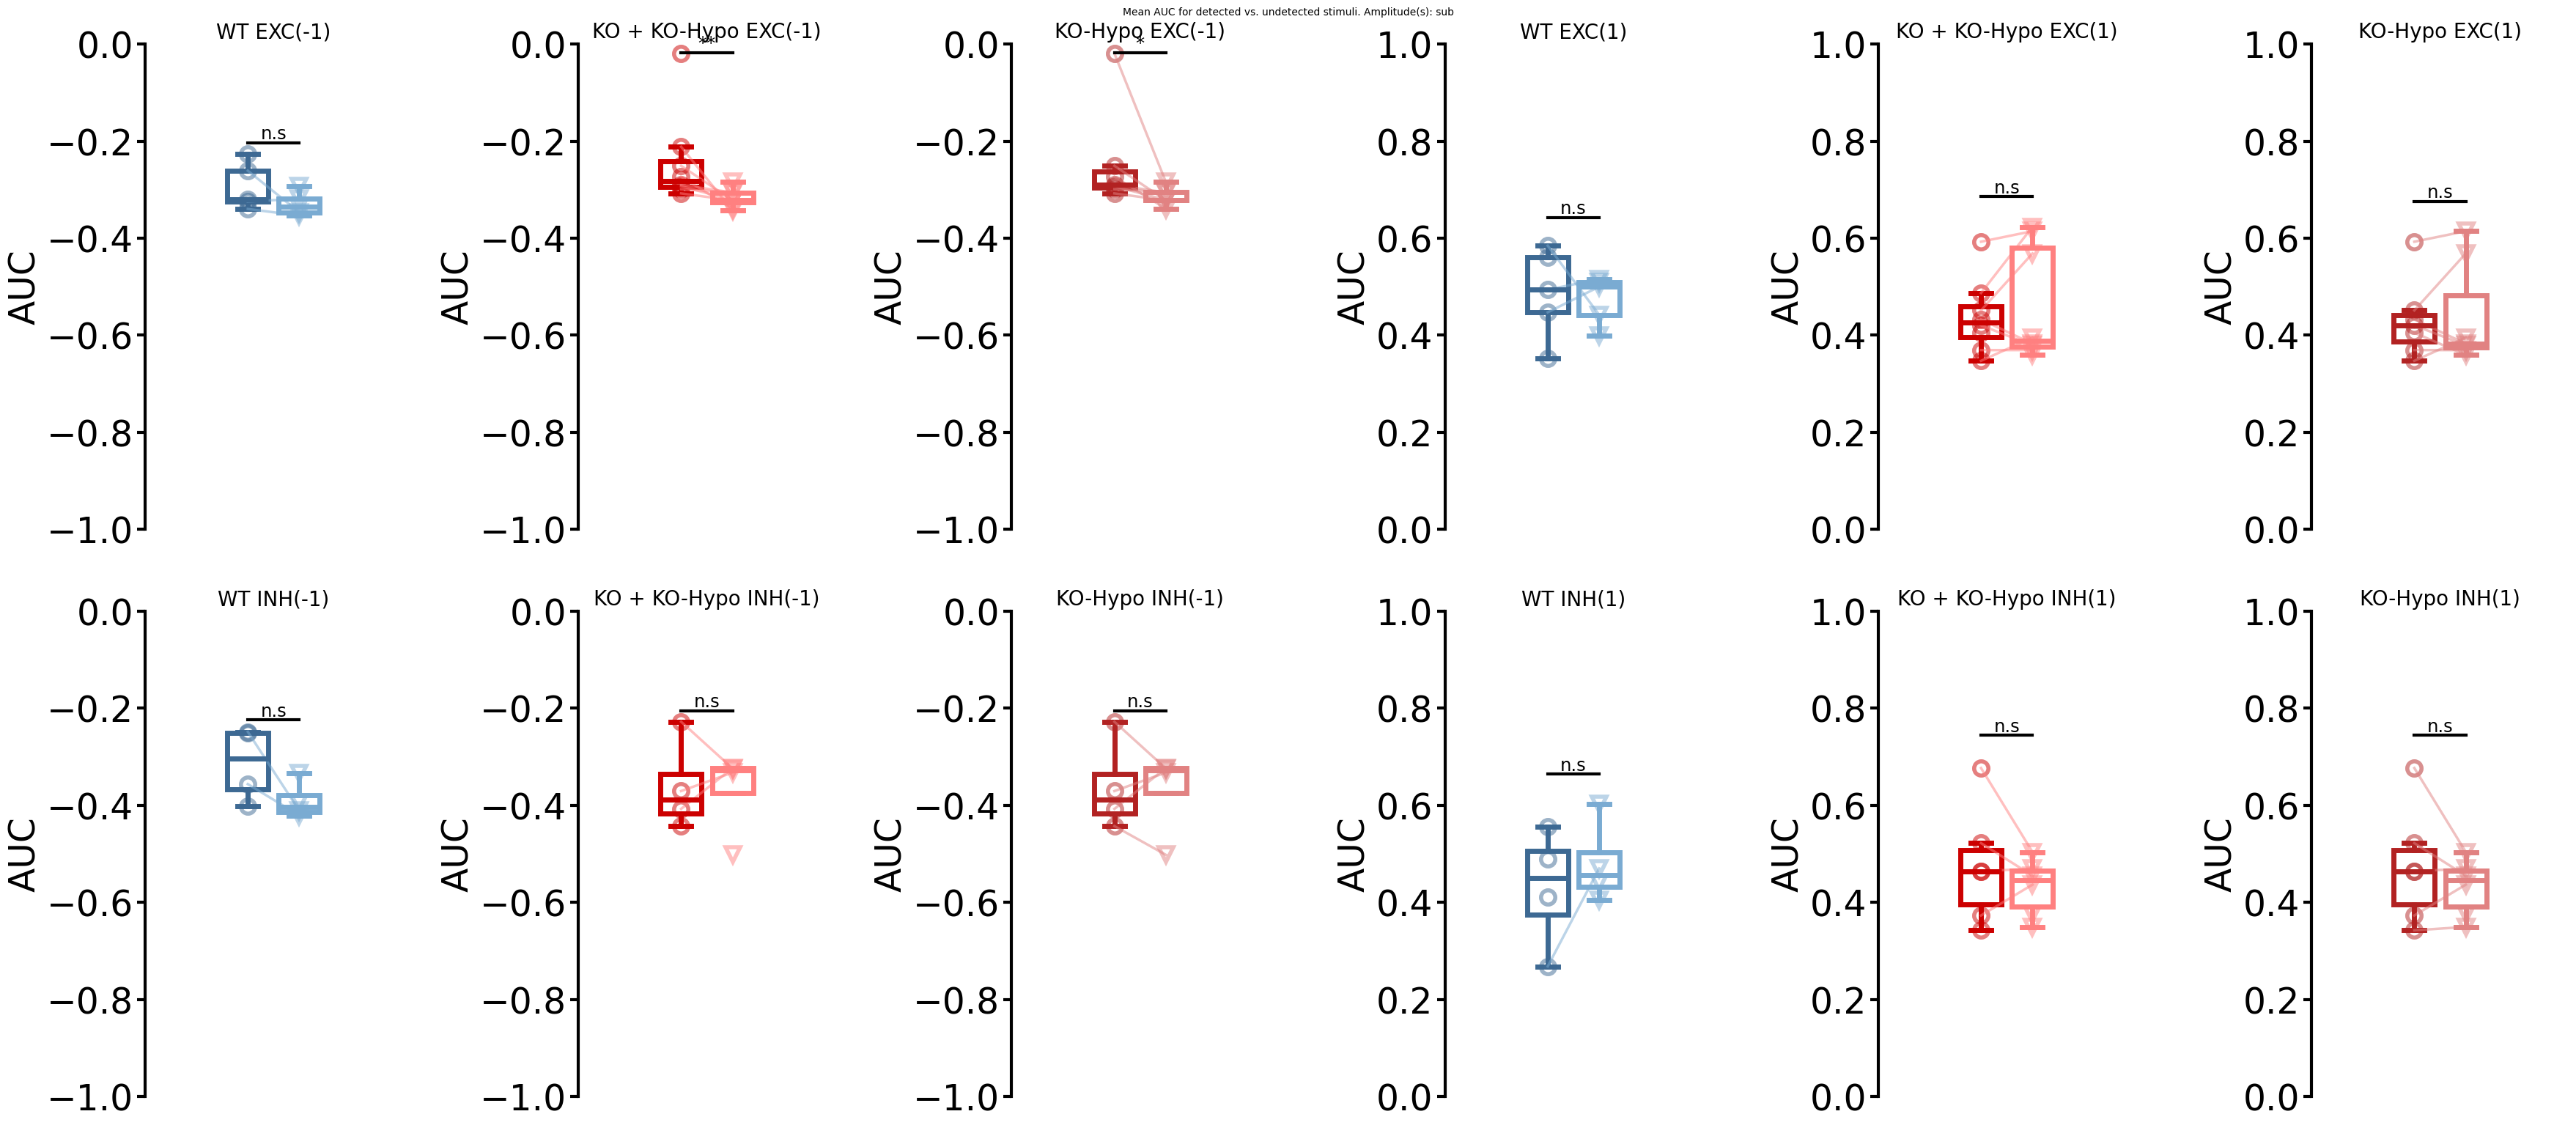

In [24]:
det_comp_param(recs, "AUC", stim_ampl="sub", ylim=[0, 1])

### Suprathreshold amplitudes

Boxplot plotting.
--- AUC: WT EXC(-1) ---
ShapiroResult(statistic=0.8691059250150581, pvalue=0.12026896822032174)
ShapiroResult(statistic=0.8107548938677597, pvalue=0.02707483443226528)
WilcoxonResult(statistic=0.0, pvalue=0.00390625)
Boxplot plotting.
--- AUC: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.8964158444772407, pvalue=0.23195125338749267)
ShapiroResult(statistic=0.89013983302935, pvalue=0.200189093962648)
TtestResult(statistic=2.5233424628109016, pvalue=0.03562285146178994, df=8)
Boxplot plotting.
--- AUC: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.92402919772535, pvalue=0.5013386962996291)
ShapiroResult(statistic=0.9369180436837405, pvalue=0.6111365940643241)
TtestResult(statistic=1.8829827173486415, pvalue=0.10870456833224075, df=6)
Boxplot plotting.
--- AUC: WT EXC(1) ---
ShapiroResult(statistic=0.9766728402990162, pvalue=0.945017269935447)
ShapiroResult(statistic=0.8350147034435664, pvalue=0.050816865190915016)
TtestResult(statistic=-0.9577883052710001, pvalue=

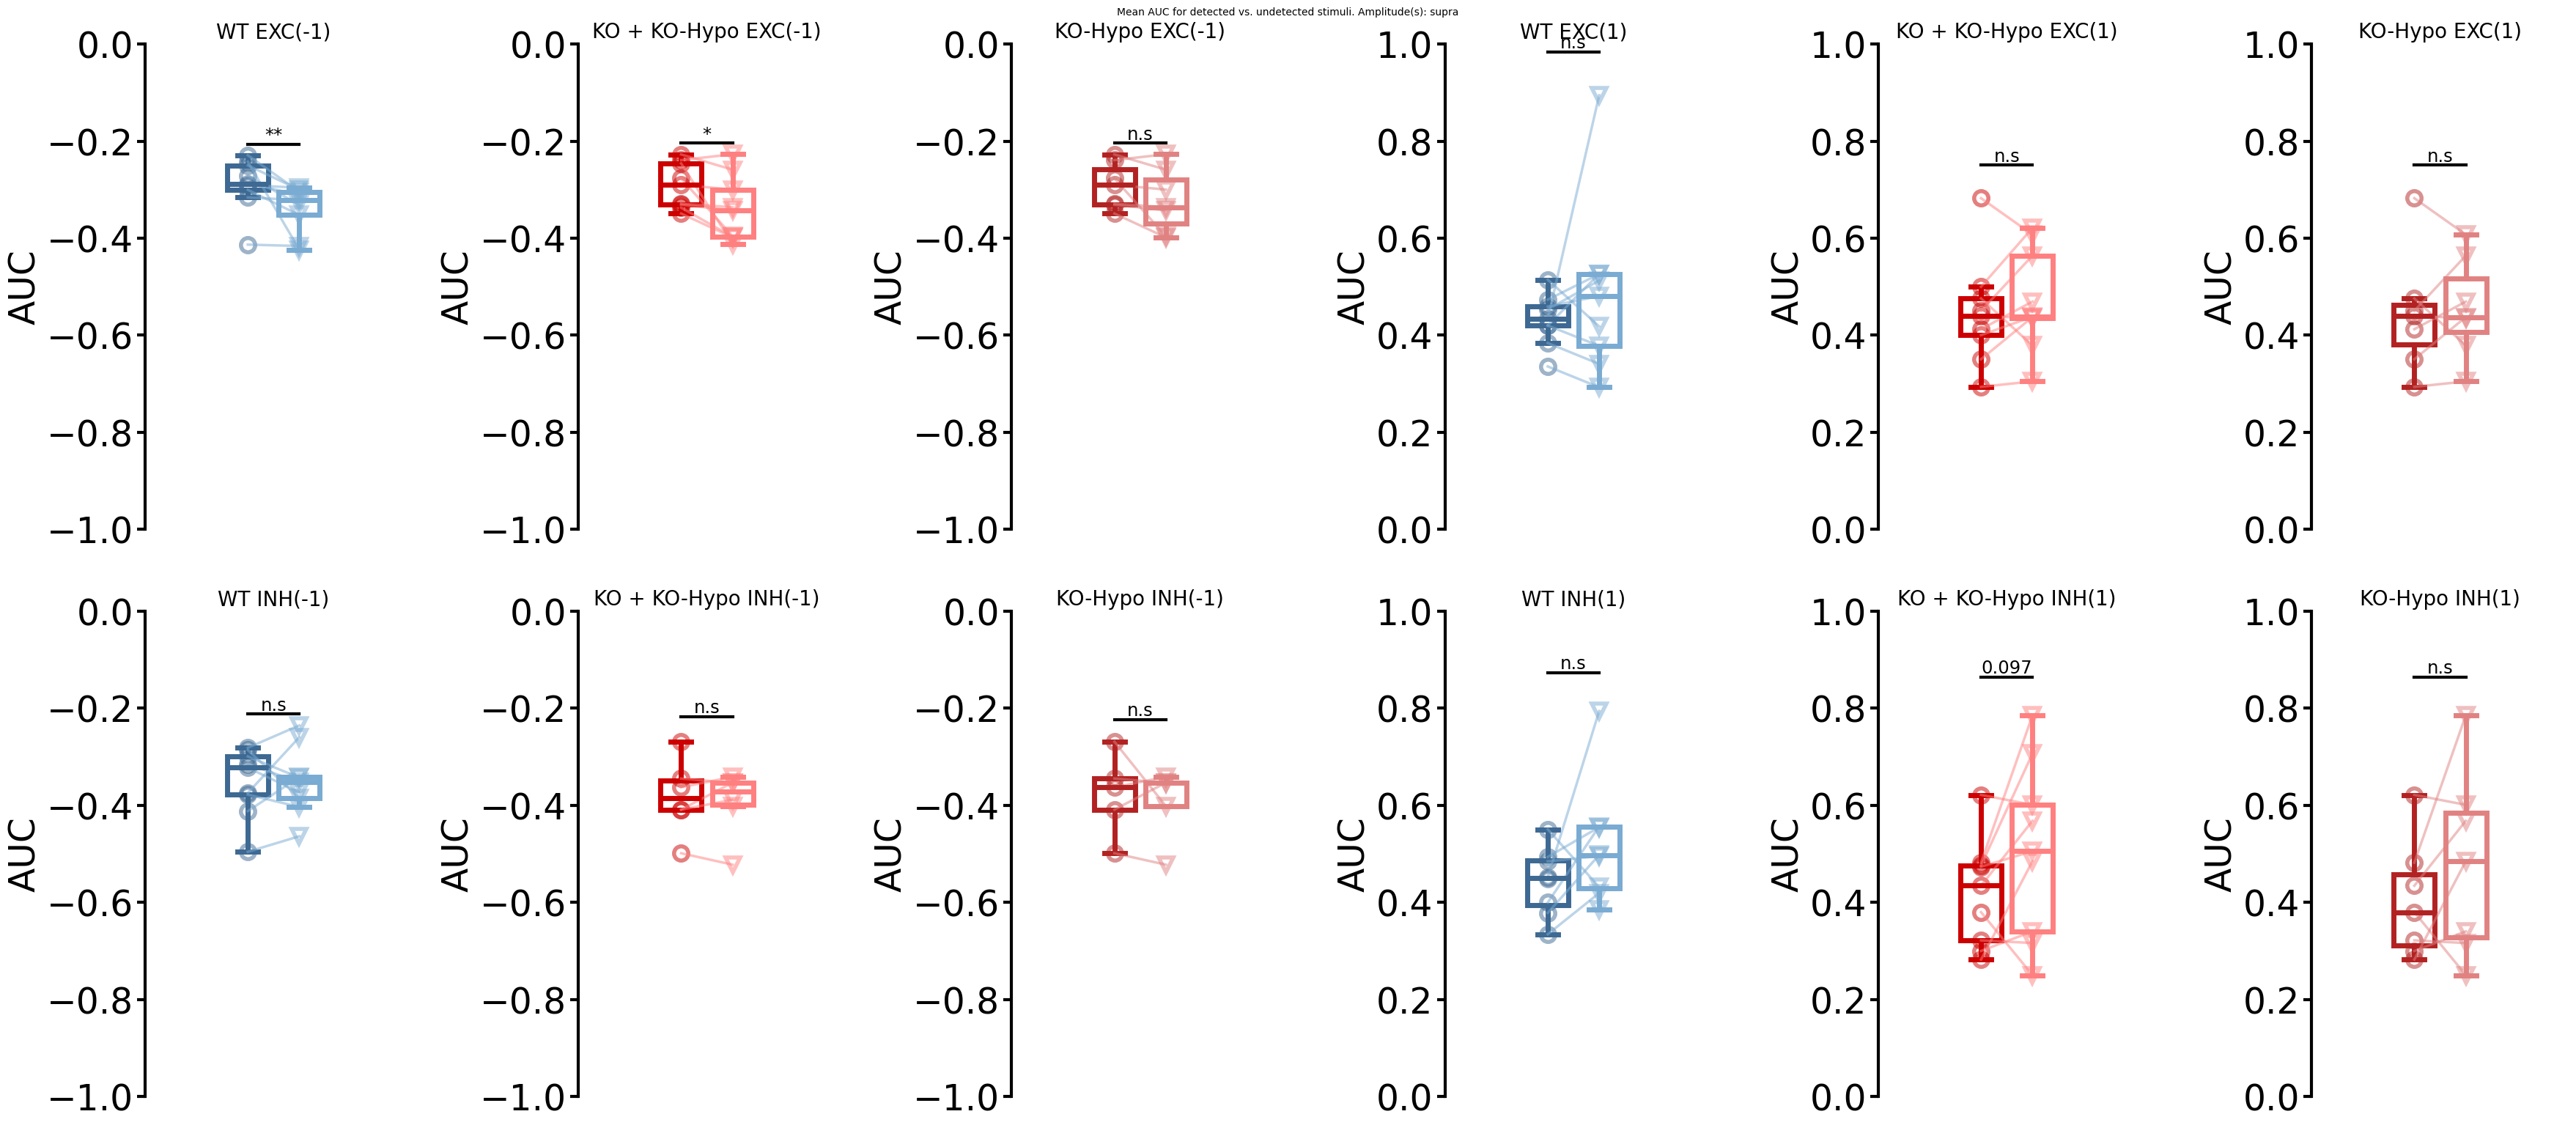

In [25]:
det_comp_param(recs, "AUC", stim_ampl="supra", ylim=[0, 1])

## Peak delay

### All amplitudes

Boxplot plotting.
--- Peak_delay: WT EXC(-1) ---
ShapiroResult(statistic=0.960771189682959, pvalue=0.8063577719077049)
ShapiroResult(statistic=0.9409340889686972, pvalue=0.5917652047045923)
TtestResult(statistic=-3.3442188856143176, pvalue=0.010167223066657936, df=8)
Boxplot plotting.
--- Peak_delay: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.8541060312182879, pvalue=0.08267761876370135)
ShapiroResult(statistic=0.9202071886445723, pvalue=0.39395785756608553)
TtestResult(statistic=-2.806985365533559, pvalue=0.02294942054696936, df=8)
Boxplot plotting.
--- Peak_delay: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.9238262675360254, pvalue=0.4996995987127862)
ShapiroResult(statistic=0.939011232918269, pvalue=0.6298307537052139)
TtestResult(statistic=-1.8904733809025662, pvalue=0.1075814763019683, df=6)
Boxplot plotting.
--- Peak_delay: WT EXC(1) ---
ShapiroResult(statistic=0.8339806739668502, pvalue=0.04948236132544298)
ShapiroResult(statistic=0.8956474388849407, pvalue=0.227838489

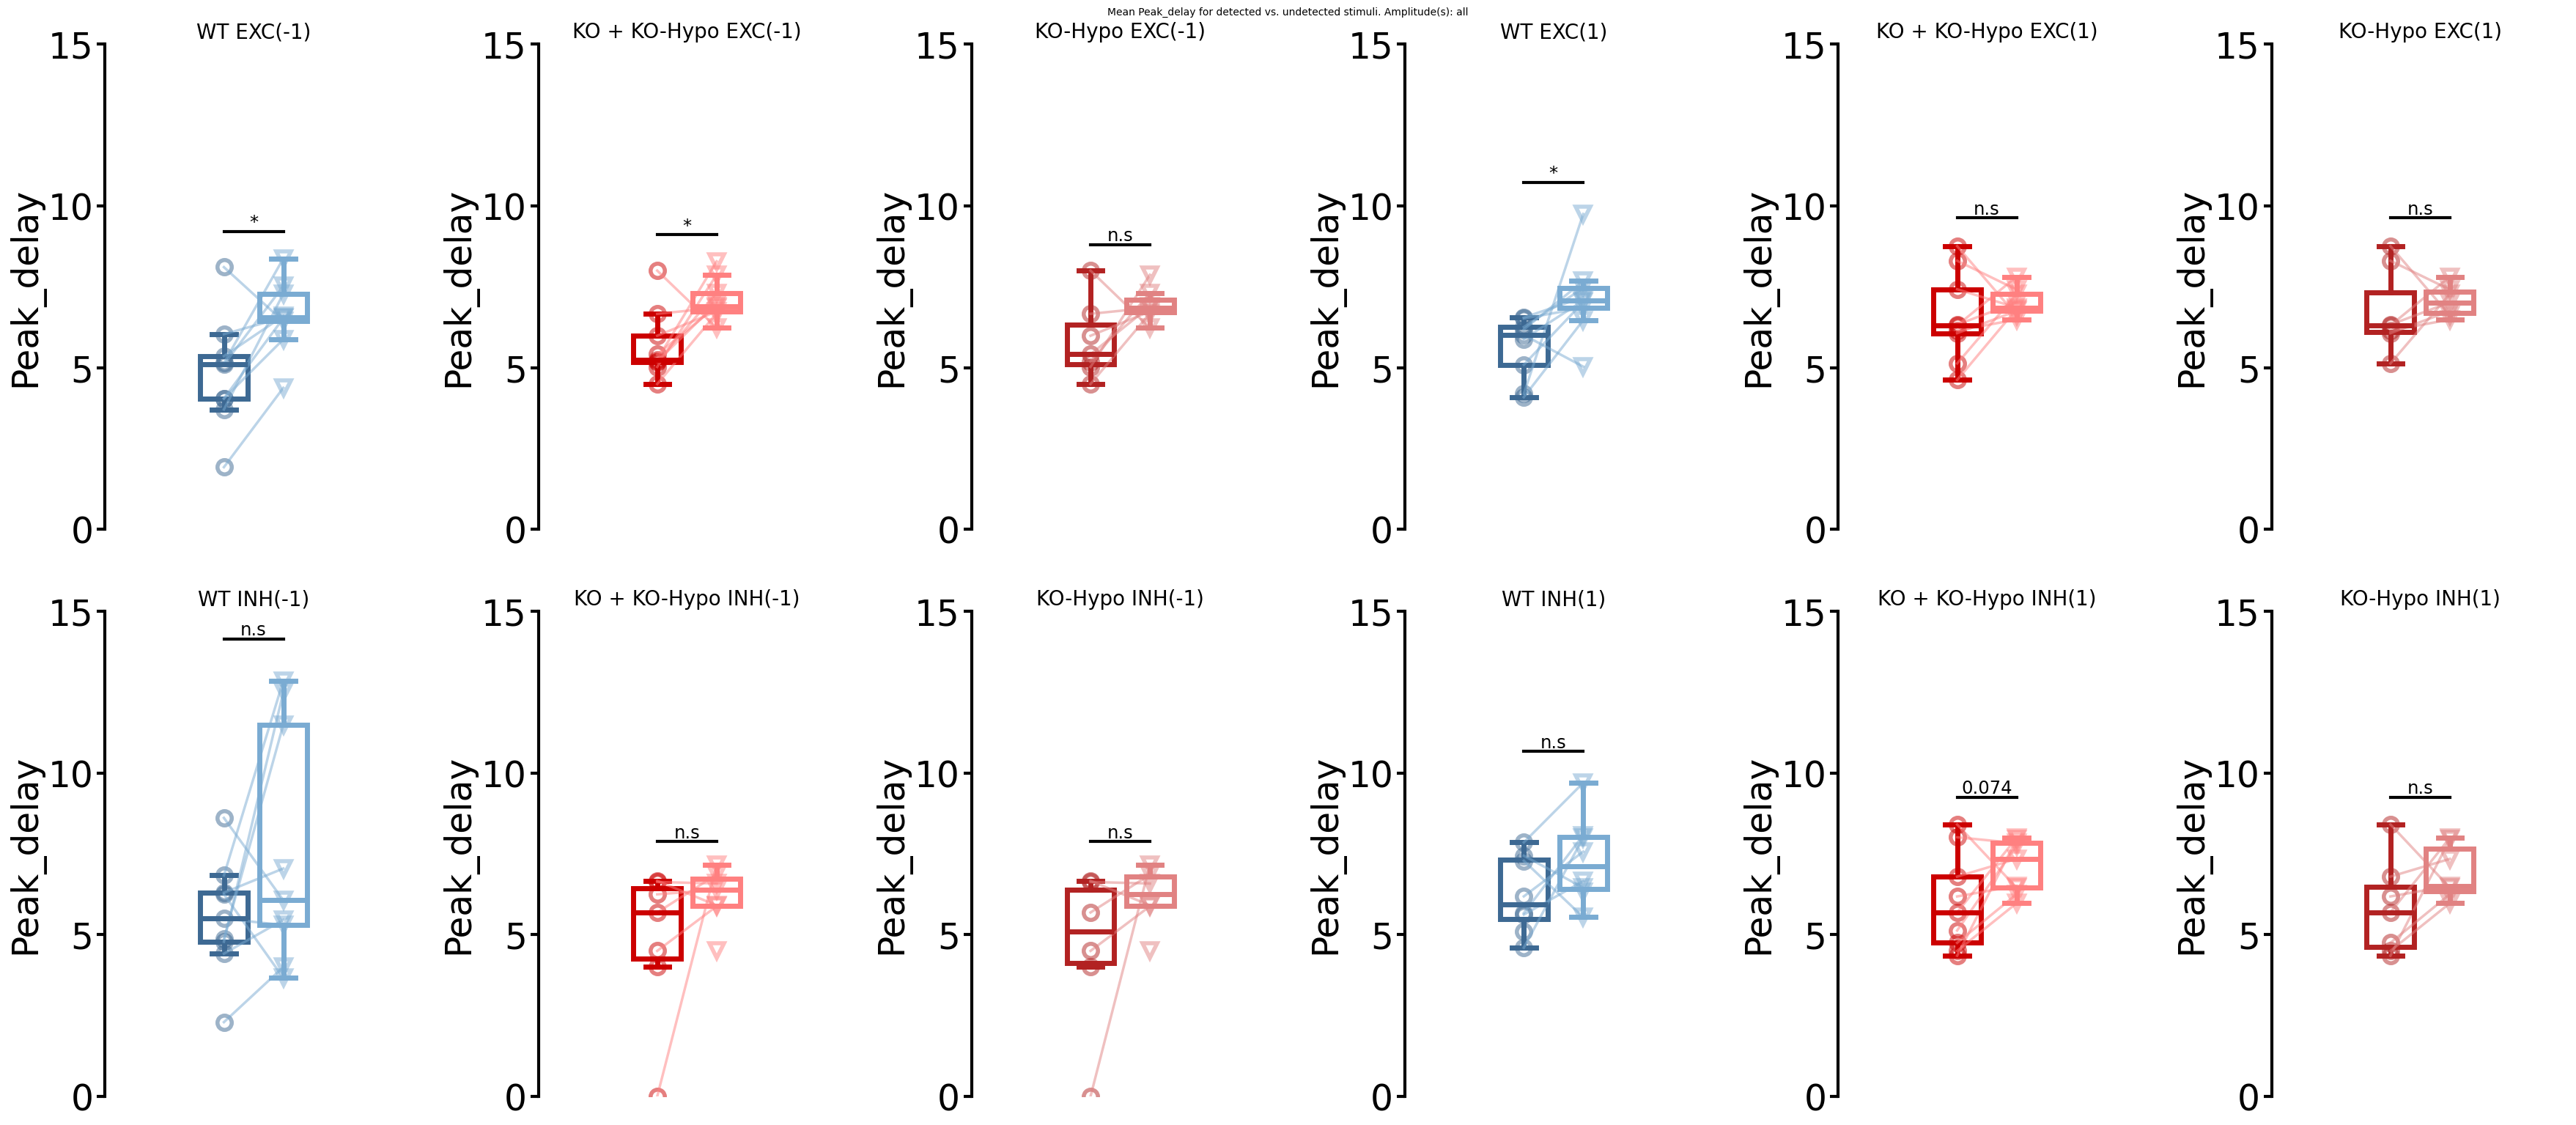

In [26]:
det_comp_param(recs, "Peak_delay", stim_ampl="all", ylim=[0, 15])

### Threshold amplitude

Boxplot plotting.
--- Peak_delay: WT EXC(-1) ---
ShapiroResult(statistic=0.9589191616634983, pvalue=0.7997428884603399)
ShapiroResult(statistic=0.9280322839799738, pvalue=0.4983411504744073)
TtestResult(statistic=-1.0401931420380461, pvalue=0.3328387583701367, df=7)
Boxplot plotting.
--- Peak_delay: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.8811479190276335, pvalue=0.16144238246119264)
ShapiroResult(statistic=0.8457361239638066, pvalue=0.06686790771227244)
TtestResult(statistic=-1.2332502791864017, pvalue=0.2524874869155558, df=8)
Boxplot plotting.
--- Peak_delay: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.939214990770382, pvalue=0.6316597337689394)
ShapiroResult(statistic=0.8870316147052415, pvalue=0.25953455396382974)
TtestResult(statistic=-0.5512296924848041, pvalue=0.6013843129838193, df=6)
Boxplot plotting.
--- Peak_delay: WT EXC(1) ---
ShapiroResult(statistic=0.9432324711717902, pvalue=0.6163075644455649)
ShapiroResult(statistic=0.9384923382150441, pvalue=0.5661208530

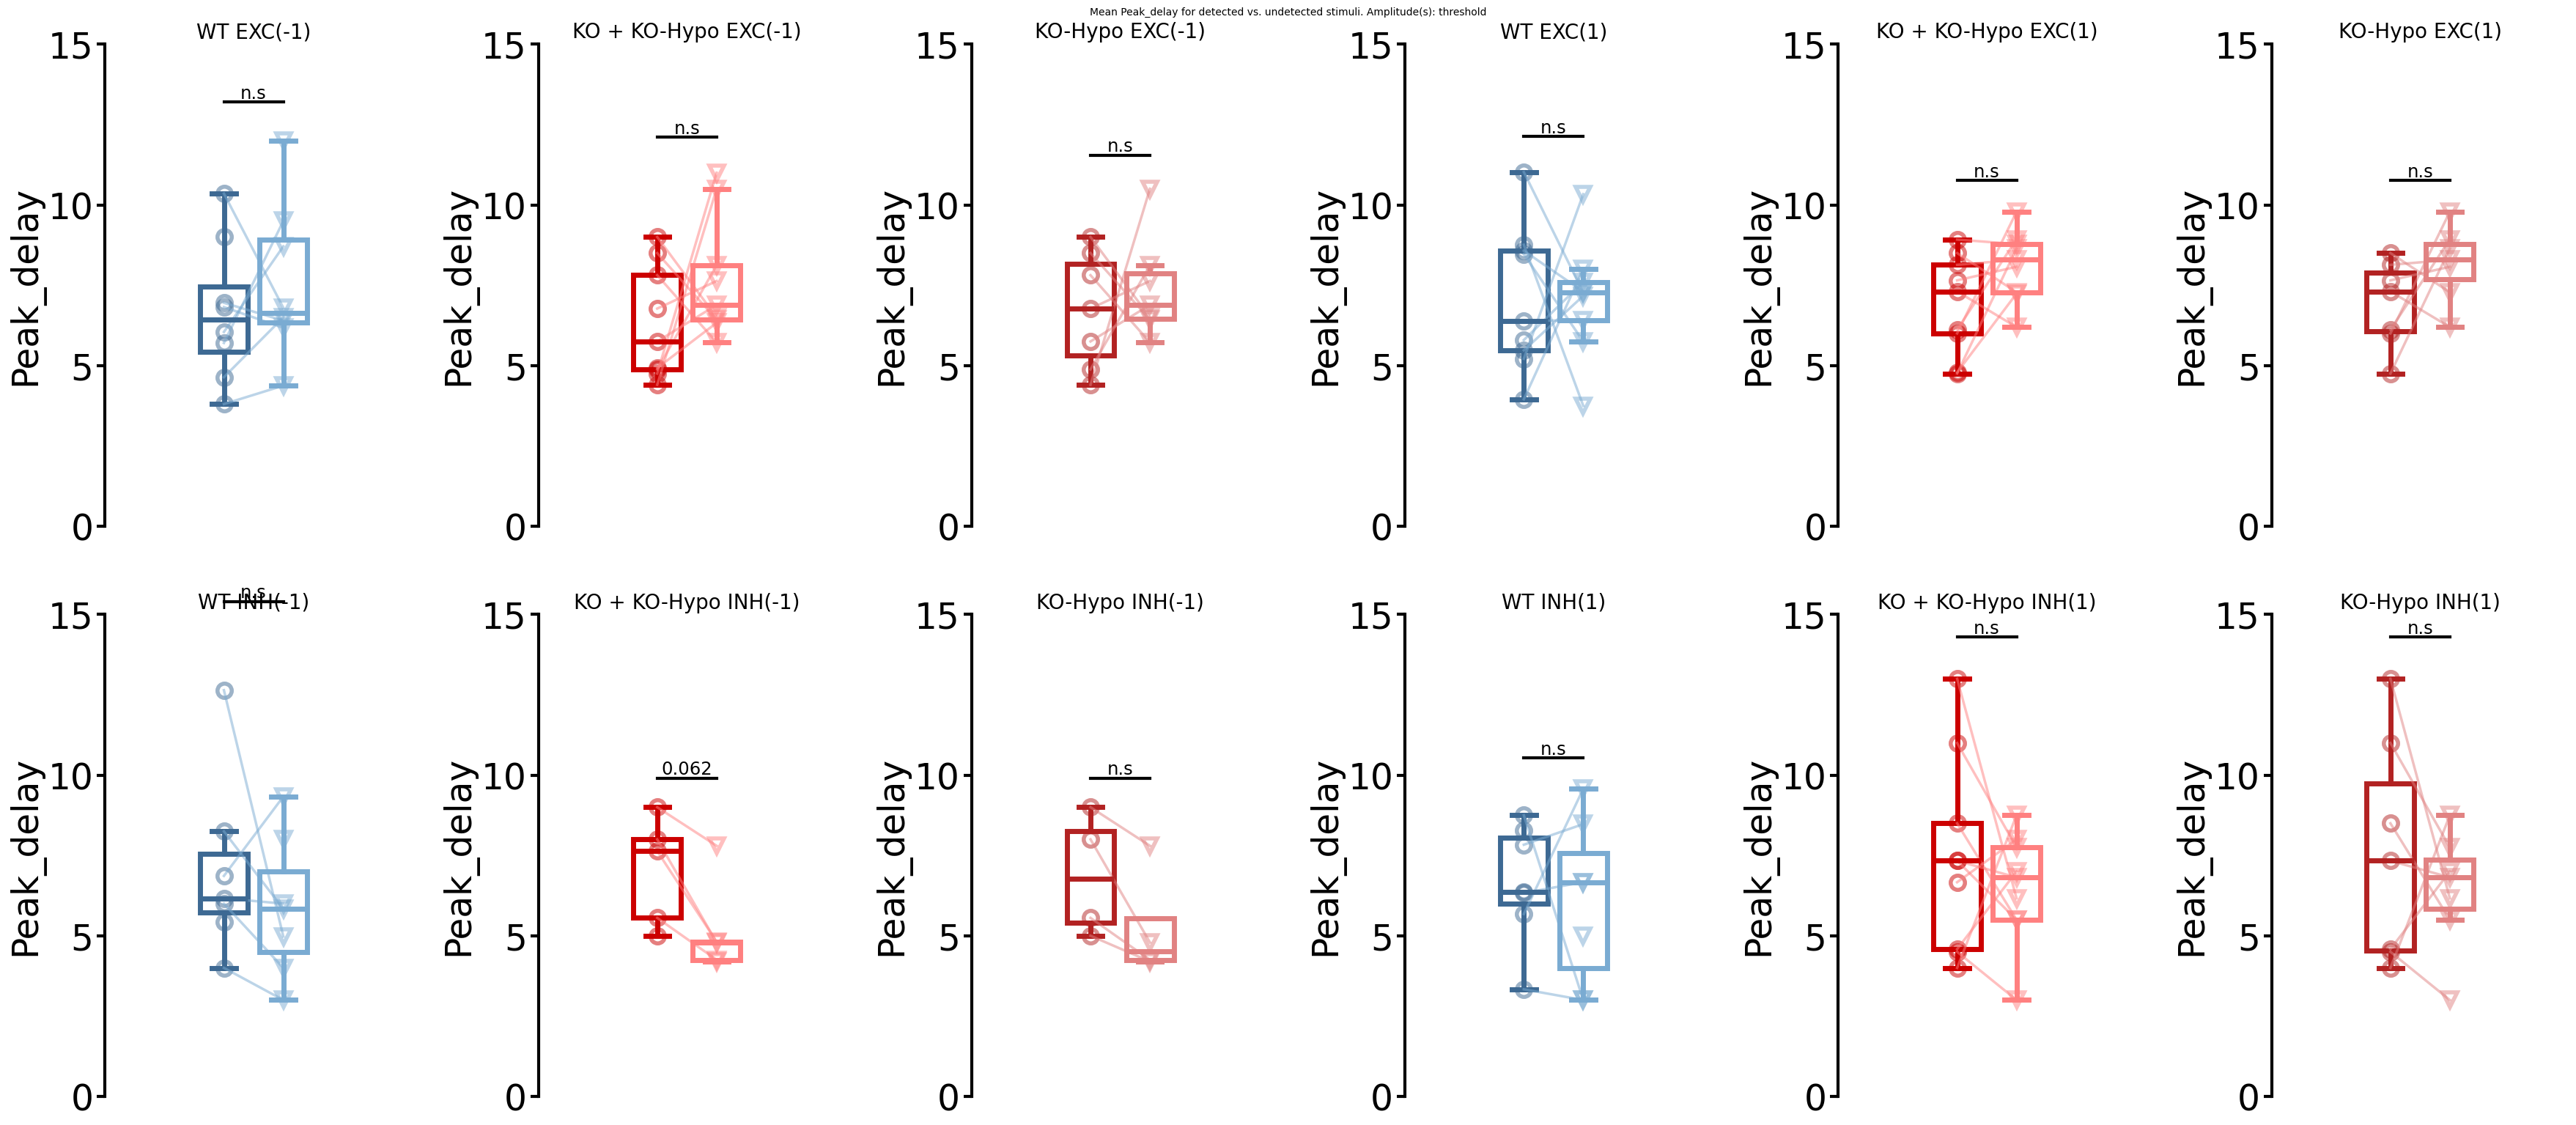

In [27]:
det_comp_param(recs, "Peak_delay", stim_ampl="threshold", ylim=[0, 15])

### Amplitude 12

Boxplot plotting.
Boxplot plotting.
--- Peak_delay: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.8471155292539625, pvalue=0.14914629987322015)
ShapiroResult(statistic=0.9651459180163126, pvalue=0.8583840184950117)
TtestResult(statistic=-1.435208118087965, pvalue=0.2107018732400453, df=5)
Boxplot plotting.
--- Peak_delay: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.8471155292539625, pvalue=0.14914629987322015)
ShapiroResult(statistic=0.9651459180163126, pvalue=0.8583840184950117)
TtestResult(statistic=-1.435208118087965, pvalue=0.2107018732400453, df=5)
Boxplot plotting.
Boxplot plotting.
--- Peak_delay: KO + KO-Hypo EXC(1) ---
ShapiroResult(statistic=0.960780954603073, pvalue=0.8254062853142656)
ShapiroResult(statistic=0.7380629675142552, pvalue=0.009505315411404026)
WilcoxonResult(statistic=7.0, pvalue=0.296875)
Boxplot plotting.
--- Peak_delay: KO-Hypo EXC(1) ---
ShapiroResult(statistic=0.9647953976452511, pvalue=0.8558249631165686)
ShapiroResult(statistic=0.6267904736438845,

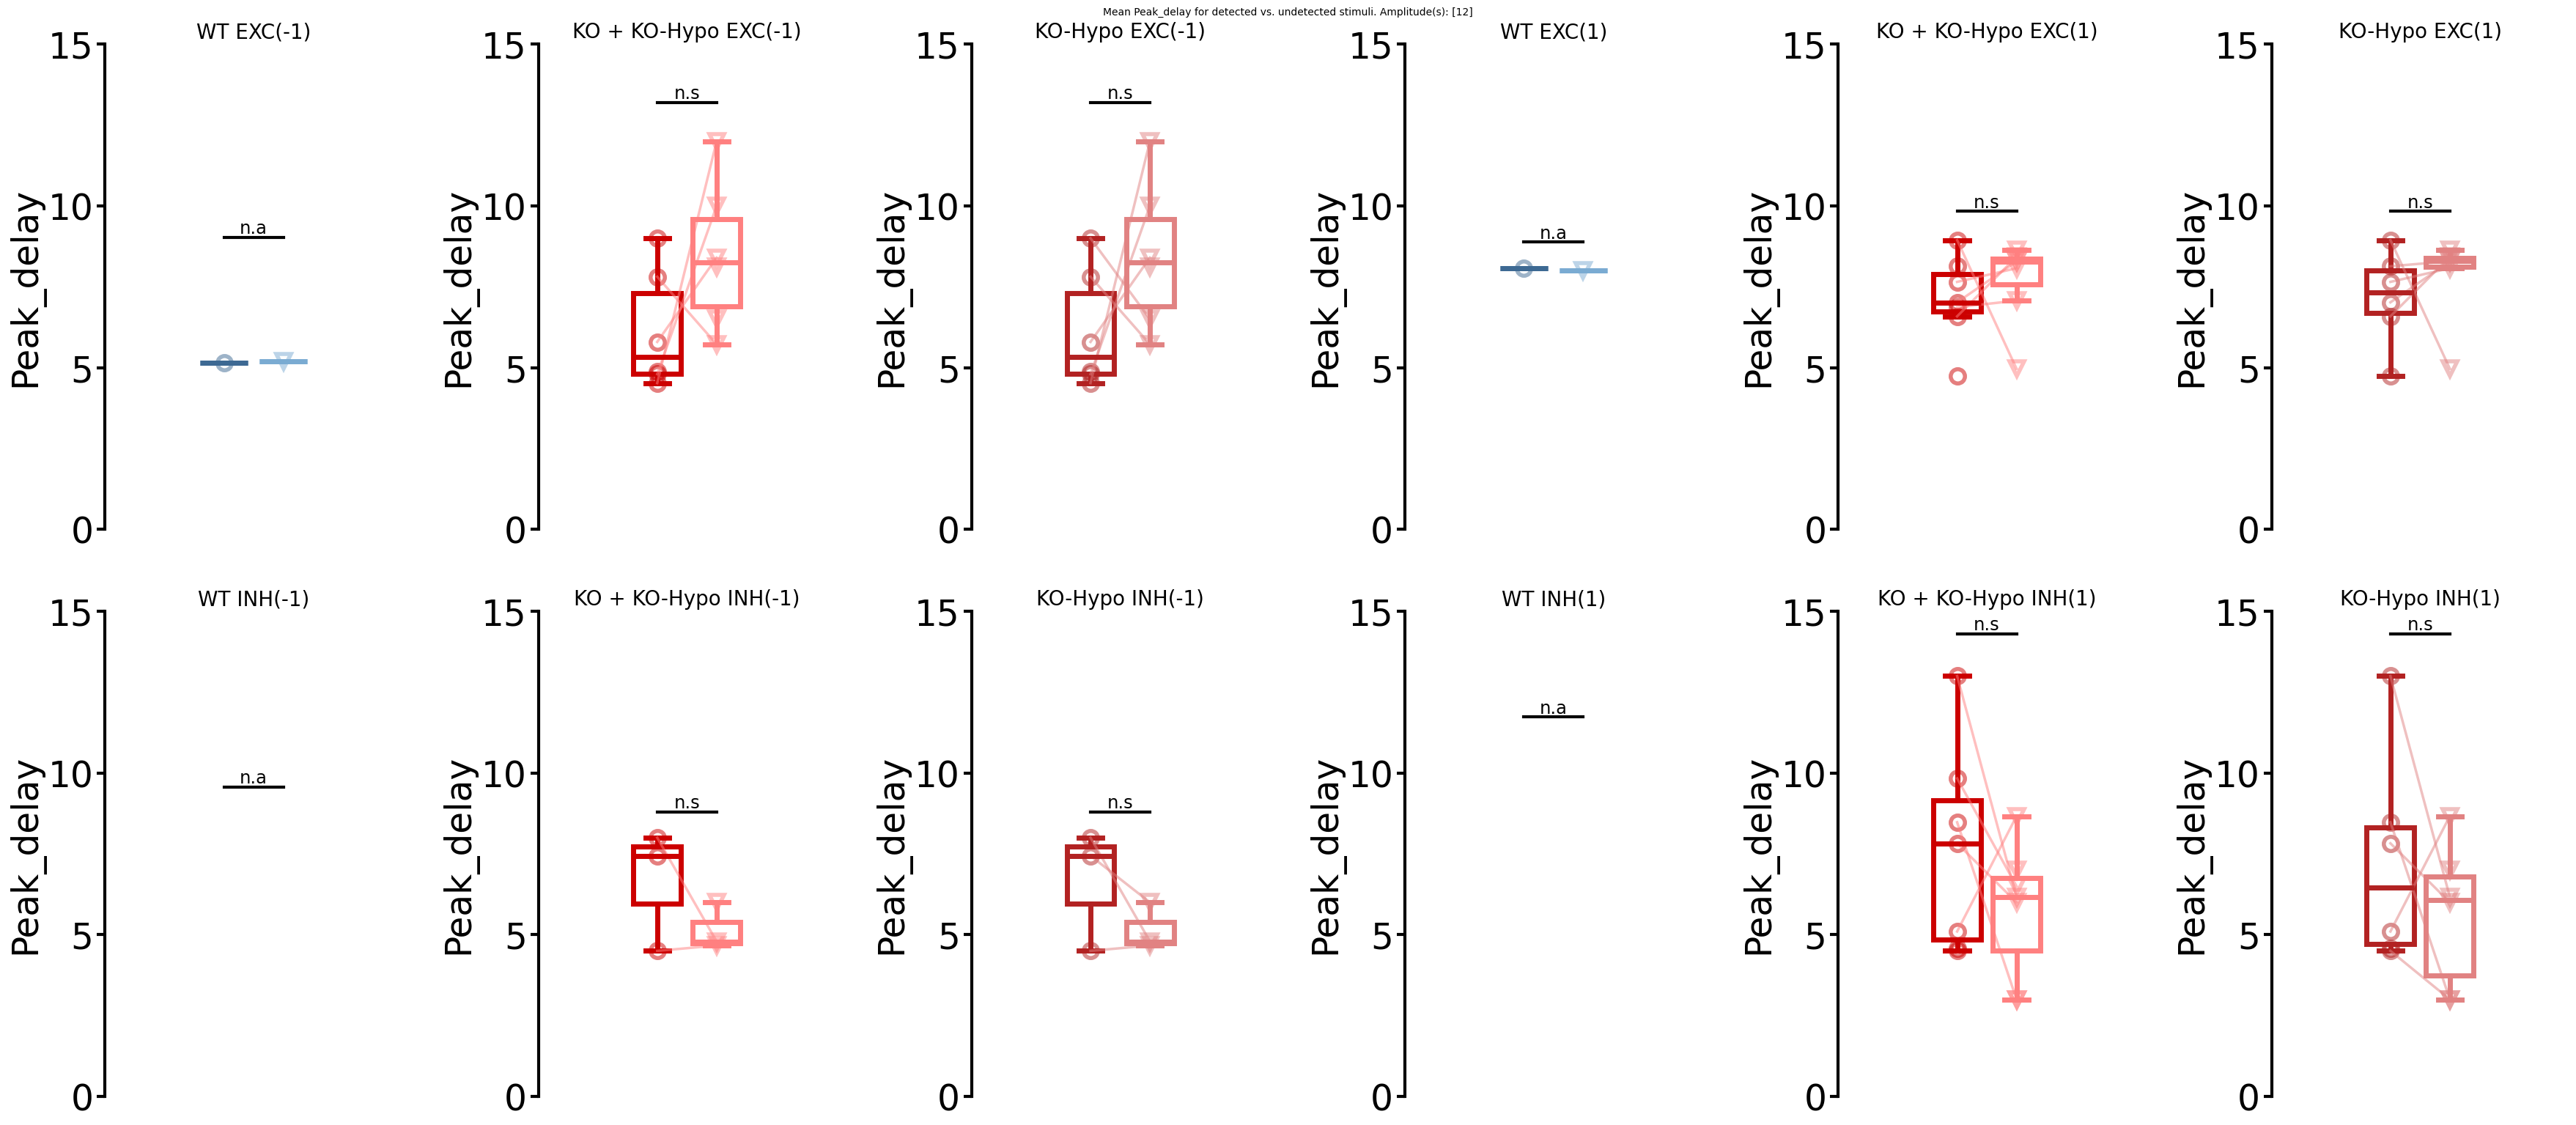

In [28]:
det_comp_param(recs, "Peak_delay", stim_ampl=[12], ylim=[0, 15])

### Subthreshold amplitudes

Boxplot plotting.
--- Peak_delay: WT EXC(-1) ---
ShapiroResult(statistic=0.7726887135903785, pvalue=0.047636616552563855)
ShapiroResult(statistic=0.9591879904538787, pvalue=0.8023176813032986)
WilcoxonResult(statistic=0.0, pvalue=0.0625)
Boxplot plotting.
--- Peak_delay: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.9542288016951854, pvalue=0.7536836263009878)
ShapiroResult(statistic=0.9495494375247067, pvalue=0.7066875556155532)
TtestResult(statistic=-0.7519049039029351, pvalue=0.47662404835735517, df=7)
Boxplot plotting.
--- Peak_delay: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.9217844757633102, pvalue=0.4833837073484458)
ShapiroResult(statistic=0.926790698548392, pvalue=0.5239477153131418)
TtestResult(statistic=-0.7485236080851884, pvalue=0.4824441764970191, df=6)
Boxplot plotting.
--- Peak_delay: WT EXC(1) ---
ShapiroResult(statistic=0.959809008844577, pvalue=0.8066526292960793)
ShapiroResult(statistic=0.8454060418443651, pvalue=0.18042871645285574)
TtestResult(statistic=-

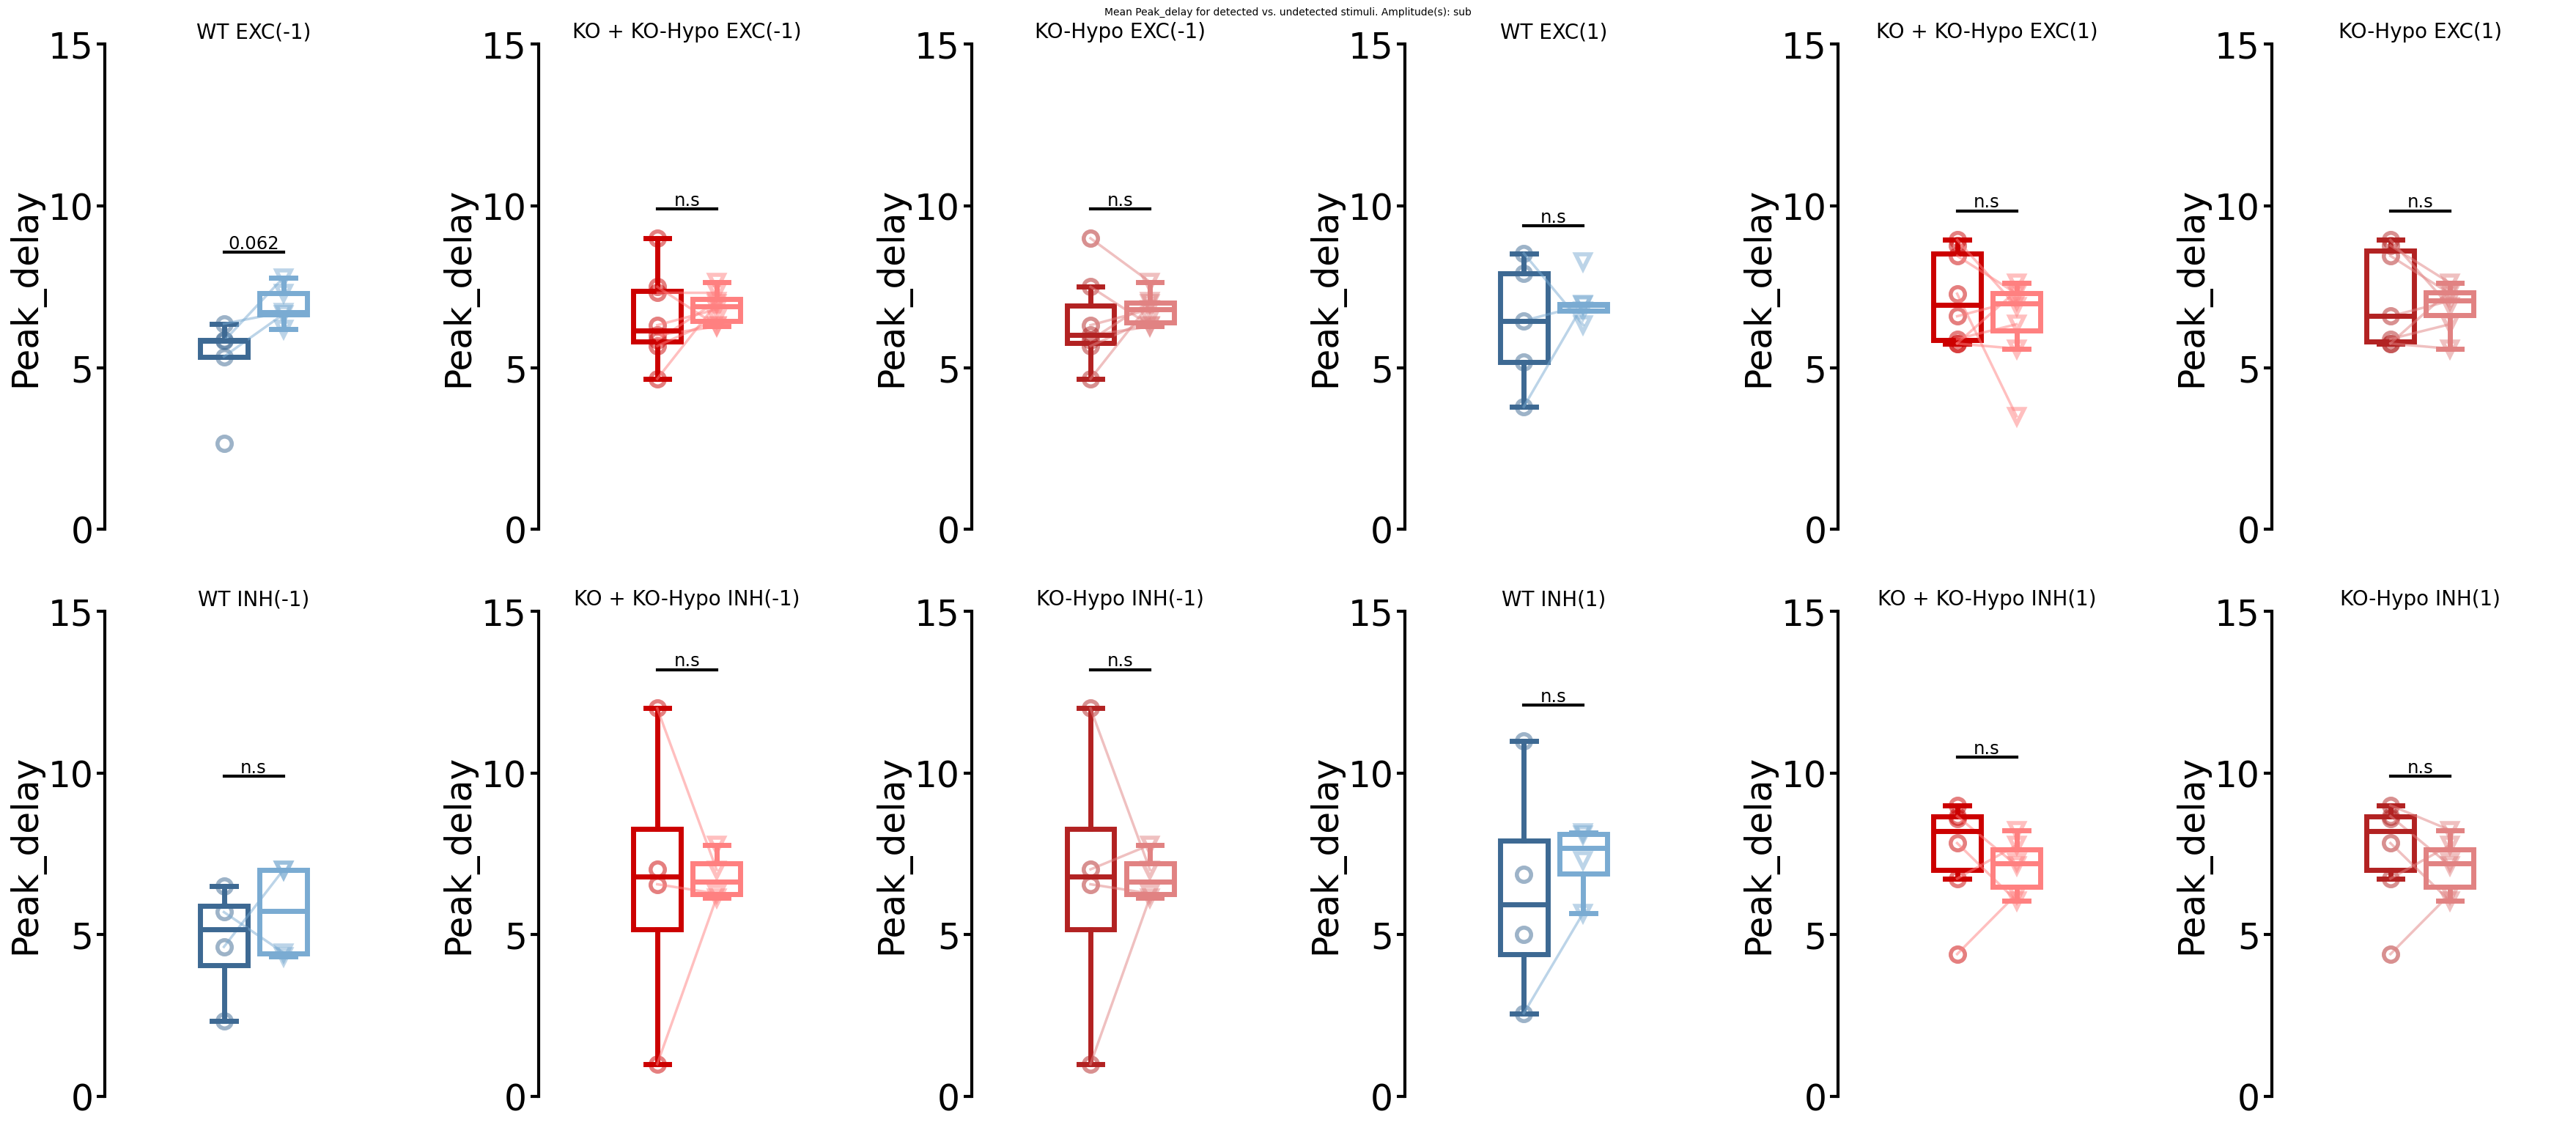

In [29]:
det_comp_param(recs, "Peak_delay", stim_ampl="sub", ylim=[0, 15])

### Suprathreshold amplitudes

Boxplot plotting.
--- Peak_delay: WT EXC(-1) ---
ShapiroResult(statistic=0.9640915016821708, pvalue=0.8400198548282187)
ShapiroResult(statistic=0.9128218319766679, pvalue=0.336127304645793)
TtestResult(statistic=-2.4125413086123078, pvalue=0.04233997196174005, df=8)
Boxplot plotting.
--- Peak_delay: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.7662287057555031, pvalue=0.00835573788160723)
ShapiroResult(statistic=0.9833556013085994, pvalue=0.9792915017471651)
WilcoxonResult(statistic=8.0, pvalue=0.09765625)
Boxplot plotting.
--- Peak_delay: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.837708367029597, pvalue=0.09458029859868068)
ShapiroResult(statistic=0.9441566697552329, pvalue=0.6763967305758303)
TtestResult(statistic=-1.2140448232824763, pvalue=0.27034351601818063, df=6)
Boxplot plotting.
--- Peak_delay: WT EXC(1) ---
ShapiroResult(statistic=0.9124579289365361, pvalue=0.3334587869697222)
ShapiroResult(statistic=0.9392257664625419, pvalue=0.5737725511949923)
TtestResult(statist

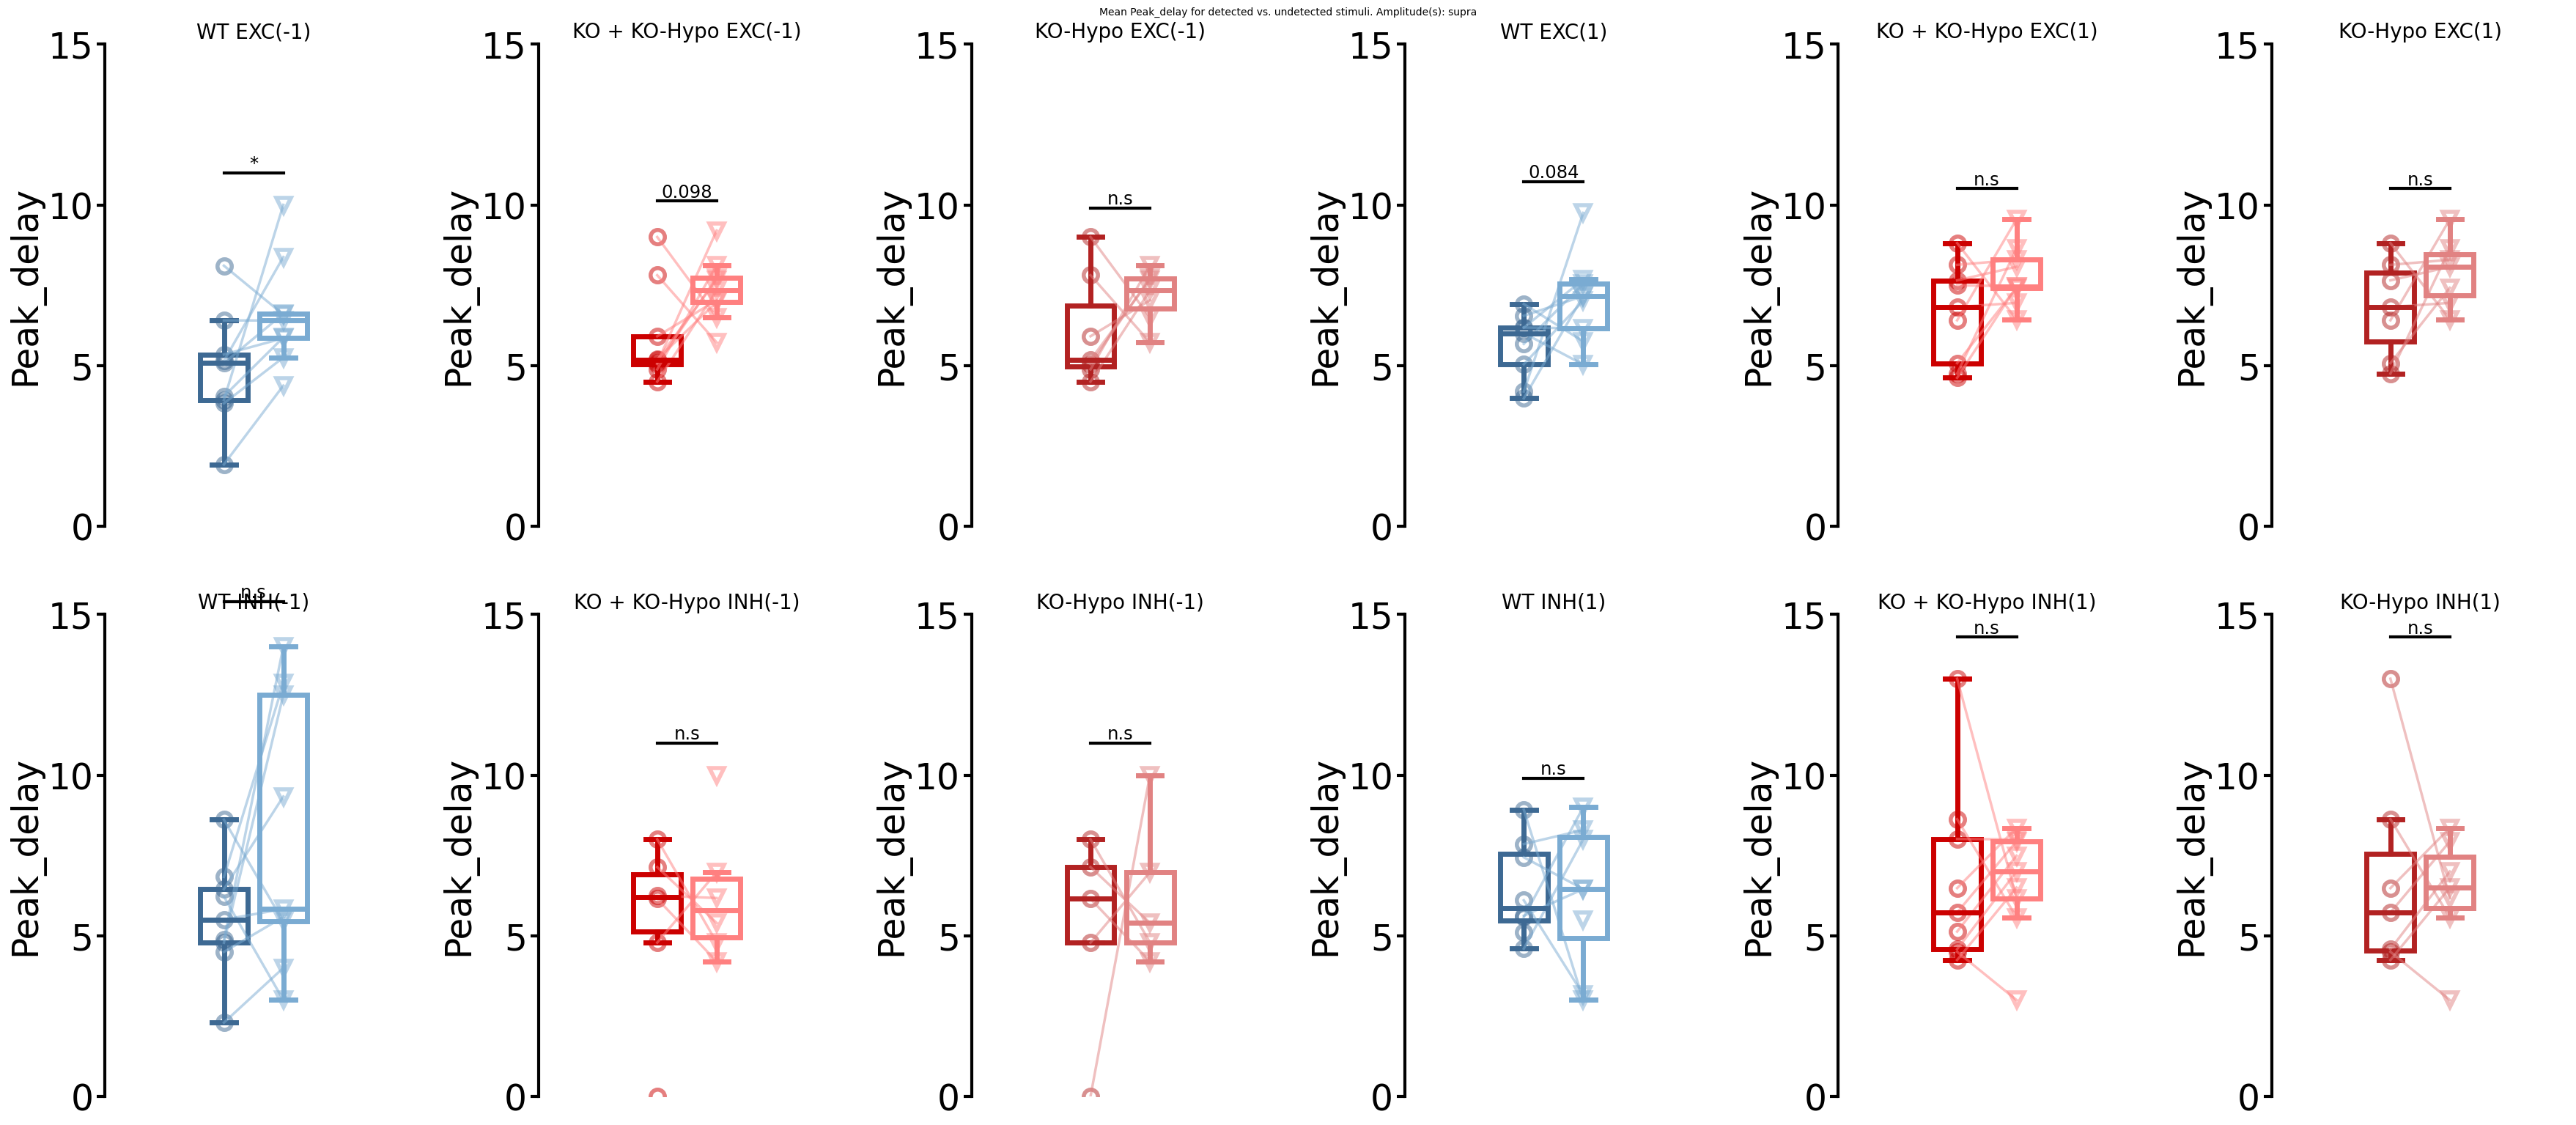

In [30]:
det_comp_param(recs, "Peak_delay", stim_ampl="supra", ylim=[0, 15])

## Peak amplitude

### All amplitudes

Boxplot plotting.
--- Peak_amplitude: WT EXC(-1) ---
ShapiroResult(statistic=0.856809380130713, pvalue=0.08850482197838046)
ShapiroResult(statistic=0.9109046633209499, pvalue=0.3222577726047219)
TtestResult(statistic=-1.4030823795032423, pvalue=0.19819185036331252, df=8)
Boxplot plotting.
--- Peak_amplitude: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.6868734829461498, pvalue=0.00099700176224319)
ShapiroResult(statistic=0.906494256541523, pvalue=0.2921029319797829)
WilcoxonResult(statistic=16.0, pvalue=0.49609375)
Boxplot plotting.
--- Peak_amplitude: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.7550563703240402, pvalue=0.014324636668001368)
ShapiroResult(statistic=0.9034750954251596, pvalue=0.35254617689900153)
WilcoxonResult(statistic=10.0, pvalue=0.578125)
Boxplot plotting.
--- Peak_amplitude: WT EXC(1) ---
ShapiroResult(statistic=0.8011973142005943, pvalue=0.021073939980454325)
ShapiroResult(statistic=0.9117362728821424, pvalue=0.32821668136182386)
WilcoxonResult(statistic=

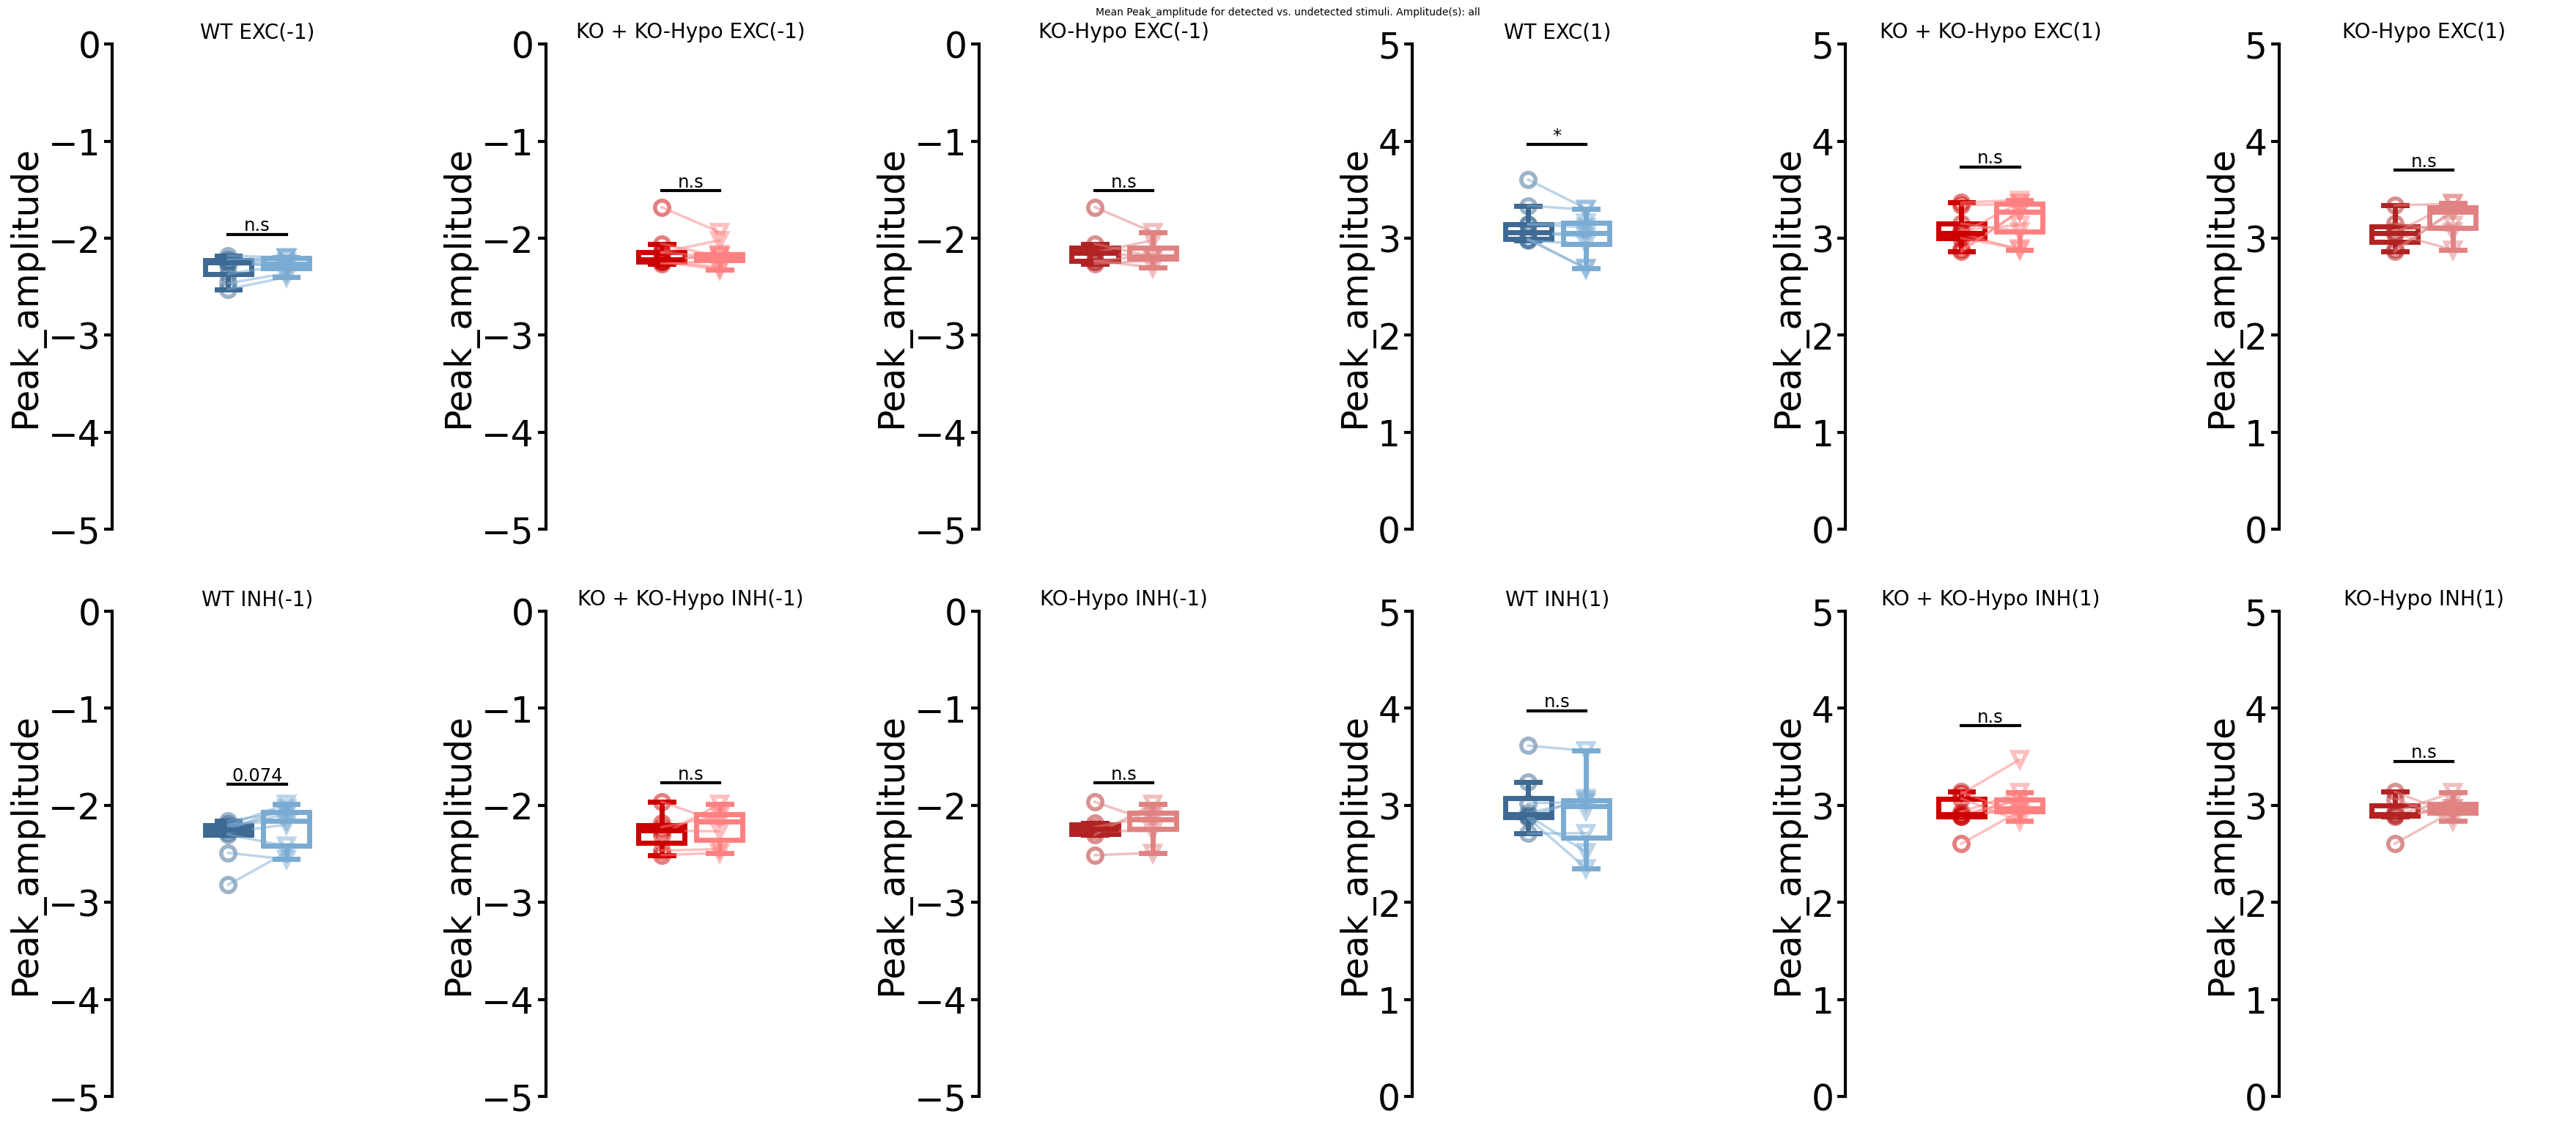

In [31]:
det_comp_param(recs, "Peak_amplitude", stim_ampl="all", ylim=[0, 5])

### Threshold amplitude

Boxplot plotting.
--- Peak_amplitude: WT EXC(-1) ---
ShapiroResult(statistic=0.8977061642664251, pvalue=0.2754890073133357)
ShapiroResult(statistic=0.7461466272508442, pvalue=0.007404319087572167)
WilcoxonResult(statistic=8.0, pvalue=0.1953125)
Boxplot plotting.
--- Peak_amplitude: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.9477085820888206, pvalue=0.664929130596756)
ShapiroResult(statistic=0.8494768506245569, pvalue=0.07353877049020374)
TtestResult(statistic=-0.0878067972566981, pvalue=0.9321884113049304, df=8)
Boxplot plotting.
--- Peak_amplitude: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.9459312755026934, pvalue=0.692579032955808)
ShapiroResult(statistic=0.8149779817875378, pvalue=0.057429048794170004)
TtestResult(statistic=0.03482150366086737, pvalue=0.9733516214206639, df=6)
Boxplot plotting.
--- Peak_amplitude: WT EXC(1) ---
ShapiroResult(statistic=0.867320884560234, pvalue=0.11507190192339667)
ShapiroResult(statistic=0.7581897918428799, pvalue=0.006745575484322328)
W

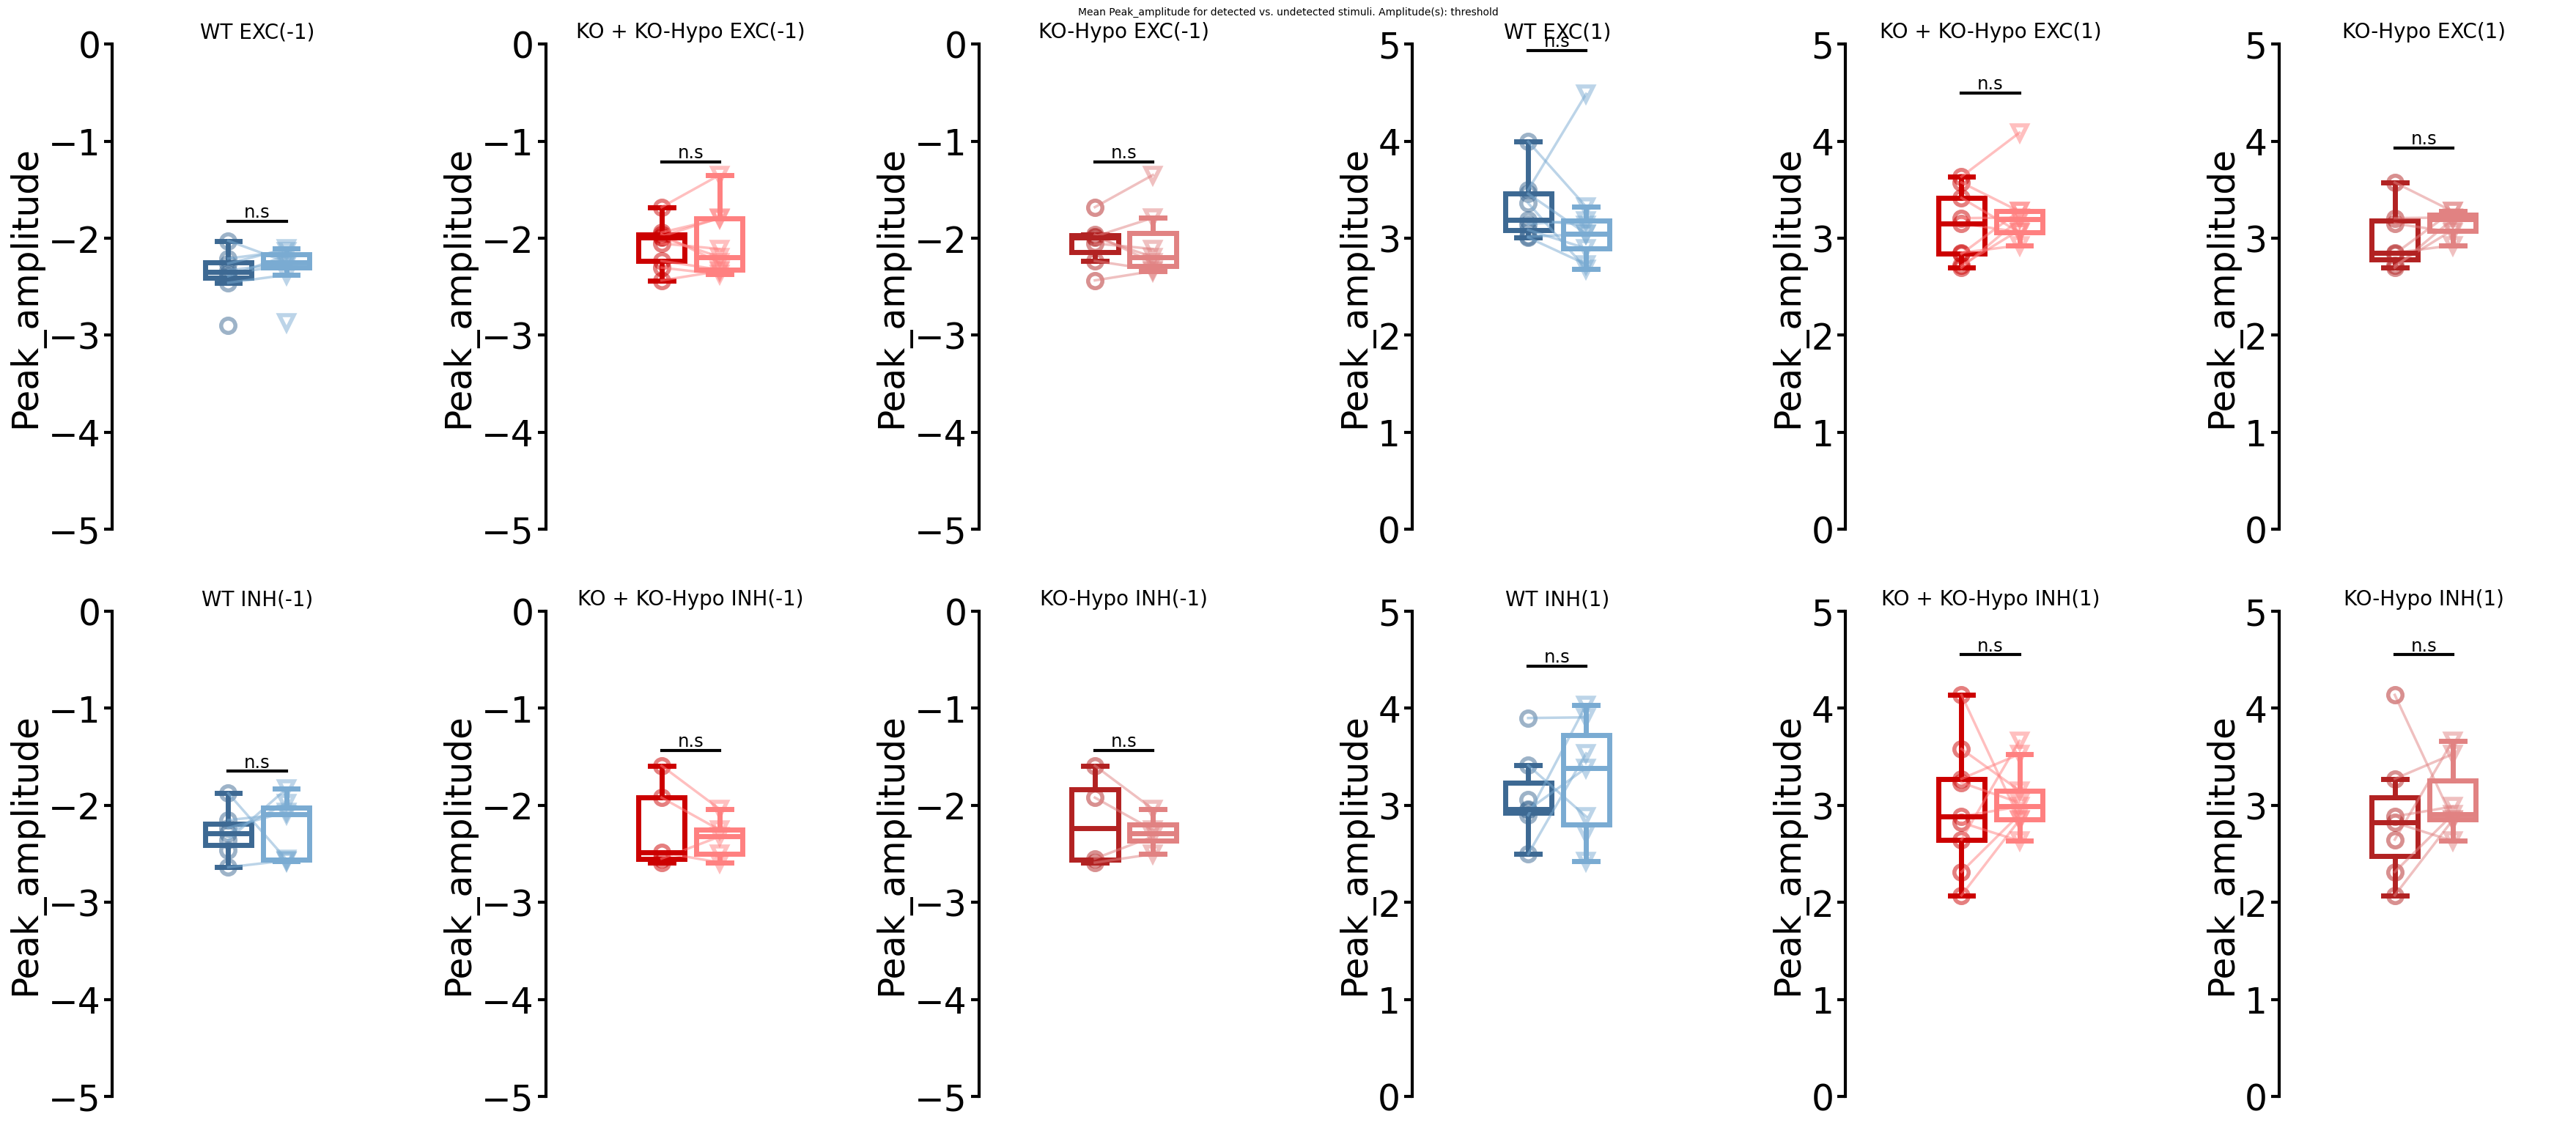

In [32]:
det_comp_param(recs, "Peak_amplitude", stim_ampl="threshold", ylim=[0, 5])

### Amplitude 12

Boxplot plotting.
Boxplot plotting.
--- Peak_amplitude: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.8909337052951, pvalue=0.3231089635568605)
ShapiroResult(statistic=0.9189940403701634, pvalue=0.4981453516590298)
TtestResult(statistic=-0.6599715396045889, pvalue=0.5384559596757271, df=5)
Boxplot plotting.
--- Peak_amplitude: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.8909337052951, pvalue=0.3231089635568605)
ShapiroResult(statistic=0.9189940403701634, pvalue=0.4981453516590298)
TtestResult(statistic=-0.6599715396045889, pvalue=0.5384559596757271, df=5)
Boxplot plotting.
Boxplot plotting.
--- Peak_amplitude: KO + KO-Hypo EXC(1) ---
ShapiroResult(statistic=0.9520739534835567, pvalue=0.7485340140397028)
ShapiroResult(statistic=0.9087272565927271, pvalue=0.38713134629848805)
TtestResult(statistic=-0.10344957919275763, pvalue=0.9209772967594281, df=6)
Boxplot plotting.
--- Peak_amplitude: KO-Hypo EXC(1) ---
ShapiroResult(statistic=0.9434428013342283, pvalue=0.6870436229531904)
Sha

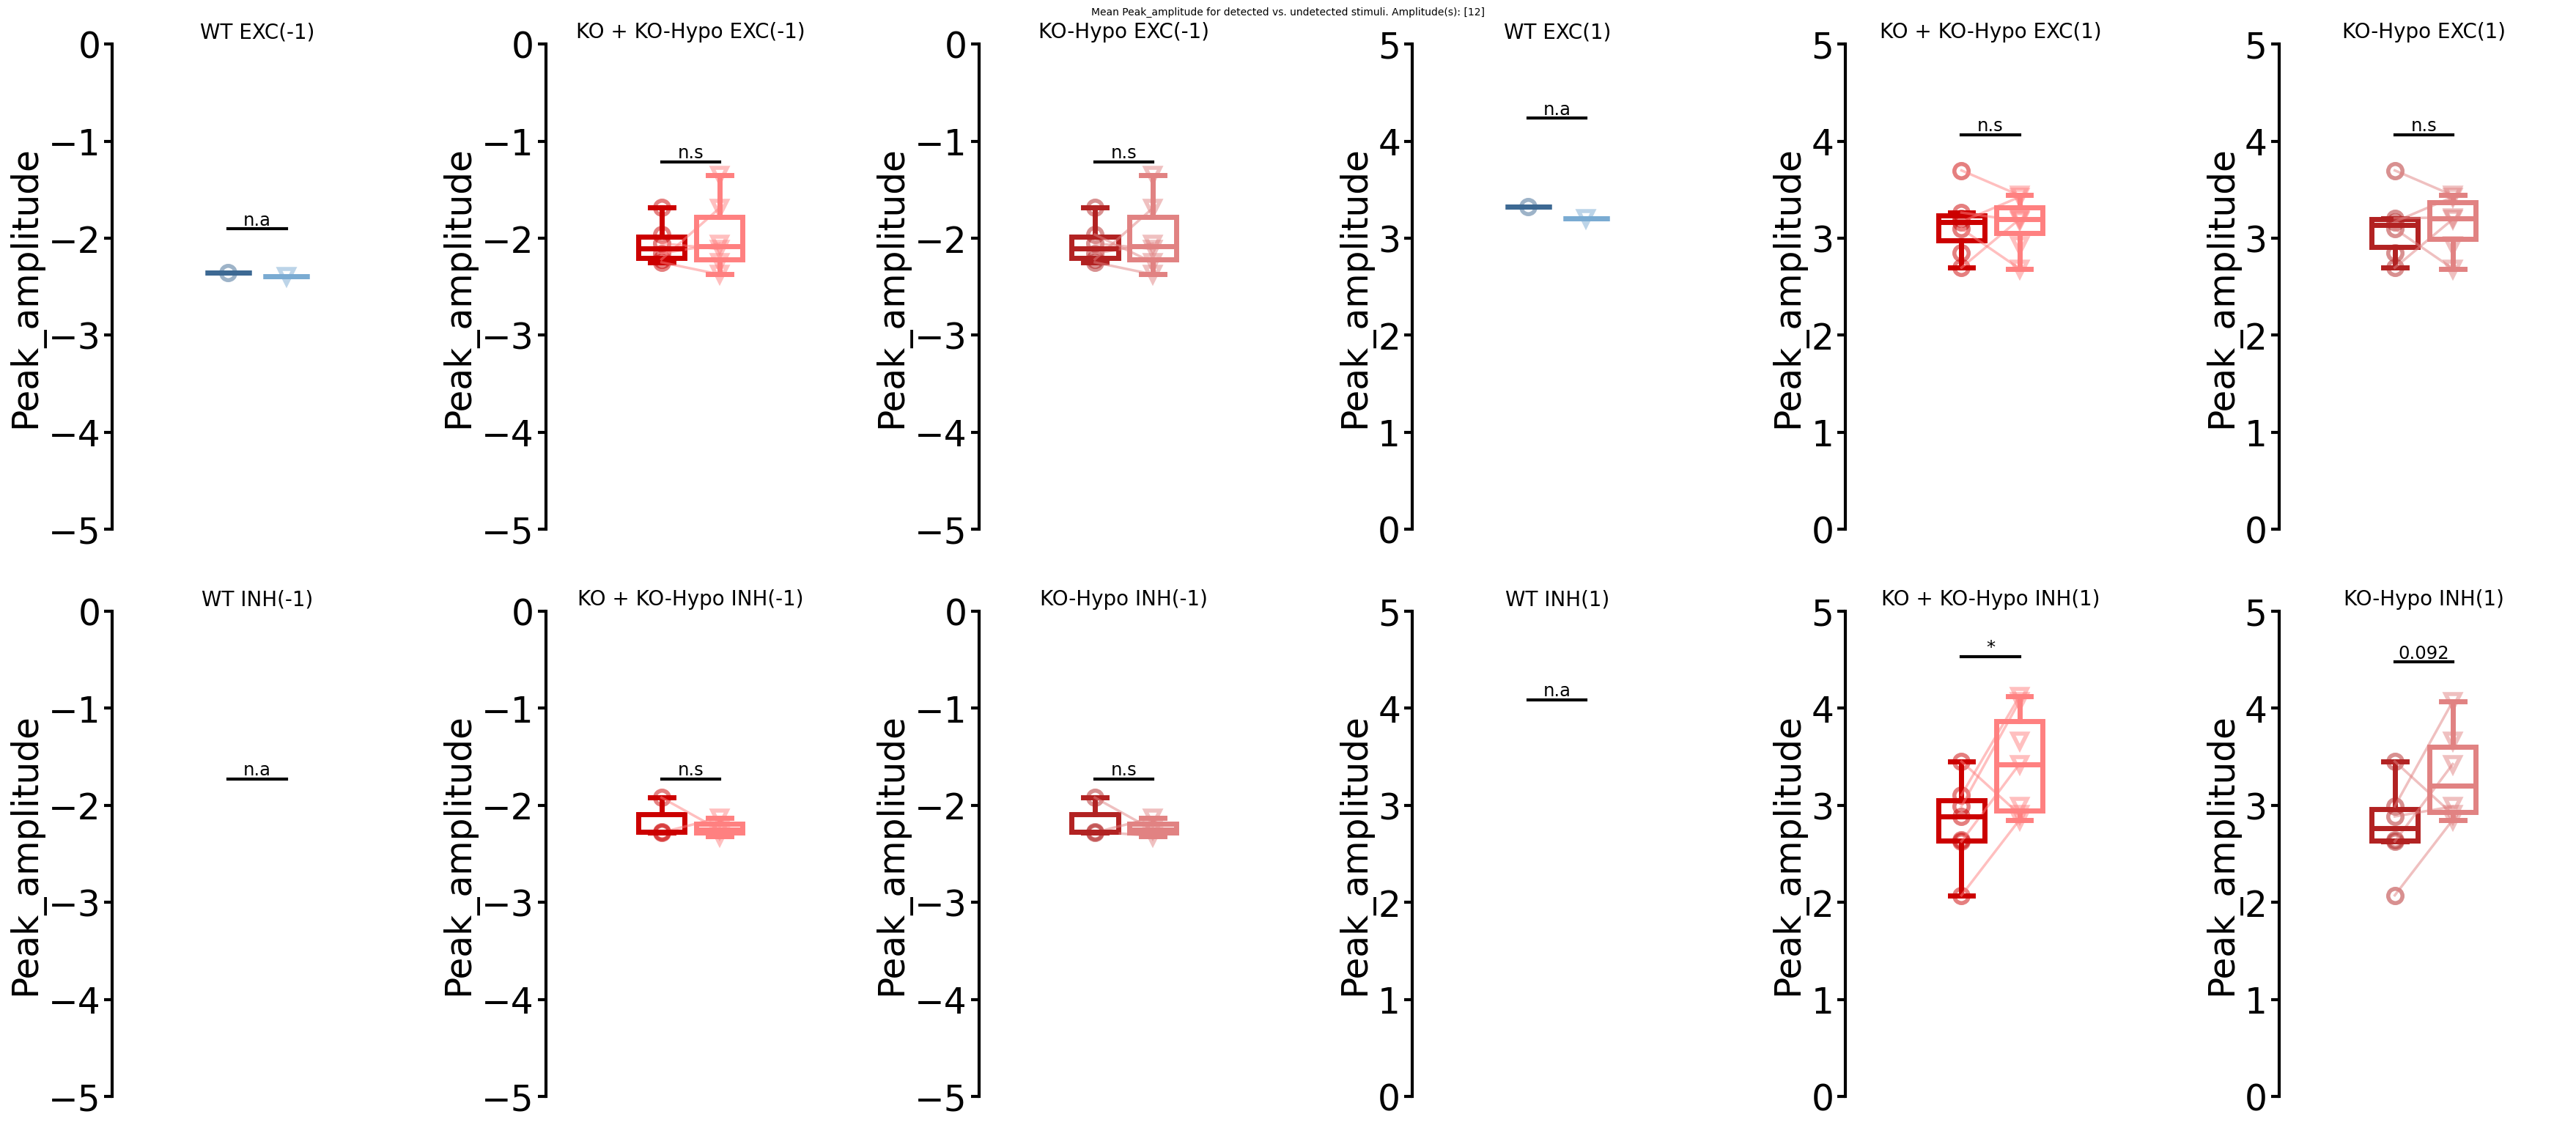

In [33]:
det_comp_param(recs, "Peak_amplitude", stim_ampl=[12], ylim=[0, 5])

### Subtreshold amplitudes

Boxplot plotting.
--- Peak_amplitude: WT EXC(-1) ---
ShapiroResult(statistic=0.9926938648535271, pvalue=0.9882253202520264)
ShapiroResult(statistic=0.9814290637328871, pvalue=0.9421181456086996)
TtestResult(statistic=0.4455768280077045, pvalue=0.6789559150323241, df=4)
Boxplot plotting.
--- Peak_amplitude: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.5600681074453293, pvalue=5.388451066423516e-05)
ShapiroResult(statistic=0.8769427743924447, pvalue=0.17602828152080896)
WilcoxonResult(statistic=10.0, pvalue=0.3125)
Boxplot plotting.
--- Peak_amplitude: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.5950256910489489, pvalue=0.00023787107878597133)
ShapiroResult(statistic=0.9115245348714597, pvalue=0.4065312109466379)
WilcoxonResult(statistic=9.0, pvalue=0.46875)
Boxplot plotting.
--- Peak_amplitude: WT EXC(1) ---
ShapiroResult(statistic=0.978258584865298, pvalue=0.925095114992711)
ShapiroResult(statistic=0.9576248114145565, pvalue=0.791354515598923)
TtestResult(statistic=0.5165319948

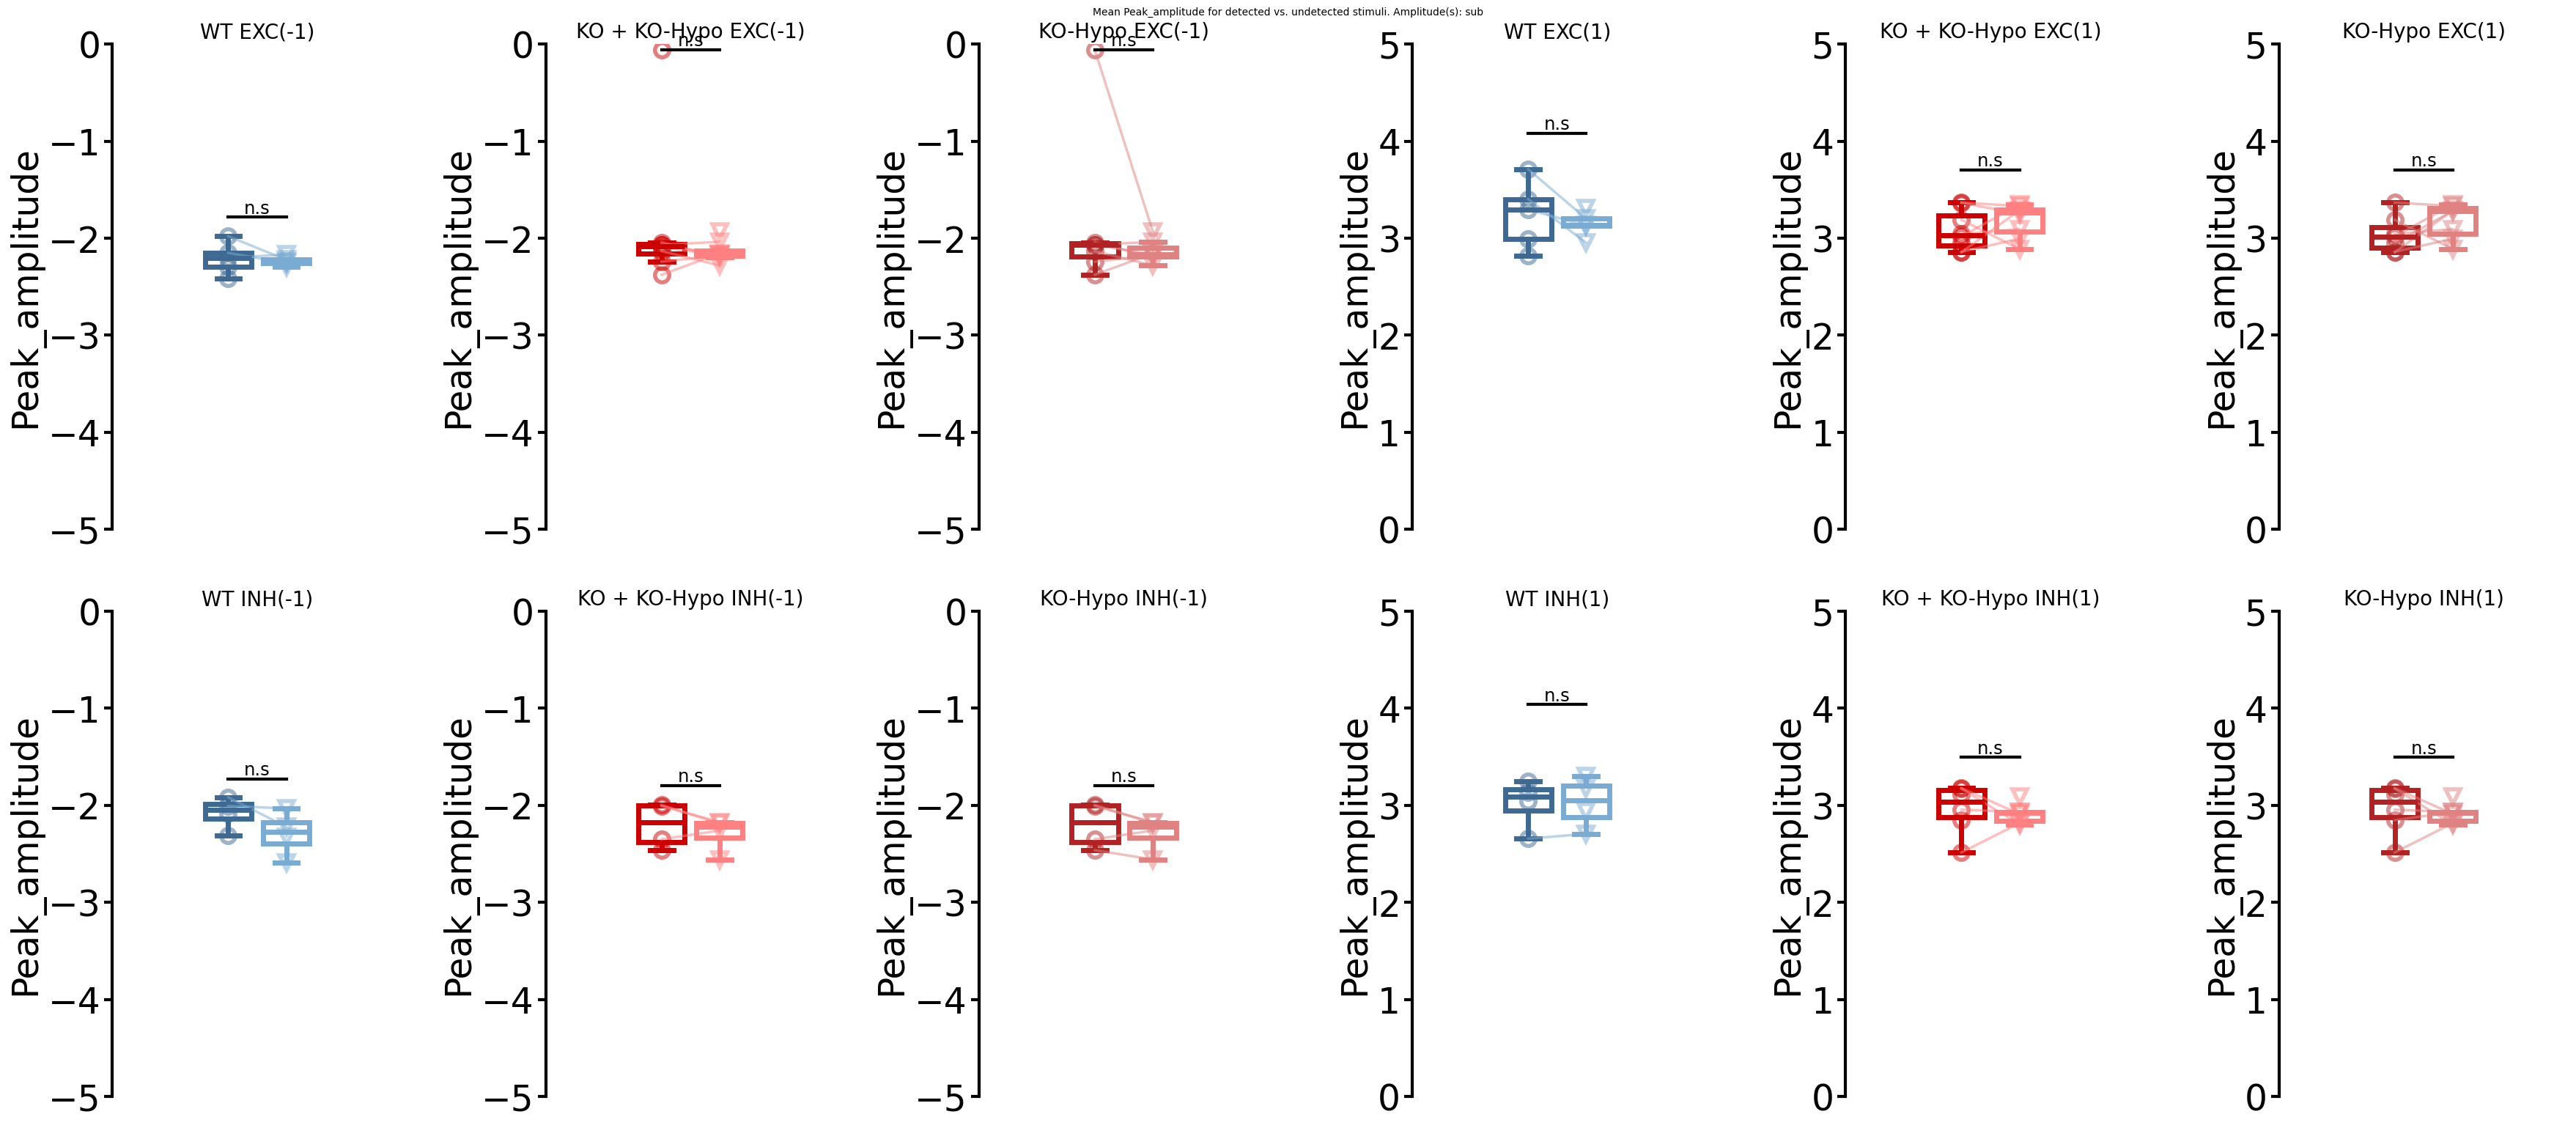

In [34]:
det_comp_param(recs, "Peak_amplitude", stim_ampl="sub", ylim=[0, 5])

### Suprathreshold amplitudes

Boxplot plotting.
--- Peak_amplitude: WT EXC(-1) ---
ShapiroResult(statistic=0.8331999879421383, pvalue=0.04849735932144825)
ShapiroResult(statistic=0.8226339217416303, pvalue=0.03689930040289056)
WilcoxonResult(statistic=17.0, pvalue=0.5703125)
Boxplot plotting.
--- Peak_amplitude: KO + KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.8239956483782491, pvalue=0.03822667897527851)
ShapiroResult(statistic=0.791949418275713, pvalue=0.016519295184540143)
WilcoxonResult(statistic=22.0, pvalue=1.0)
Boxplot plotting.
--- Peak_amplitude: KO-Hypo EXC(-1) ---
ShapiroResult(statistic=0.8918139158900555, pvalue=0.28425973143145855)
ShapiroResult(statistic=0.8105807867336803, pvalue=0.0520429878282471)
TtestResult(statistic=-0.2623035391199471, pvalue=0.8018608811485686, df=6)
Boxplot plotting.
--- Peak_amplitude: WT EXC(1) ---
ShapiroResult(statistic=0.7891147702167453, pvalue=0.015328353750112649)
ShapiroResult(statistic=0.7656808032890935, pvalue=0.008234827162740446)
WilcoxonResult(statistic=14.0

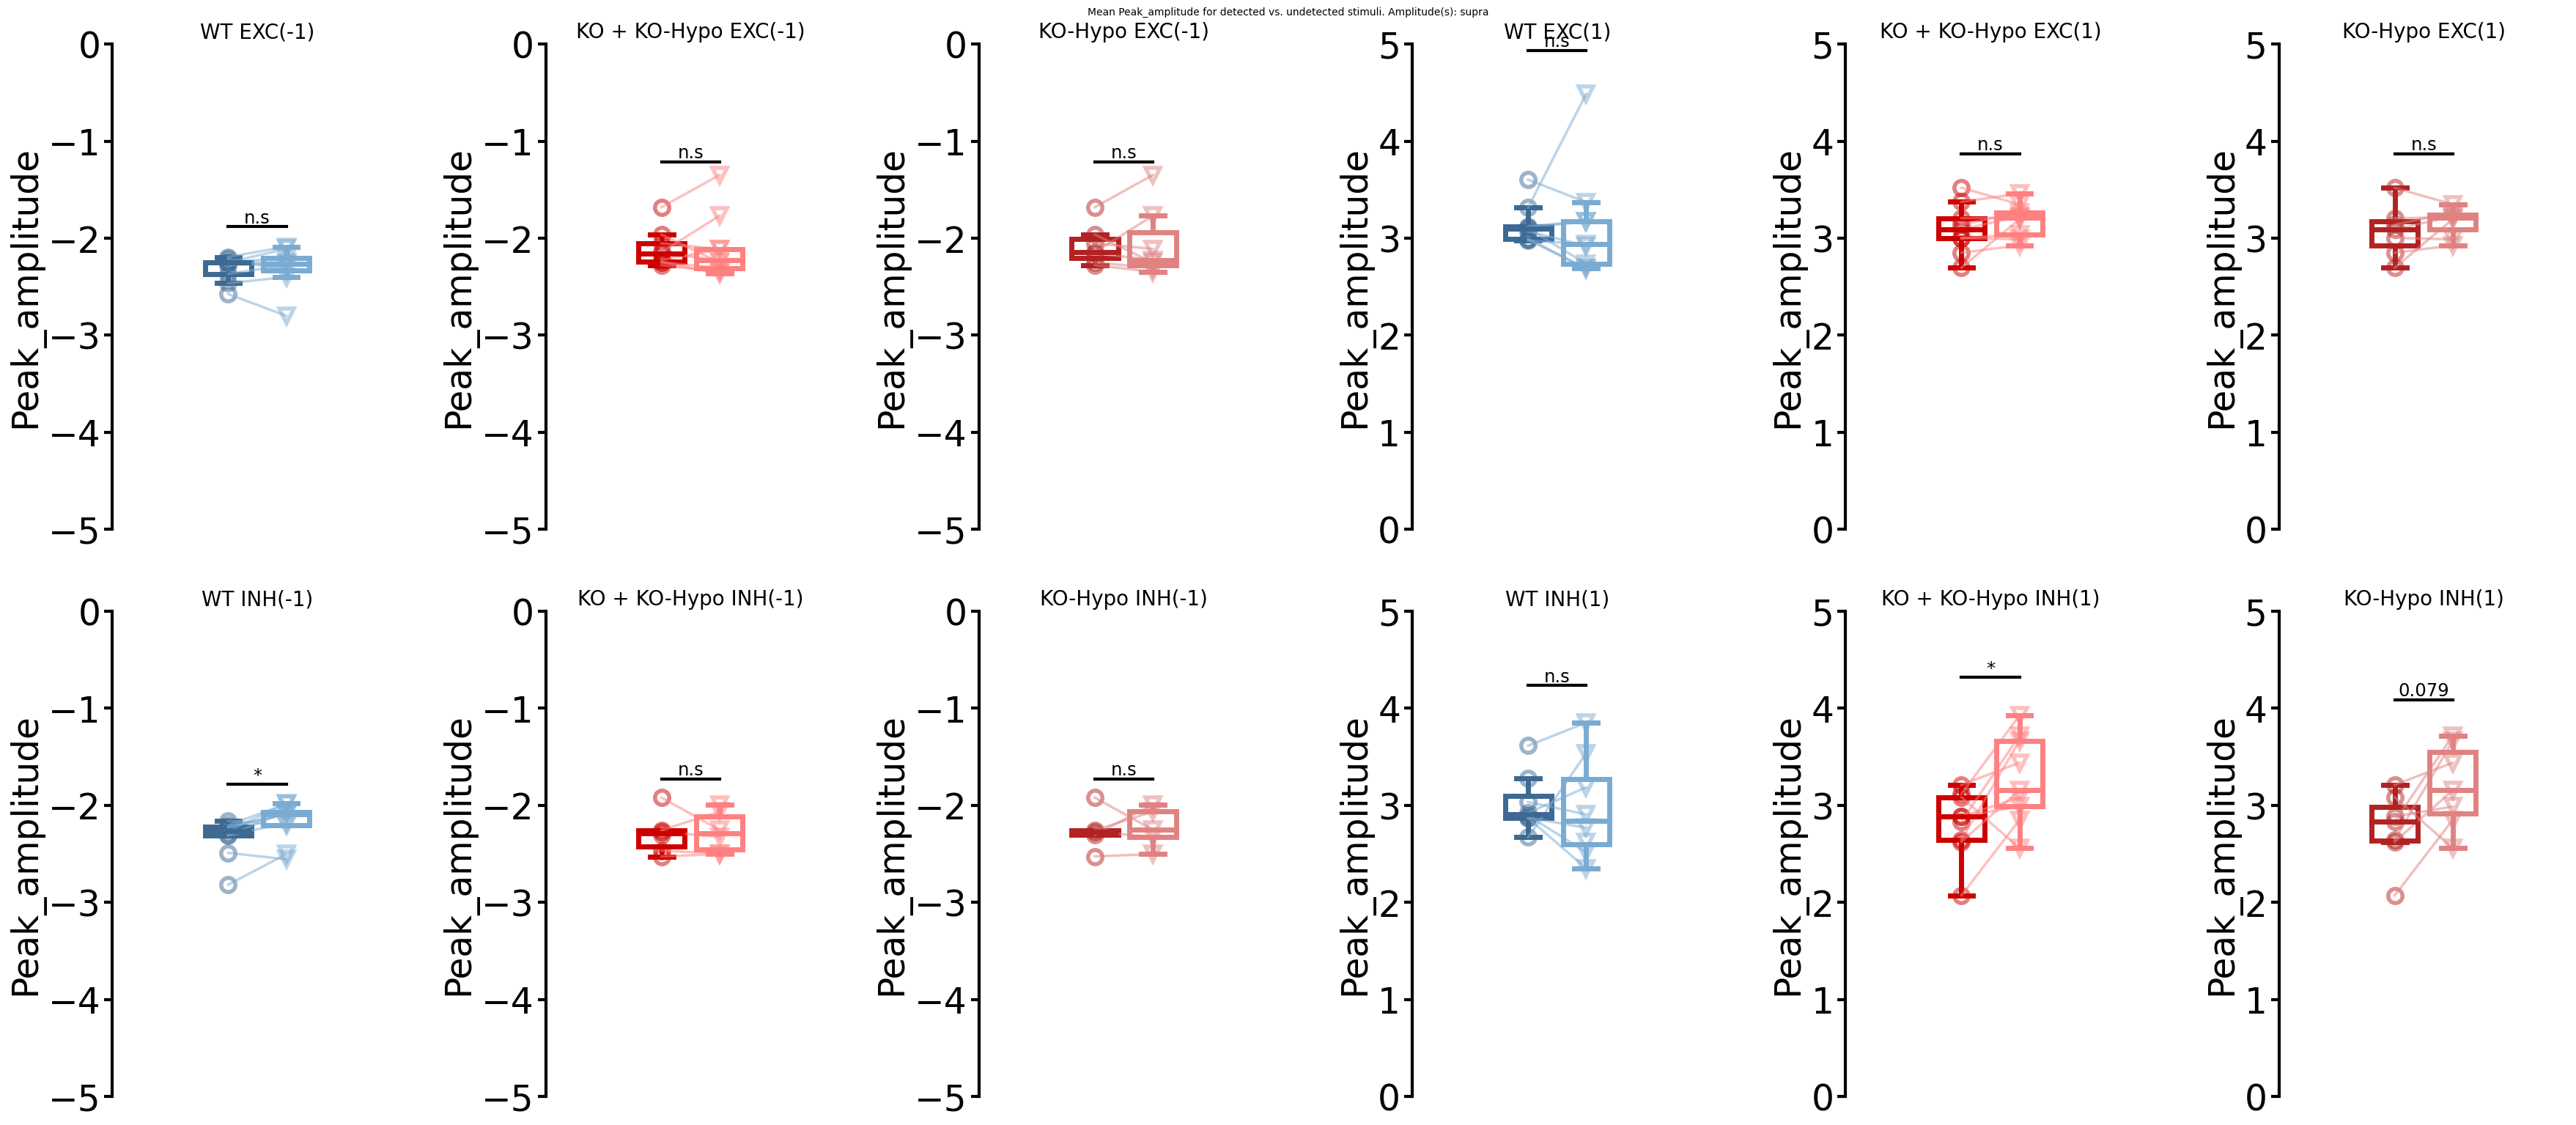

In [35]:
det_comp_param(recs, "Peak_amplitude", stim_ampl="supra", ylim=[0, 5])